# **Expedia Hotel Analysis and Booking Promotion Prediction Model**

Data Period : Nov 2012 - Jun 2013 | [Data Set Source]('https://www.kaggle.com/datasets/vijeetnigam26/expedia-hotel')

📊 *Data Analysis & Processing by:*  [Glen Valencius Joydi](https://github.com/glenvj-j)

---

# **1. Context**

## 1.1 Background

Expedia Group, Inc. is a leading American online travel shopping company catering to both consumers and small businesses in the travel industry.

## 1.2 Revenue Generation Model

For the purpose of this research, we will assume that Expedia generates revenue primarily through hotel bookings, and we'll allocate 10% of this as the focus for our analysis.

## 1.3 Data Structure

Each row in the dataset represents an individual search activity from a single session on Expedia, capturing user interactions with the platform.

# **2. Problem Statement**

Our team aims to launch a targeted hotel booking promotion. Historically, we’ve distributed coupons to all users, but this approach hasn't always been effective, as many users don't redeem the coupons.

Our goal is to maximize profit by optimizing the distribution of promotions, ensuring that the coupon reach aligns with users who are more likely to use them.

## 2.1 Our Approach

We will conduct a deep dive into understanding our users through three key perspectives:

1. **User Intent & Booking Preferences**: Gaining insights into what our users prefer when booking a hotel.
2. **User Behavior**: Analyzing how users interact with the platform and their booking tendencies.
3. **Business Effectiveness**: Understanding the key factors that drive revenue and how they relate to coupon usage.


# **3. Data Processing**

## 3.1. Importing Dataset

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

pd.options.display.max_rows = 100

import random

In [2]:
df = pd.read_csv('train.csv')

In [869]:
print(f'''
Our data total row : {df.shape[0]}
Total Feature: {df.shape[1]}
''')


Our data total row : 9914231
Total Feature: 30



In [5]:
# This function check all unique from each column
def check_all_unique(df) :
    pd.set_option('display.max_colwidth', None)
    listItem = []
    for col in df.columns :
        listItem.append( [col, df[col].nunique(), df[col].unique()])

    tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                        data=listItem)
    return tabel1Desc

check_all_unique(df).sort_values(by='Column Name')

Column Name  Number of Unique  \
53                 booking_bool                 2   
51                   click_bool                 2   
28                    comp1_inv                 3   
27                   comp1_rate                 3   
29      comp1_rate_percent_diff              2820   
31                    comp2_inv                 3   
30                   comp2_rate                 3   
32      comp2_rate_percent_diff               726   
34                    comp3_inv                 3   
33                   comp3_rate                 3   
35      comp3_rate_percent_diff               662   
37                    comp4_inv                 3   
36                   comp4_rate                 3   
38      comp4_rate_percent_diff               602   
40                    comp5_inv                 3   
39                   comp5_rate                 3   
41      comp5_rate_percent_diff               789   
43                    comp6_inv                 3   
42                   comp6_rate                 3   
44      comp6_rate_percent_diff               446   
46                    comp7_inv                 3   
45                   comp7_rate                 3   
47      comp7_rate_percent_diff               791   
49                    comp8_inv                 3   
48                   comp8_rate                 3   
50      comp8_rate_percent_diff               623   
1                     date_time            394534   
52           gross_bookings_usd             85420   
25    orig_destination_distance            685150   
14                     position                40   
15                    price_usd             92790   
16               promotion_flag                 2   
10              prop_brand_bool                 2   
6               prop_country_id               172   
7                       prop_id            136886   
11         prop_location_score1               337   
12         prop_location_score2              9540   
13    prop_log_historical_price               398   
9             prop_review_score                10   
8               prop_starrating                 6   
26                  random_bool                 2   
2                       site_id                34   
20            srch_adults_count                 9   
19          srch_booking_window               448   
21          srch_children_count                10   
17          srch_destination_id             23715   
0                       srch_id            399344   
18          srch_length_of_stay                41   
24    srch_query_affinity_score            305667   
22              srch_room_count                 8   
23     srch_saturday_night_bool                 2   
5          visitor_hist_adr_usd             12835   
4       visitor_hist_starrating               325   
3   visitor_location_country_id               218   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

## **3.2. Cleaning Data**

### 3.2.1 Checking Duplicate and NaN

In [6]:
def check_duplicate(df):
    if df.duplicated().sum() > 0:
        total_duplicated = df.duplicated().sum()
        total_percentage_duplicated = round(total_duplicated / df.shape[0] * 100, 2)
        original_data = df.shape[0]
        print(f'Total Duplicated Data: {total_duplicated} rows ({total_percentage_duplicated}% of overall data)')
        duplicated_rows = df[df.duplicated()]
        display(duplicated_rows)

        if total_percentage_duplicated < 1:
            user_input = input("Do you want to delete the duplicated data? (yes/no): ").strip().lower()
            if user_input in ("yes", "y"):
                df.drop_duplicates(inplace=True)
                after_data = df.shape[0]
                print(f'Duplicated data successfully deleted. Total deleted: {original_data - after_data}')
            else:
                print("No action taken. Duplicated data was not deleted.")
        else:
            print("Duplicated data is more than 1% of the dataset. Please check manually.")
        return duplicated_rows.index
    else:
        print("No duplicated data found.")
        return None
    
duplicated_index = check_duplicate(df)
duplicated_index

No duplicated data found.


In [7]:
def check_data_summary(df):
    # Create DataFrame for NaN summary
    nan_summary = pd.DataFrame({
        'Total NaN': df.isna().sum(),
        'Percentage NaN': round(df.isna().sum() / df.shape[0] * 100, 2),
        'Non-Null Count': df.notnull().sum(),
        'Data Type': df.dtypes
    })

    nan_summary = nan_summary.reset_index().rename(columns={'index': 'Column Name'})
    nan_df = nan_summary.sort_values(by='Percentage NaN', ascending=False)
    print('=============== Data Summary ===============')
    display(nan_df)
    return nan_df

nan = check_data_summary(df)

=============== Data Summary ===============


Column Name  Total NaN  Percentage NaN  Non-Null Count  \
29      comp1_rate_percent_diff    9732623           98.14          184907   
44      comp6_rate_percent_diff    9724218           98.05          193312   
27                   comp1_rate    9681724           97.62          235806   
28                    comp1_inv    9663097           97.43          254433   
38      comp4_rate_percent_diff    9653317           97.34          264213   
52           gross_bookings_usd    9640938           97.21          276592   
47      comp7_rate_percent_diff    9639692           97.20          277838   
42                   comp6_rate    9435043           95.14          482487   
4       visitor_hist_starrating    9412233           94.91          505297   
5          visitor_hist_adr_usd    9409918           94.88          507612   
43                    comp6_inv    9393385           94.71          524145   
36                   comp4_rate    9297431           93.75          620099   
45                   comp7_rate    9286453           93.64          631077   
24    srch_query_affinity_score    9281966           93.59          635564   
37                    comp4_inv    9225059           93.02          692471   
46                    comp7_inv    9204355           92.81          713175   
35      comp3_rate_percent_diff    8973523           90.48          944007   
32      comp2_rate_percent_diff    8807683           88.81         1109847   
50      comp8_rate_percent_diff    8691823           87.64         1225707   
41      comp5_rate_percent_diff    8236524           83.05         1681006   
33                   comp3_rate    6858257           69.15         3059273   
34                    comp3_inv    6625309           66.80         3292221   
48                   comp8_rate    6098487           61.49         3819043   
49                    comp8_inv    5957142           60.07         3960388   
30                   comp2_rate    5876897           59.26         4040633   
31                    comp2_inv    5665992           57.13         4251538   
39                   comp5_rate    5473236           55.19         4444294   
40                    comp5_inv    5196697           52.40         4720833   
25    orig_destination_distance    3216461           32.43         6701069   
12         prop_location_score2    2178380           21.96         7739150   
9             prop_review_score      14630            0.15         9902900   
51                   click_bool          0            0.00         9917530   
0                       srch_id          0            0.00         9917530   
1                     date_time          0            0.00         9917530   
14                     position          0            0.00         9917530   
2                       site_id          0            0.00         9917530   
3   visitor_location_country_id          0            0.00         9917530   
6               prop_country_id          0            0.00         9917530   
7                       prop_id          0            0.00         9917530   
8               prop_starrating          0            0.00         9917530   
10              prop_brand_bool          0            0.00         9917530   
11         prop_location_score1          0            0.00         9917530   
13    prop_log_historical_price          0            0.00         9917530   
15                    price_usd          0            0.00         9917530   
26                  random_bool          0            0.00         9917530   
16               promotion_flag          0            0.00         9917530   
17          srch_destination_id          0            0.00         9917530   
18          srch_length_of_stay          0            0.00         9917530   
19          srch_booking_window          0            0.00         9917530   
20            srch_adults_count          0            0.00         9917530   
21          srch_children_count          0

We got some Feature NaN above 50%, it will hard to fill so I decided to drop it.

In [9]:
# this will be dropped
column_above_50_nan = nan[nan['Percentage NaN']>50]['Column Name']
column_above_50_nan

29      comp1_rate_percent_diff
44      comp6_rate_percent_diff
27                   comp1_rate
28                    comp1_inv
38      comp4_rate_percent_diff
52           gross_bookings_usd
47      comp7_rate_percent_diff
42                   comp6_rate
4       visitor_hist_starrating
5          visitor_hist_adr_usd
43                    comp6_inv
36                   comp4_rate
45                   comp7_rate
24    srch_query_affinity_score
37                    comp4_inv
46                    comp7_inv
35      comp3_rate_percent_diff
32      comp2_rate_percent_diff
50      comp8_rate_percent_diff
41      comp5_rate_percent_diff
33                   comp3_rate
34                    comp3_inv
48                   comp8_rate
49                    comp8_inv
30                   comp2_rate
31                    comp2_inv
39                   comp5_rate
40                    comp5_inv
Name: Column Name, dtype: object

In [10]:
df = df.drop(columns=column_above_50_nan)
df

srch_id            date_time  site_id  visitor_location_country_id  \
0              1  2013-04-04 08:32:15       12                          187   
1              1  2013-04-04 08:32:15       12                          187   
2              1  2013-04-04 08:32:15       12                          187   
3              1  2013-04-04 08:32:15       12                          187   
4              1  2013-04-04 08:32:15       12                          187   
...          ...                  ...      ...                          ...   
9917525   665574  2013-05-21 11:06:37       24                          216   
9917526   665574  2013-05-21 11:06:37       24                          216   
9917527   665574  2013-05-21 11:06:37       24                          216   
9917528   665574  2013-05-21 11:06:37       24                          216   
9917529   665574  2013-05-21 11:06:37       24                          216   

         prop_country_id  prop_id  prop_starrating  prop_review_score  \
0                    219      893                3                3.5   
1                    219    10404                4                4.0   
2                    219    21315                3                4.5   
3                    219    27348                2                4.0   
4                    219    29604                4                3.5   
...                  ...      ...              ...                ...   
9917525              117    32019                4                3.5   
9917526              117    33959                4                3.0   
9917527              117    35240                4                0.0   
9917528              117    94437                4                0.0   
9917529              117    99509                4                4.5   

         prop_brand_bool  prop_location_score1  prop_location_score2  \
0                      1                  2.83                0.0438   
1                      1                  2.20                0.0149   
2                      1                  2.20                0.0245   
3                      1                  2.83                0.0125   
4                      1                  2.64                0.1241   
...                  ...                   ...                   ...   
9917525                0                  2.48                0.0551   
9917526                1                  2.20                0.3344   
9917527                0                  1.79                   NaN   
9917528                0                  2.94                0.0928   
9917529                1                  2.08                0.0344   

         prop_log_historical_price  position  price_usd  promotion_flag  \
0                             4.95        27     104.77               0   
1                             5.03        26     170.74               0   
2                             4.92        21     179.80               0   
3                             4.39        34     602.77               0   
4                             4.93         4     143.58               0   
...                            ...       ...        ...             ...   
9917525                       4.53         2      66.07               0   
9917526                       4.39         6      67.10               0   
9917527                       4.64         8      73.91               0   
9917528                       4.64         7      66.07               0   
9917529                       4.64         4      82.06               0   

         srch_destination_id  srch_length_of_stay  srch_booking_window  \
0                      23246                    1                    0   
1                      23246                    1                    0   
2                      23246                    1                    0   
3                      23246                    1                    0   
4                      23246                   

In [ ]:
nan.sort_values(by=['Percentage NaN', 'Column Name'], ascending=[False, True])

Column Name  Total NaN  Percentage NaN  Non-Null Count  \
22    orig_destination_distance    3216461           32.43         6701069   
10         prop_location_score2    2178380           21.96         7739150   
7             prop_review_score      14630            0.15         9902900   
25                 booking_bool          0            0.00         9917530   
24                   click_bool          0            0.00         9917530   
1                     date_time          0            0.00         9917530   
12                     position          0            0.00         9917530   
13                    price_usd          0            0.00         9917530   
14               promotion_flag          0            0.00         9917530   
8               prop_brand_bool          0            0.00         9917530   
4               prop_country_id          0            0.00         9917530   
5                       prop_id          0            0.00         9917530   
9          prop_location_score1          0            0.00         9917530   
11    prop_log_historical_price          0            0.00         9917530   
6               prop_starrating          0            0.00         9917530   
23                  random_bool          0            0.00         9917530   
2                       site_id          0            0.00         9917530   
18            srch_adults_count          0            0.00         9917530   
17          srch_booking_window          0            0.00         9917530   
19          srch_children_count          0            0.00         9917530   
15          srch_destination_id          0            0.00         9917530   
0                       srch_id          0            0.00         9917530   
16          srch_length_of_stay          0            0.00         9917530   
20              srch_room_count          0            0.00         9917530   
21     srch_saturday_night_bool          0            0.00         9917530   
3   visitor_location_country_id          0            0.00         9917530   

   Data Type  
22   float64  
10   float64  
7    float64  
25     int64  
24     int64  
1     object  
12     int64  
13   float64  
14     int64  
8      int64  
4      int64  
5      int64  
9    float64  
11   float64  
6      int64  
23     int64  
2      int64  
18     int64  
17     int64  
19     int64  
15     int64  
0      int64  
16     int64  
20     int64  
21     int64  
3      int64

### 3.2.2 Decoding and Fixing Datatype

To enhance interpretation, we will add prefixes to numerical values that actually represent IDs, rather than values intended for calculation. 

This distinction helps clarify when a value is an identifier (such as country or property IDs) rather than a quantitative metric, improving readability and making the analysis more intuitive.

In [13]:
df['visitor_location_country_id'] = df['visitor_location_country_id'].apply(lambda x : 'Country_' + str(x))
df['prop_country_id'] = df['prop_country_id'].apply(lambda x : 'Country_' + str(x))
df['prop_id'] = df['prop_id'].apply(lambda x : 'Property_' + str(x))

In [14]:
df = df.astype({'booking_bool': 'bool',
           'click_bool':'bool',
           'date_time':'datetime64[ns]',
           'position' : 'str', #drop when modeling
           'promotion_flag':'bool',
           'prop_brand_bool':'bool',
           'prop_country_id':'category',
           'prop_id':'str',
           'random_bool':'bool', 
           'site_id':'category',
           'srch_destination_id':'str',
           'srch_id':'str', #drop when modeling
           'srch_saturday_night_bool':'bool',
           'visitor_location_country_id':'category'}) 
nan = check_data_summary(df)

=============== Data Summary ===============


Column Name  Total NaN  Percentage NaN  Non-Null Count  \
22    orig_destination_distance    3216461           32.43         6701069   
10         prop_location_score2    2178380           21.96         7739150   
7             prop_review_score      14630            0.15         9902900   
0                       srch_id          0            0.00         9917530   
14               promotion_flag          0            0.00         9917530   
24                   click_bool          0            0.00         9917530   
23                  random_bool          0            0.00         9917530   
21     srch_saturday_night_bool          0            0.00         9917530   
20              srch_room_count          0            0.00         9917530   
19          srch_children_count          0            0.00         9917530   
18            srch_adults_count          0            0.00         9917530   
17          srch_booking_window          0            0.00         9917530   
16          srch_length_of_stay          0            0.00         9917530   
15          srch_destination_id          0            0.00         9917530   
13                    price_usd          0            0.00         9917530   
1                     date_time          0            0.00         9917530   
12                     position          0            0.00         9917530   
11    prop_log_historical_price          0            0.00         9917530   
9          prop_location_score1          0            0.00         9917530   
8               prop_brand_bool          0            0.00         9917530   
6               prop_starrating          0            0.00         9917530   
5                       prop_id          0            0.00         9917530   
4               prop_country_id          0            0.00         9917530   
3   visitor_location_country_id          0            0.00         9917530   
2                       site_id          0            0.00         9917530   
25                 booking_bool          0            0.00         9917530   

         Data Type  
22         float64  
10         float64  
7          float64  
0           object  
14            bool  
24            bool  
23            bool  
21            bool  
20           int64  
19           int64  
18           int64  
17           int64  
16           int64  
15          object  
13         float64  
1   datetime64[ns]  
12          object  
11         float64  
9          float64  
8             bool  
6            int64  
5           object  
4         category  
3         category  
2         category  
25            bool

### 3.2.3 Fill prop_location_score2 based on prop_location_score1

We will use LinearRegression to fill prop_location_score2

In [15]:
from sklearn.linear_model import LinearRegression

# Select only rows where both columns are present to train model
train_data = df.dropna(subset=['prop_location_score1', 'prop_location_score2'])

# Train linear model
lr = LinearRegression()
lr.fit(train_data[['prop_location_score1']], train_data['prop_location_score2'])

# Find rows where prop_location_score2 is missing but score1 is present
missing_mask = df['prop_location_score2'].isna() & df['prop_location_score1'].notna()

# Predict missing values
df.loc[missing_mask, 'prop_location_score2'] = lr.predict(
    df.loc[missing_mask, ['prop_location_score1']]
)

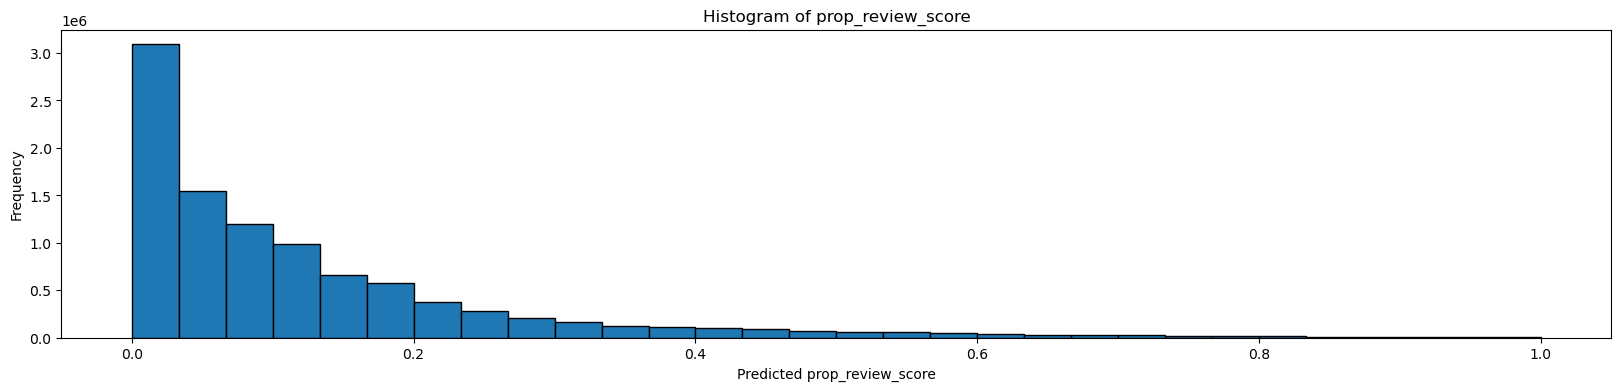

In [870]:
plt.figure(figsize=(20,4))
plt.hist(df['prop_location_score2'], bins=30, edgecolor='black')
plt.title('Histogram of prop_review_score')
plt.xlabel('Predicted prop_review_score')
plt.ylabel('Frequency')
plt.show()


Since the prediction results include scores below 0—which doesn't make sense given that the real data has a minimum value of 0—we will set all negative scores to 0 to maintain consistency with the actual data range.

In [17]:
df.loc[df['prop_location_score2']<0,'prop_location_score2']=0

In [18]:
df[df['prop_location_score2']<0]

Empty DataFrame
Columns: [srch_id, date_time, site_id, visitor_location_country_id, prop_country_id, prop_id, prop_starrating, prop_review_score, prop_brand_bool, prop_location_score1, prop_location_score2, prop_log_historical_price, position, price_usd, promotion_flag, srch_destination_id, srch_length_of_stay, srch_booking_window, srch_adults_count, srch_children_count, srch_room_count, srch_saturday_night_bool, orig_destination_distance, random_bool, click_bool, booking_bool]
Index: []

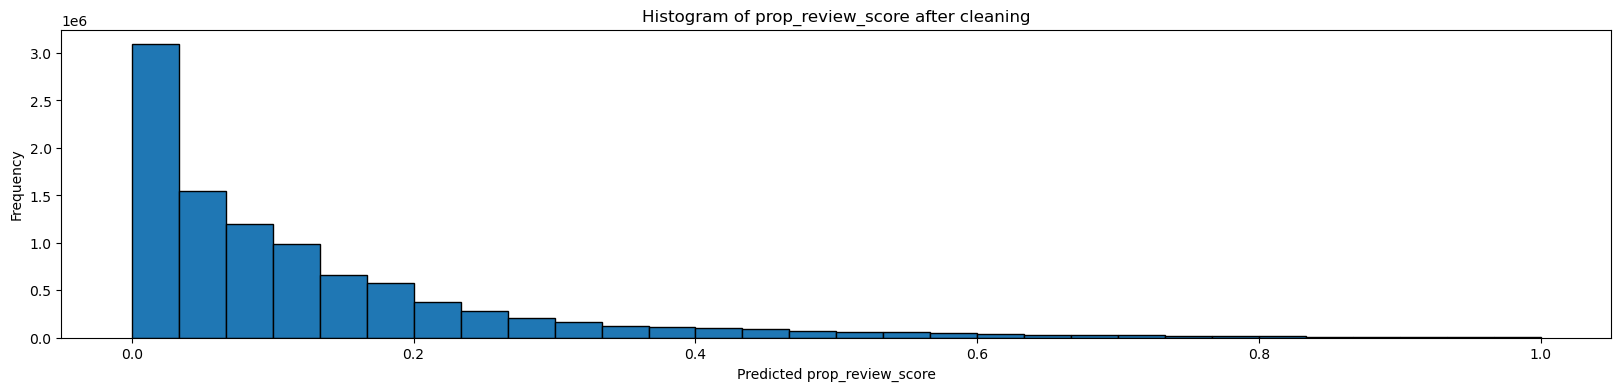

In [871]:
plt.figure(figsize=(20,4))

plt.hist(df['prop_location_score2'], bins=30, edgecolor='black')
plt.title('Histogram of prop_review_score after cleaning')
plt.xlabel('Predicted prop_review_score')
plt.ylabel('Frequency')
plt.show()


### 3.2.4 Fill orig_destination_distance from visitor_location_country_id, prop_country_id

We will use LinearRegression to fill orig_destination_distance

In [20]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

# Step 1: Separate data with and without missing target
train_data = df[df['orig_destination_distance'].notna()]
missing_data = df[df['orig_destination_distance'].isna()]

# Step 2: Select features that could help predict distance
features = ['visitor_location_country_id', 'prop_country_id']  # Add more relevant features if available

# Step 3: Train the model
X_train, y_train = train_data[features], train_data['orig_destination_distance']
model = LGBMRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 4: Predict missing values
df.loc[df['orig_destination_distance'].isna(), 'orig_destination_distance'] = model.predict(missing_data[features])


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.034077 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 153
[LightGBM] [Info] Number of data points in the train set: 6701069, number of used features: 2
[LightGBM] [Info] Start training from score 1307.017977


In [21]:
min(model.predict(missing_data[features]))

-229.24933905861263

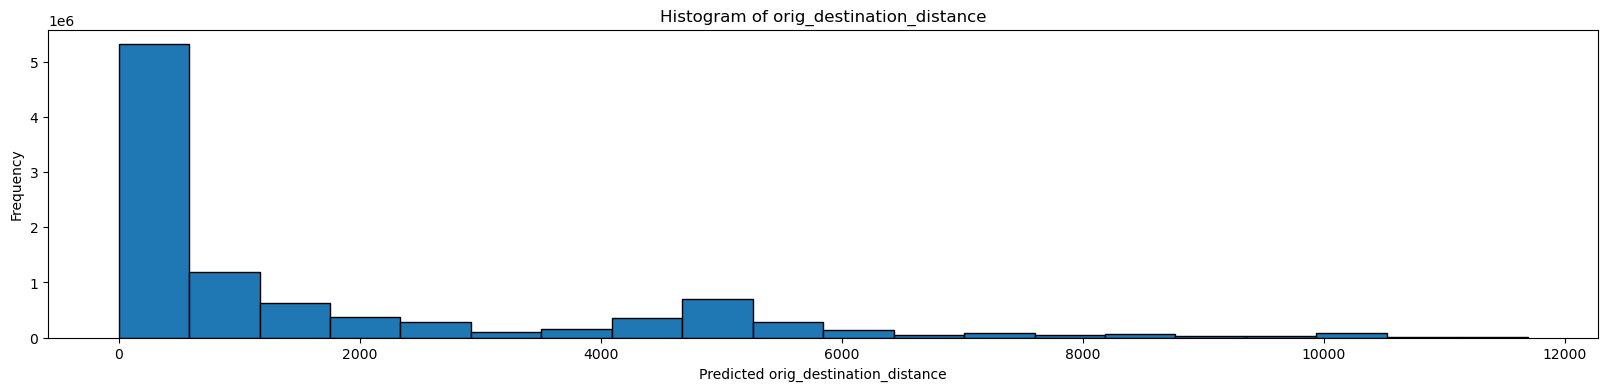

In [873]:
plt.figure(figsize=(20,4))
plt.hist(df['orig_destination_distance'], bins=20, edgecolor='black')
plt.title('Histogram of orig_destination_distance')
plt.xlabel('Predicted orig_destination_distance')
plt.ylabel('Frequency')
plt.show()


In [23]:
df.loc[df['orig_destination_distance']<0,'orig_destination_distance']=0
df[df['orig_destination_distance']<0]

Empty DataFrame
Columns: [srch_id, date_time, site_id, visitor_location_country_id, prop_country_id, prop_id, prop_starrating, prop_review_score, prop_brand_bool, prop_location_score1, prop_location_score2, prop_log_historical_price, position, price_usd, promotion_flag, srch_destination_id, srch_length_of_stay, srch_booking_window, srch_adults_count, srch_children_count, srch_room_count, srch_saturday_night_bool, orig_destination_distance, random_bool, click_bool, booking_bool]
Index: []

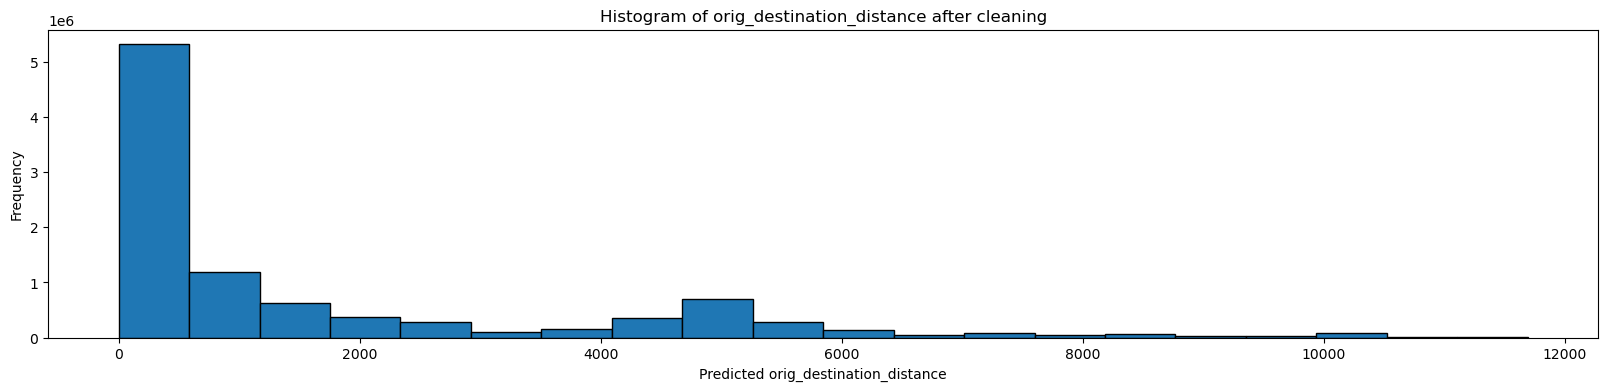

In [874]:
plt.figure(figsize=(20,4))
plt.hist(df['orig_destination_distance'], bins=20, edgecolor='black')
plt.title('Histogram of orig_destination_distance after cleaning')
plt.xlabel('Predicted orig_destination_distance')
plt.ylabel('Frequency')
plt.show()

### 3.2.5 Fill prop_review_score based on column prop_starrating

We will use LinearRegression to fill prop_review_score

In [25]:
from sklearn.linear_model import LinearRegression

# Train the model: use rows where both values are present
train_data = df.dropna(subset=['prop_review_score', 'prop_starrating'])

# Fit a model to predict review score from starrating
lr = LinearRegression()
lr.fit(train_data[['prop_starrating']], train_data['prop_review_score'])

# Find rows where review_score is missing but starrating is available
missing_mask = df['prop_review_score'].isna() & df['prop_starrating'].notna()

# Predict and round to nearest 0.5
df.loc[missing_mask, 'prop_review_score'] = np.round(
    lr.predict(df.loc[missing_mask, ['prop_starrating']]) * 2
) / 2

In [26]:
min(np.round(
    lr.predict(df.loc[missing_mask, ['prop_starrating']]) * 2
) / 2)

3.0

In [27]:
nan = check_data_summary(df)

=============== Data Summary ===============


Column Name  Total NaN  Percentage NaN  Non-Null Count  \
0                       srch_id          0             0.0         9917530   
1                     date_time          0             0.0         9917530   
24                   click_bool          0             0.0         9917530   
23                  random_bool          0             0.0         9917530   
22    orig_destination_distance          0             0.0         9917530   
21     srch_saturday_night_bool          0             0.0         9917530   
20              srch_room_count          0             0.0         9917530   
19          srch_children_count          0             0.0         9917530   
18            srch_adults_count          0             0.0         9917530   
17          srch_booking_window          0             0.0         9917530   
16          srch_length_of_stay          0             0.0         9917530   
15          srch_destination_id          0             0.0         9917530   
14               promotion_flag          0             0.0         9917530   
13                    price_usd          0             0.0         9917530   
12                     position          0             0.0         9917530   
11    prop_log_historical_price          0             0.0         9917530   
10         prop_location_score2          0             0.0         9917530   
9          prop_location_score1          0             0.0         9917530   
8               prop_brand_bool          0             0.0         9917530   
7             prop_review_score          0             0.0         9917530   
6               prop_starrating          0             0.0         9917530   
5                       prop_id          0             0.0         9917530   
4               prop_country_id          0             0.0         9917530   
3   visitor_location_country_id          0             0.0         9917530   
2                       site_id          0             0.0         9917530   
25                 booking_bool          0             0.0         9917530   

         Data Type  
0           object  
1   datetime64[ns]  
24            bool  
23            bool  
22         float64  
21            bool  
20           int64  
19           int64  
18           int64  
17           int64  
16           int64  
15          object  
14            bool  
13         float64  
12          object  
11         float64  
10         float64  
9          float64  
8             bool  
7          float64  
6            int64  
5           object  
4         category  
3         category  
2         category  
25            bool

## 3.3. Column Description

We will import data from Kaggle that explain each Column Description

In [28]:
import json

# Load the JSON
with open("expedia-hotel-metadata.json") as f:
    data = json.load(f)

# Normalize JSON to get flat structure
df_info = pd.json_normalize(data)

# Extract the field list
fields = df_info['recordSet'][0][1]['field']
fields_df = pd.DataFrame(fields)

# Filter to only include rows where 'name' is in df.columns
filtered_fields = fields_df[fields_df['name'].isin(df.columns)]

# Display desired columns
filtered_fields[['name', 'description']].sort_values(by='name')


name  \
53                 booking_bool   
51                   click_bool   
1                     date_time   
25    orig_destination_distance   
14                     position   
15                    price_usd   
16               promotion_flag   
10              prop_brand_bool   
6               prop_country_id   
7                       prop_id   
11         prop_location_score1   
12         prop_location_score2   
13    prop_log_historical_price   
9             prop_review_score   
8               prop_starrating   
26                  random_bool   
2                       site_id   
20            srch_adults_count   
19          srch_booking_window   
21          srch_children_count   
17          srch_destination_id   
0                       srch_id   
18          srch_length_of_stay   
22              srch_room_count   
23     srch_saturday_night_bool   
3   visitor_location_country_id   

                                                                                                                                                                                                  description  
53                                                                                                                                                                                                        NaN  
51                                                                                                                                                                                                        NaN  
1                                                                                                                                                                             Date and time of the search\n\n  
25                                                                         Physical distance between the hotel and the customer at the time of search. A null means the distance could not be calculated.\n\n  
14                                                                                   Hotel position on Expedia's search results page. This is only provided for the training data, but not the test data.\n\n  
15  Displayed price of the hotel for the given search.  Note that different countries have different conventions regarding displaying taxes and fees and the value may be per night or for the whole stay\n\n  
16                                                                                                                                      +1 if the hotel had a sale price promotion specifically displayed\n\n  
10                                                                                                                        +1 if the hotel is part of a major hotel chain; 0 if it is an independent hotel\n\n  
6                                                                                                                                                           The ID of the country the hotel is located in\n\n  
7                                                                                                                                                                                     The ID of the hotel\n\n  
11                                                                                                                                       A (first) score outlining the desirability of a hotel’s location\n\n  
12                                                                                                                                    A (second) score outlining the desirability of the hotel’s location\n\n  
13                                                                      The logarithm of the mean price of the hotel over the last trading period. A 0 will occur if the hotel was not sold in that period.\n  
9                          The mean customer review score for the hotel on a scale out of 5, rounded to 0.5 increments. A 0 means there have been no reviews, null that t

## 3.4. Removing Outlier

In [ ]:
def plot_numerical_boxplots(df, drop_cols=None, num_cols=5, figsize=(15, 7.5), title='Distribution and Outliers of Numerical Features'):
    """
    Plots boxplots of numerical features from a DataFrame.

    Parameters:
    - df: DataFrame
    - drop_cols: List of columns to drop before selecting numerical columns
    - num_cols: Number of plots per row
    - figsize: Size of the full figure
    - title: Title for the full plot
    """
    if drop_cols is None:
        drop_cols = []

    # Select numerical columns
    numerical_cols = df.drop(columns=drop_cols).select_dtypes(include=['number']).columns
    num_rows = int(np.ceil(len(numerical_cols) / num_cols))

    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=figsize)
    axes = axes.flatten()

    for i, col in enumerate(numerical_cols):
        sns.boxplot(data=df, x=col, ax=axes[i], color='cyan')
        axes[i].set_title(col, fontsize=12)
        print(col)

    # Turn off any empty subplots
    for ax in axes[len(numerical_cols):]:
        ax.axis('off')

    # Add a big title
    fig.suptitle(title, fontsize=18, fontweight='bold', y=1.02)
    
    plt.tight_layout()
    plt.show()
    
plot_numerical_boxplots(df, drop_cols=[], num_cols=5)


Most columns contain significant outliers, except for prop_starrating, prop_review_score, and prop_location_score1.

We will retain these outliers for now to evaluate their impact during testing, with the exception of the following variables:

srch_booking_window: Will be capped at 365 days, assuming that users typically don’t plan trips more than a year in advance.

price: We will set an upper limit based on the distribution of hotel prices. Extremely high prices that are uncommon will be considered outliers and removed.

length_of_stay: We will determine a reasonable cap based on whether longer stays are actually associated with bookings in the dataset.

### 3.4.1. srch_booking_window

In [30]:
total = df[(df['srch_booking_window']>=365)&(df['booking_bool']==True)].shape[0]
total_not = df[(df['srch_booking_window']>=365)&(df['booking_bool']==False)].shape[0]
print(f'''  
People that book window above 365 days and booked: {total}
People that book window above 365 days and NOT booked : {total_not}
Percentage Data : {round((total_not+total)/df.shape[0]*100,2)} %
      ''')

  
People that book window above 365 days and booked: 75
People that book window above 365 days and NOT booked : 3000
Percentage Data : 0.03 %
      


We will remove the data to minimize bias

In [31]:
df[(df['srch_booking_window']>=365)].index

Index([  84438,   84439,   84440,   84441,   84442,   84443,   95832,   95833,
         95834,   95835,
       ...
       9910098, 9910099, 9910100, 9910101, 9910102, 9910103, 9910104, 9910105,
       9910106, 9910107],
      dtype='int64', length=3075)

In [32]:
before = df.shape[0]
df.drop(df[(df['srch_booking_window']>=365)].index,inplace=True)
after = df.shape[0]
print(f'Row before : {before} ----> After {after} (Deleted :{total+total_not})')

Row before : 9917530 ----> After 9914455 (Deleted :3075)


### 3.4.2. Price

In [33]:
total_below = df[df['price_usd']==df['price_usd'].min()].shape[0]
total_below

54

We will remove data that Price = 0 , maybe this data the costumer got a discount or promotion. It will affect our model so it will be removed.

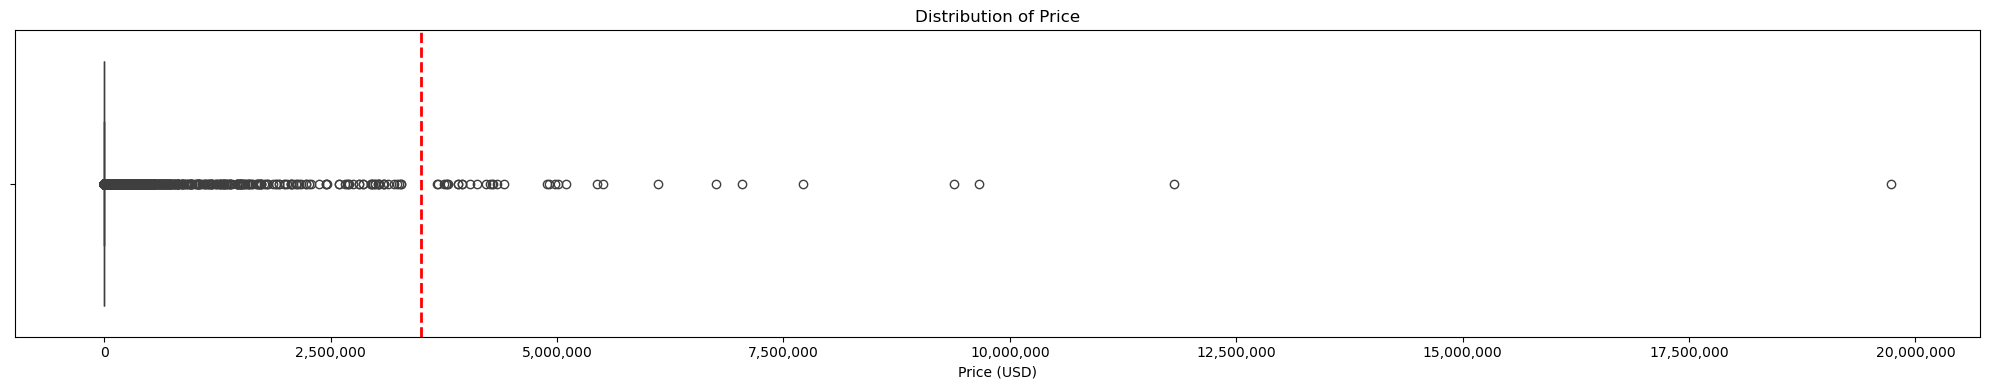

In [ ]:
import matplotlib.ticker as ticker

plt.figure(figsize=(20, 4))
sns.boxplot(x=df['price_usd'])

# Format x-axis labels to use commas and avoid scientific notation
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.axvline(x=3500000, color='red', linestyle='--', linewidth=2, label='Threshold = 289,840')

plt.title('Distribution of Price')
plt.xlabel('Price (USD)')
plt.tight_layout()
plt.show()

In [35]:
# Set threshold
threshold = 2_500_000

# Filter values above the threshold
high_prices = df[df['price_usd'] > threshold].sort_values(by='price_usd')
high_prices['diff'] = high_prices['price_usd'].diff()
high_prices.sort_values(by='diff',ascending=False)[['price_usd','diff']].head()

price_usd        diff
1168566  19726328.00  7908317.00
680748   11818011.00  2156671.00
3117007   9381308.71  1661897.71
5447762   7719411.00   676294.00
5447768   6753277.00   636887.52

In [36]:
total_above = df[df['price_usd'] > 3500000].shape[0]
total_above

33

In [37]:
df[(df['price_usd'] > 3_500_000) | (df['price_usd'] == df['price_usd'].min())].index

Index([ 460025,  680748, 1168562, 1168566, 1168574, 1168576, 1168578, 1168580,
       1168581, 1168583, 1436118, 1436126, 2362328, 2362332, 2362337, 2362339,
       2362347, 2362348, 2362351, 2362352, 2362355, 2945135, 2945143, 3116994,
       3117007, 3564040, 3564042, 3564044, 3564045, 3564046, 3564048, 3564049,
       3564050, 3564053, 3564054, 3564055, 3564056, 3564060, 3564061, 3564062,
       3564063, 3564064, 3564068, 3564069, 4172824, 5447762, 5447763, 5447765,
       5447767, 5447768, 5447769, 6293389, 6293391, 6293398, 6293399, 6293401,
       6293403, 6293406, 6293408, 7006720, 7288959, 7288962, 7288968, 7288973,
       7752950, 7752951, 7752952, 7752953, 7752955, 7752956, 7752957, 7752958,
       7752960, 7752963, 7752964, 7752966, 7752968, 7752969, 7752970, 7752971,
       7752972, 7752973, 7752974, 7752976, 7752977, 7752978, 7752979],
      dtype='int64')

In [38]:
before = df.shape[0]
df.drop(df[(df['price_usd'] > 3_500_000) | (df['price_usd'] == df['price_usd'].min())].index,inplace=True)
after = df.shape[0]
print(f'Row before : {before} ----> After {after} (Deleted :{total_below+total_above})')

Row before : 9914455 ----> After 9914368 (Deleted :87)


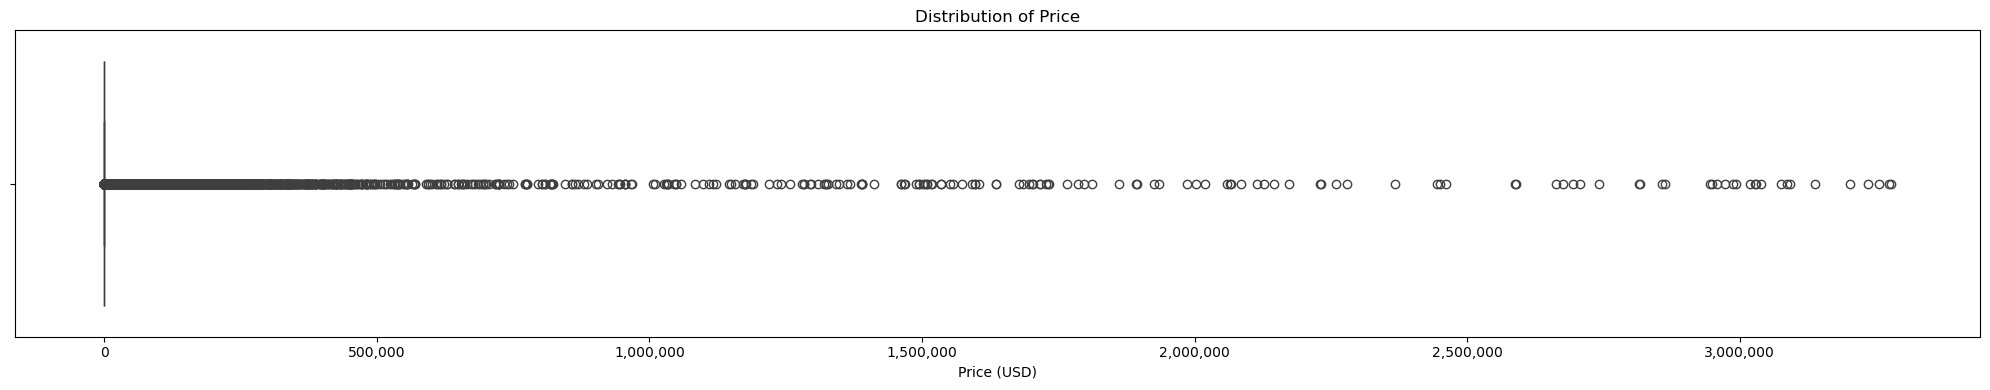

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

plt.figure(figsize=(20, 4))
sns.boxplot(x=df['price_usd'])

# Format x-axis labels to use commas and avoid scientific notation
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.title('Distribution of Price')
plt.xlabel('Price (USD)')
plt.tight_layout()
plt.show()

### 3.4.3. lenght_of_stay

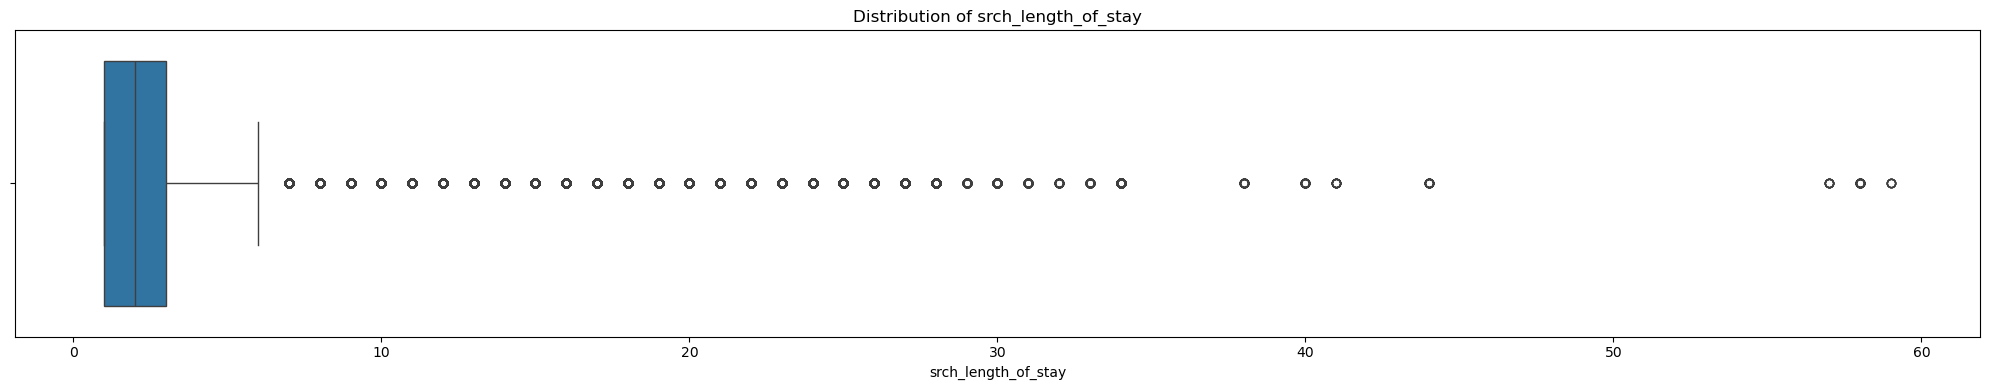

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

plt.figure(figsize=(20, 4))
sns.boxplot(x=df['srch_length_of_stay'])

# Format x-axis labels to use commas and avoid scientific notation
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.title('Distribution of srch_length_of_stay')
plt.xlabel('srch_length_of_stay')
plt.tight_layout()
plt.show()

We will cut in 35 because visible gap

In [41]:
df[df['srch_length_of_stay']>35].index

Index([1458916, 1458917, 1458918, 1458919, 1458920, 1458921, 1458922, 1523535,
       1523536, 1523537,
       ...
       7429176, 7429177, 7429178, 7429179, 7429180, 8076002, 8076003, 8076004,
       8076005, 8076006],
      dtype='int64', length=137)

In [42]:
total = df[df['srch_length_of_stay']>35].shape[0]
before = df.shape[0]
df.drop(df[df['srch_length_of_stay']>35].index,inplace=True)
after = df.shape[0]
print(f'Row before : {before} ----> After {after} (Deleted :{total})')

Row before : 9914368 ----> After 9914231 (Deleted :137)


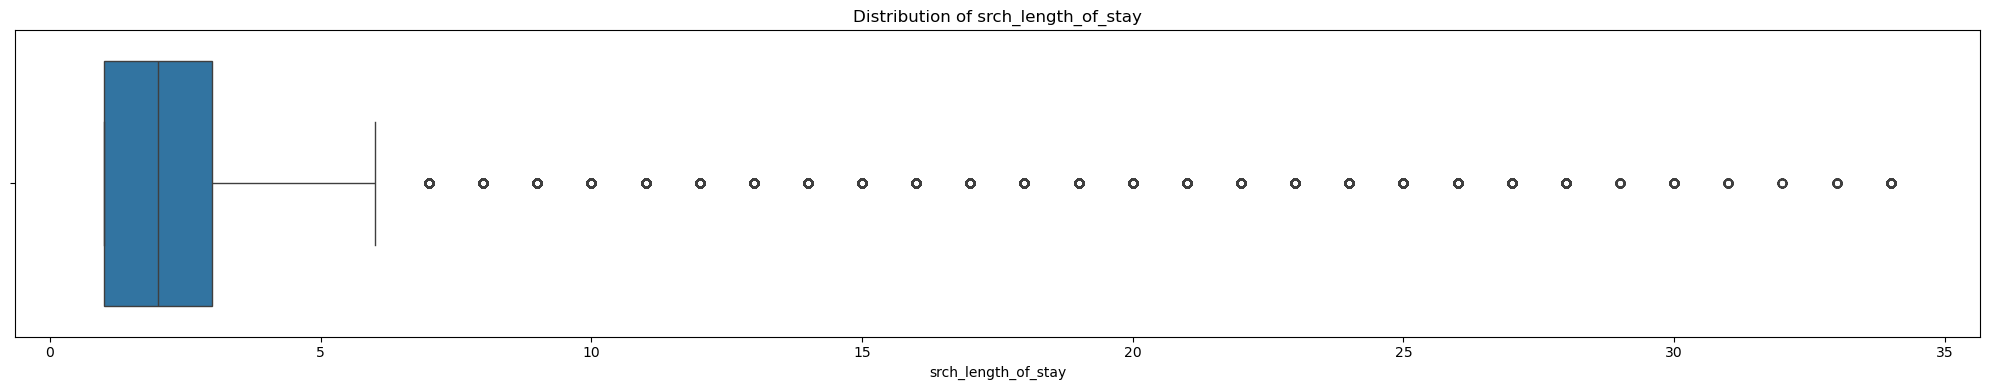

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

plt.figure(figsize=(20, 4))
sns.boxplot(x=df['srch_length_of_stay'])

# Format x-axis labels to use commas and avoid scientific notation
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.title('Distribution of srch_length_of_stay')
plt.xlabel('srch_length_of_stay')
plt.tight_layout()
plt.show()

We will drop position and srch_id after we analyze

## 3.5. Feature Enginering

### 3.5.1 Date Time Related

In [47]:
def time_of_day_category(t):
    hour = t.hour
    if 5 <= hour < 8:
        return 'Early Morning'
    elif 8 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 15:
        return 'Midday'
    elif 15 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 21:
        return 'Evening'
    elif 21 <= hour < 24:
        return 'Late Night'
    else:
        return 'Overnight'
df['time_of_day'] = df['date_time'].dt.time.apply(time_of_day_category)
df['month'] = df['date_time'].dt.month_name()
df['day'] = df['date_time'].dt.day_name()
df['day'] = df['date_time'].dt.day_name()
df['date_time'] = df['date_time'].dt.date
df

srch_id   date_time site_id visitor_location_country_id  \
0             1  2013-04-04      12                 Country_187   
1             1  2013-04-04      12                 Country_187   
2             1  2013-04-04      12                 Country_187   
3             1  2013-04-04      12                 Country_187   
4             1  2013-04-04      12                 Country_187   
...         ...         ...     ...                         ...   
9917525  665574  2013-05-21      24                 Country_216   
9917526  665574  2013-05-21      24                 Country_216   
9917527  665574  2013-05-21      24                 Country_216   
9917528  665574  2013-05-21      24                 Country_216   
9917529  665574  2013-05-21      24                 Country_216   

        prop_country_id         prop_id  prop_starrating  prop_review_score  \
0           Country_219    Property_893                3                3.5   
1           Country_219  Property_10404                4                4.0   
2           Country_219  Property_21315                3                4.5   
3           Country_219  Property_27348                2                4.0   
4           Country_219  Property_29604                4                3.5   
...                 ...             ...              ...                ...   
9917525     Country_117  Property_32019                4                3.5   
9917526     Country_117  Property_33959                4                3.0   
9917527     Country_117  Property_35240                4                0.0   
9917528     Country_117  Property_94437                4                0.0   
9917529     Country_117  Property_99509                4                4.5   

         prop_brand_bool  prop_location_score1  prop_location_score2  \
0                   True                  2.83              0.043800   
1                   True                  2.20              0.014900   
2                   True                  2.20              0.024500   
3                   True                  2.83              0.012500   
4                   True                  2.64              0.124100   
...                  ...                   ...                   ...   
9917525            False                  2.48              0.055100   
9917526             True                  2.20              0.334400   
9917527            False                  1.79              0.072408   
9917528            False                  2.94              0.092800   
9917529             True                  2.08              0.034400   

         prop_log_historical_price position  price_usd  promotion_flag  \
0                             4.95       27     104.77           False   
1                             5.03       26     170.74           False   
2                             4.92       21     179.80           False   
3                             4.39       34     602.77           False   
4                             4.93        4     143.58           False   
...                            ...      ...        ...             ...   
9917525                       4.53        2      66.07           False   
9917526                       4.39        6      67.10           False   
9917527                       4.64        8      73.91           False   
9917528                       4.64        7      66.07           False   
9917529                       4.64        4      82.06           False   

        srch_destination_id  srch_length_of_stay  srch_booking_window  \
0                     23246                    1                    0   
1                     23246                    1                    0   
2                     23246                    1                    0   
3                     23246                    1                    0   
4                     23246                    1                    0   
...                     ...                  ...              

### 3.5.2 searches_order

In [48]:
df[df['srch_id'] == '1']['booking_bool'][12]

True

In [49]:
# Each srch_id is on the same day and the same month
df.groupby('srch_id')[['month', 'day']].nunique().sort_values(by='month',ascending=False)

month  day
srch_id            
1            1    1
499519       1    1
499552       1    1
499550       1    1
499549       1    1
...        ...  ...
299544       1    1
299543       1    1
299542       1    1
299537       1    1
99999        1    1

[399155 rows x 2 columns]

In [ ]:
# Add a search order per srch_id
df['search_order'] = df.groupby('srch_id').cumcount() + 1 # Count the rows within each srch_id group.

# **4. Analysis**

## **🔹 Part 1. User Intent & Booking Preferences**

In this part we will talk about all user preference in booking a hotel, in the end we will get an insight to customize our offer to get the most revenue.

In [55]:
df_part_1 = df.copy()
df_part_1.head()

srch_id   date_time site_id visitor_location_country_id prop_country_id  \
0       1  2013-04-04      12                 Country_187     Country_219   
1       1  2013-04-04      12                 Country_187     Country_219   
2       1  2013-04-04      12                 Country_187     Country_219   
3       1  2013-04-04      12                 Country_187     Country_219   
4       1  2013-04-04      12                 Country_187     Country_219   

          prop_id  prop_starrating  prop_review_score  prop_brand_bool  \
0    Property_893                3                3.5             True   
1  Property_10404                4                4.0             True   
2  Property_21315                3                4.5             True   
3  Property_27348                2                4.0             True   
4  Property_29604                4                3.5             True   

   prop_location_score1  prop_location_score2  prop_log_historical_price  \
0                  2.83                0.0438                       4.95   
1                  2.20                0.0149                       5.03   
2                  2.20                0.0245                       4.92   
3                  2.83                0.0125                       4.39   
4                  2.64                0.1241                       4.93   

  position  price_usd  promotion_flag srch_destination_id  \
0       27     104.77           False               23246   
1       26     170.74           False               23246   
2       21     179.80           False               23246   
3       34     602.77           False               23246   
4        4     143.58           False               23246   

   srch_length_of_stay  srch_booking_window  srch_adults_count  \
0                    1                    0                  4   
1                    1                    0                  4   
2                    1                    0                  4   
3                    1                    0                  4   
4                    1                    0                  4   

   srch_children_count  srch_room_count  srch_saturday_night_bool  \
0                    0                1                      True   
1                    0                1                      True   
2                    0                1                      True   
3                    0                1                      True   
4                    0                1                      True   

   orig_destination_distance  random_bool  click_bool  booking_bool  \
0                4864.702448         True       False         False   
1                4864.702448         True       False         False   
2                4864.702448         True       False         False   
3                4864.702448         True       False         False   
4                4864.702448         True       False         False   

  time_of_day  month       day  search_order  
0     Morning  April  Thursday             1  
1     Morning  April  Thursday             2  
2     Morning  April  Thursday             3  
3     Morning  April  Thursday             4  
4     Morning  April  Thursday             5

### 1.a. Which country is most likely to be check out by each visitor_location_country_id

We will check each visitor_location_country_id what is the most preferable country the search, this will give use insight to give a recomendation for them.

We will calculate to which country that lead to book for each visitor country.

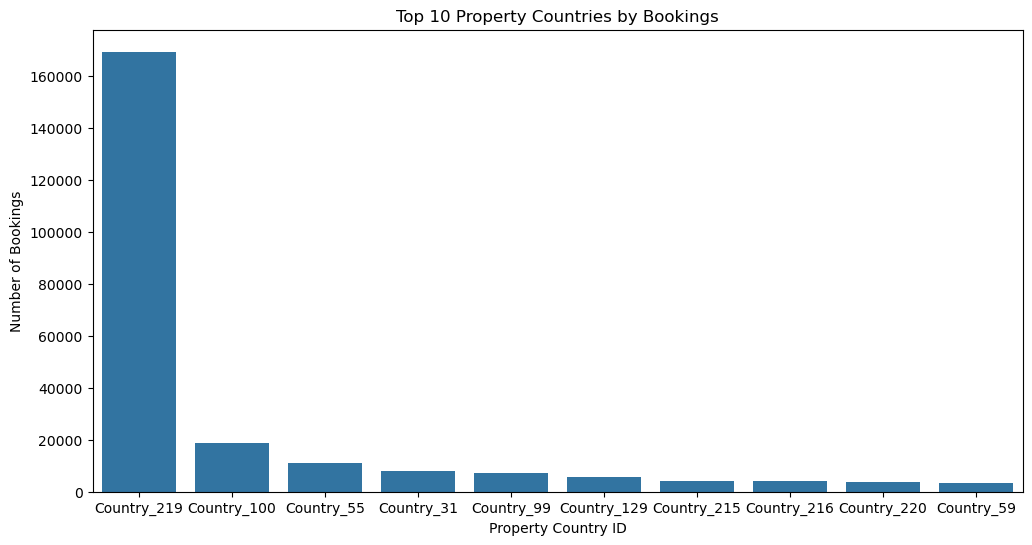

In [56]:
# Get top 10 most booked property countries
top_10 = df_part_1[df_part_1['booking_bool'] == True]['prop_country_id'].value_counts().head(10)

# Convert to DataFrame for plotting
top_10_df = top_10.reset_index()

top_10_df['prop_country_id'] = top_10_df['prop_country_id'].cat.remove_unused_categories() 
# if used category dtype need to remove unused cat

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_df, x='prop_country_id', y='count', order=top_10_df['prop_country_id'])
plt.title('Top 10 Property Countries by Bookings')
plt.xlabel('Property Country ID')
plt.ylabel('Number of Bookings')
plt.show()

Hotel in Country_219 is the most ordered from all the data

In [58]:
heatmap_country = df_part_1[df_part_1['booking_bool'] == True] \
    .groupby(['visitor_location_country_id', 'prop_country_id']) \
    .size() \
    .unstack(fill_value=0)
heatmap_country

prop_country_id              Country_1  Country_10  Country_100  Country_102  \
visitor_location_country_id                                                    
Country_1                            1           0            0            0   
Country_10                           0           3            0            0   
Country_100                          0           2        14170            8   
Country_101                          0           0            0            0   
Country_102                          0           0            0           20   
...                                ...         ...          ...          ...   
Country_94                           0           0            0            0   
Country_95                           0           0            0            0   
Country_97                           0           0            0            0   
Country_98                           0           0            9            0   
Country_99                           2           1           64            1   

prop_country_id              Country_103  Country_106  Country_108  \
visitor_location_country_id                                          
Country_1                              0            0            0   
Country_10                             0            0            0   
Country_100                           56            1            0   
Country_101                            0            0            0   
Country_102                            0            0            0   
...                                  ...          ...          ...   
Country_94                             0            0            0   
Country_95                             0            0            0   
Country_97                             0            0            0   
Country_98                             2            0            0   
Country_99                             2            3            2   

prop_country_id              Country_109  Country_11  Country_111  \
visitor_location_country_id                                         
Country_1                              0           0            0   
Country_10                             0           0            0   
Country_100                           87           2            0   
Country_101                            0           0            0   
Country_102                            0           0            0   
...                                  ...         ...          ...   
Country_94                             0           0            0   
Country_95                             0           0            0   
Country_97                             0           0            0   
Country_98                             0           0            0   
Country_99                            22           0            0   

prop_country_id              Country_112  Country_113  Country_117  \
visitor_location_country_id                                          
Country_1                              0            0            0   
Country_10                             0            0            1   
Country_100                            1            8           92   
Country_101                            0            0            0   
Country_102                            0            0            1   
...                                  ...          ...          ...   
Country_94                             0            0            0   
Country_95                             0            0            0   
Country_97                             0            0            0   
Country_98                             0            0            8   
Country_99                             0            0           18   

prop_country_id              Country_119  Country_120  Country_122  \
visitor_location_country_id                                          
Country_1                              0            0            0   
Country_10                   

In [59]:
# Calculate total bookings from all destinations per visitor country
total_orders = heatmap_country.sum(axis=1)

top_destinations = []

for visitor_id in heatmap_country.index:
    # Get the top 5 property countries and their values
    top10 = heatmap_country.loc[visitor_id].sort_values(ascending=False).head(5)
    
    row = {
        'visitor_location_country_id': visitor_id,
        'total_order_all': total_orders.loc[visitor_id]  # total from all columns
    }
    
    for i in range(5):
        row[f'top{i+1}_country_destination'] = top10.index[i]
        row[f'total_order_{i+1}'] = top10.iloc[i]
    
    top_destinations.append(row)

# Convert the list of dictionaries into a DataFrame
top_destinations_df = pd.DataFrame(top_destinations)

top_destinations_df


visitor_location_country_id  total_order_all top1_country_destination  \
0                     Country_1               10               Country_53   
1                    Country_10               15              Country_158   
2                   Country_100            27733              Country_100   
3                   Country_101                2               Country_42   
4                   Country_102               34              Country_102   
..                          ...              ...                      ...   
213                  Country_94                2               Country_99   
214                  Country_95                3              Country_211   
215                  Country_97                8               Country_97   
216                  Country_98              685               Country_98   
217                  Country_99             3550               Country_99   

     total_order_1 top2_country_destination  total_order_2  \
0                4              Country_219              2   
1                4               Country_98              3   
2            14170              Country_219           8985   
3                1               Country_31              1   
4               20              Country_158              2   
..             ...                      ...            ...   
213              1               Country_31              1   
214              2              Country_220              1   
215              2               Country_99              1   
216            354              Country_219             65   
217           1260              Country_219            649   

    top3_country_destination  total_order_3 top4_country_destination  \
0                  Country_1              1               Country_65   
1                 Country_10              3              Country_219   
2                 Country_55            578               Country_31   
3                  Country_1              0               Country_34   
4                 Country_55              2              Country_120   
..                       ...            ...                      ...   
213               Country_34              0              Country_230   
214                Country_1              0               Country_34   
215               Country_32              1              Country_205   
216              Country_216             35              Country_205   
217               Country_31            275              Country_215   

     total_order_4 top5_country_destination  total_order_5  
0                1              Country_221              1  
1                2              Country_117              1  
2              540               Country_99            409  
3                0              Country_230              0  
4                2               Country_15              1  
..             ...                      ...            ...  
213              0               Country_25              0  
214              0               Country_25              0  
215              1               Country_50              1  
216             29               Country_39             27  
217            232               Country_55            158  

[218 rows x 12 columns]

In this table, we can see the top 10 of visitor_location_country_id and for each Country top 5 country they visit.

In [60]:
top_destinations_df.sort_values(by='total_order_all',ascending=False).head(10)

visitor_location_country_id  total_order_all top1_country_destination  \
125                 Country_219           163102              Country_219   
2                   Country_100            27733              Country_100   
171                  Country_55            16250               Country_55   
122                 Country_216            12985              Country_219   
127                 Country_220             8922              Country_220   
31                  Country_129             6603              Country_129   
147                  Country_31             4657               Country_31   
217                  Country_99             3550               Country_99   
175                  Country_59             3189               Country_59   
211                  Country_92             2556              Country_219   

     total_order_1 top2_country_destination  total_order_2  \
125         142911              Country_100           3177   
2            14170              Country_219           8985   
171           5847              Country_219           2299   
122           2845              Country_216           1672   
127           2615              Country_219           1911   
31            2109              Country_219           1459   
147           1970              Country_219            491   
217           1260              Country_219            649   
175           1337              Country_219           1274   
211            618              Country_216            429   

    top3_country_destination  total_order_3 top4_country_destination  \
125               Country_31           1740               Country_55   
2                 Country_55            578               Country_31   
171               Country_99           1294               Country_31   
122               Country_92            926               Country_98   
127               Country_55            459              Country_103   
31                Country_99            370               Country_31   
147               Country_99            399               Country_55   
217               Country_31            275              Country_215   
175               Country_31             79              Country_215   
211               Country_92            242              Country_205   

     total_order_4 top5_country_destination  total_order_5  
125           1494               Country_59           1308  
2              540               Country_99            409  
171            870              Country_215            707  
122            653               Country_99            596  
127            323               Country_31            303  
31             361               Country_55            357  
147            279              Country_215            243  
217            232               Country_55            158  
175             77               Country_99             64  
211            109               Country_31             99

In [61]:
# Calculate percentage of users who booked a property in their own country for the top 1 destination
top_destinations_df['same_country_top1'] = top_destinations_df['visitor_location_country_id'] == top_destinations_df['top1_country_destination']
top1_percentage = round(top_destinations_df['same_country_top1'].mean() * 100, 2)

# Output the result
print(f"Users who booked in the same country as the property (Top 1): {top1_percentage}%")

Users who booked in the same country as the property (Top 1): 19.72%


**Insight:**

19% of users who chose a property in their top 1 destination ordered a hotel within their own country. Based on this, we can recommend properties in the user's own country first and then provide the next 2-4 recommendations based on other top destinations for that visitor's location.

This approach uses user preferences to tailor recommendations, increasing the likelihood of conversion by targeting both familiar (domestic) and relevant international options.

### 1.b. Which property is most likely to be check out by each visitor_location_country_id

We will check each visitor_location_country_id what is the most preferable prop_id the search, this will give use insight to give a recomendation for them.

We will calculate to which prop_id that lead to book for each visitor country.

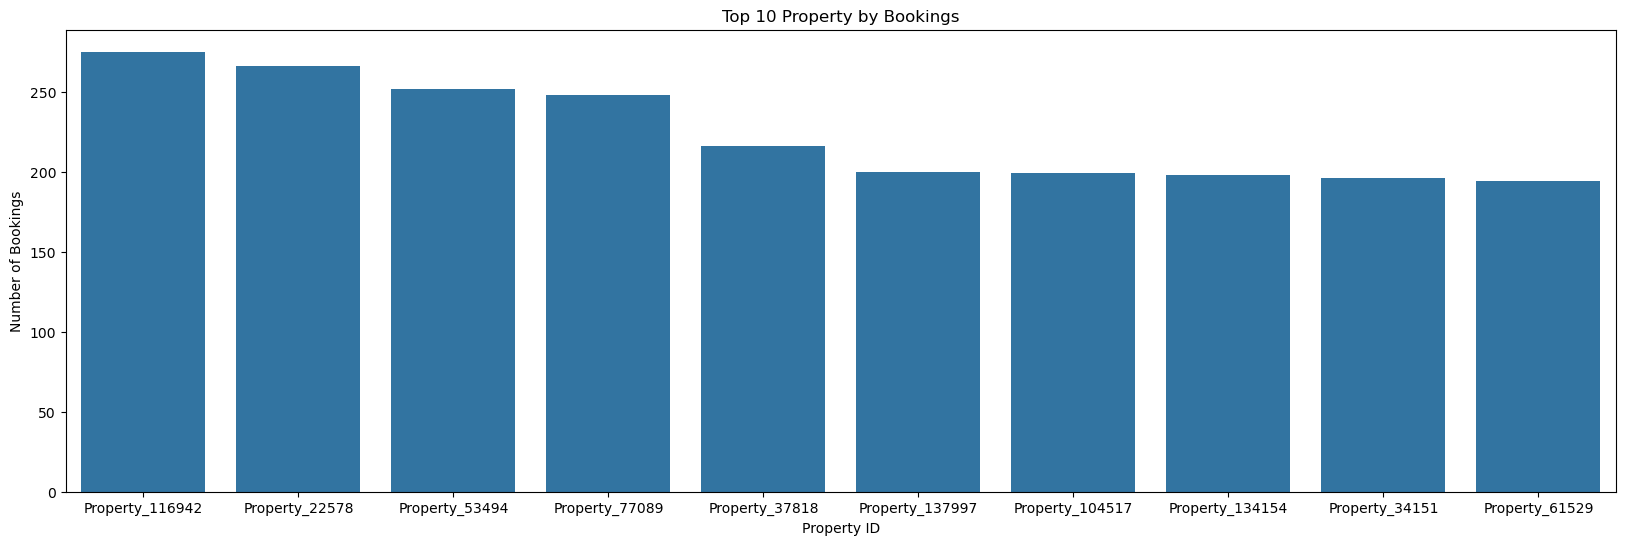

In [62]:
# Get top 10 most booked property countries
top_10_prop = df_part_1[df_part_1['booking_bool'] == True]['prop_id'].value_counts().head(10)

# Convert to DataFrame for plotting
top_10_prop_df = top_10_prop.reset_index()

plt.figure(figsize=(20, 6))
sns.barplot(data=top_10_prop_df, x='prop_id', y='count', order=top_10_prop_df['prop_id'])
plt.title('Top 10 Property by Bookings')
plt.xlabel('Property ID')
plt.ylabel('Number of Bookings')
plt.show()

Property 116942 is the most booked property in the dataset

In [63]:
heatmap_country = df_part_1[df_part_1['booking_bool'] == True] \
    .groupby(['visitor_location_country_id', 'prop_id']) \
    .size() \
    .unstack(fill_value=0)

In [64]:
# Calculate total bookings from all destinations per visitor country
total_orders = heatmap_country.sum(axis=1)

top_property = []

for visitor_id in heatmap_country.index:
    # Get the top 5 property countries and their values
    top10 = heatmap_country.loc[visitor_id].sort_values(ascending=False).head(5)
    
    row = {
        'visitor_location_country_id': visitor_id,
        'total_order_all': total_orders.loc[visitor_id]  # total from all columns
    }
    
    for i in range(5):
        row[f'top{i+1}_property'] = top10.index[i]
        row[f'total_order_{i+1}'] = top10.iloc[i]
        
    
    top_property.append(row)

# Convert the list of dictionaries into a DataFrame
top_property_df = pd.DataFrame(top_property)

top_property_df


visitor_location_country_id  total_order_all    top1_property  \
0                     Country_1               10   Property_41079   
1                    Country_10               15  Property_135210   
2                   Country_100            27733  Property_132210   
3                   Country_101                2   Property_28922   
4                   Country_102               34  Property_100253   
..                          ...              ...              ...   
213                  Country_94                2   Property_36785   
214                  Country_95                3   Property_38711   
215                  Country_97                8   Property_45321   
216                  Country_98              685   Property_59054   
217                  Country_99             3550  Property_112281   

     total_order_1    top2_property  total_order_2    top3_property  \
0                2  Property_133509              1  Property_104652   
1                2  Property_139518              1   Property_28411   
2              141   Property_50810             89   Property_51178   
3                1   Property_47123              1       Property_1   
4                3   Property_72673              2   Property_83228   
..             ...              ...            ...              ...   
213              1   Property_76504              1   Property_57455   
214              1  Property_101532              1   Property_59821   
215              1   Property_84176              1   Property_65801   
216              7   Property_93411              6  Property_108588   
217             12   Property_14536              8   Property_86907   

     total_order_3    top4_property  total_order_4    top5_property  \
0                1   Property_61539              1    Property_9881   
1                1   Property_25168              1  Property_103602   
2               88   Property_80545             76   Property_88854   
3                0   Property_57474              0   Property_57458   
4                2   Property_41804              2   Property_53146   
..             ...              ...            ...              ...   
213              0   Property_57458              0   Property_57459   
214              1       Property_1              0   Property_57479   
215              1  Property_111830              1   Property_40524   
216              4   Property_34746              3  Property_135822   
217              8     Property_751              7    Property_1230   

     total_order_5  
0                1  
1                1  
2               74  
3                0  
4                2  
..             ...  
213              0  
214              0  
215              1  
216              3  
217              6  

[218 rows x 12 columns]

In [65]:
top_property_df.sort_values(by='total_order_all',ascending=False).head(10)

visitor_location_country_id  total_order_all    top1_property  \
125                 Country_219           163102   Property_22578   
2                   Country_100            27733  Property_132210   
171                  Country_55            16250   Property_25517   
122                 Country_216            12985   Property_98803   
127                 Country_220             8922  Property_128632   
31                  Country_129             6603  Property_119707   
147                  Country_31             4657    Property_2951   
217                  Country_99             3550  Property_112281   
175                  Country_59             3189   Property_30743   
211                  Country_92             2556   Property_98803   

     total_order_1   top2_property  total_order_2    top3_property  \
125            212  Property_77089            208  Property_116942   
2              141  Property_50810             89   Property_51178   
171             44  Property_88359             30   Property_90192   
122             97  Property_50608             62   Property_35043   
127             40  Property_36358             32   Property_18380   
31              14  Property_43312             12  Property_133375   
147             10  Property_30713             10   Property_64001   
217             12  Property_14536              8   Property_86907   
175             20  Property_21517             18   Property_59198   
211             26  Property_44376             19    Property_2136   

     total_order_3    top4_property  total_order_4    top5_property  \
125            203   Property_37818            184  Property_134154   
2               88   Property_80545             76   Property_88854   
171             29   Property_95949             26   Property_38576   
122             39   Property_84269             33     Property_640   
127             26  Property_105534             26   Property_18552   
31              11   Property_93536             11   Property_49242   
147              8   Property_53498              7  Property_135708   
217              8     Property_751              7    Property_1230   
175             16     Property_458             16   Property_37495   
211             16   Property_98362             12   Property_94974   

     total_order_5  
125            179  
2               74  
171             23  
122             32  
127             25  
31              11  
147              7  
217              6  
175             14  
211             11

Insight :

In this tabel we can use it as a recommendation for each Country, for example when user from Country_219 search property Property_22578, we can give the top 2-5 for them.

We can further this by using User Centric Matrix, we will do in another time.

### 1.c. Does prop_review_score corelate with booking_bool

How many each numerical got booking_bool

We will treat prop_review_score as category and calculate how much hotel got booked, with this we can know if the higher score the more book

In [66]:
df_part_1[df_part_1['prop_review_score']>0]

srch_id   date_time site_id visitor_location_country_id  \
0             1  2013-04-04      12                 Country_187   
1             1  2013-04-04      12                 Country_187   
2             1  2013-04-04      12                 Country_187   
3             1  2013-04-04      12                 Country_187   
4             1  2013-04-04      12                 Country_187   
...         ...         ...     ...                         ...   
9917523  665574  2013-05-21      24                 Country_216   
9917524  665574  2013-05-21      24                 Country_216   
9917525  665574  2013-05-21      24                 Country_216   
9917526  665574  2013-05-21      24                 Country_216   
9917529  665574  2013-05-21      24                 Country_216   

        prop_country_id         prop_id  prop_starrating  prop_review_score  \
0           Country_219    Property_893                3                3.5   
1           Country_219  Property_10404                4                4.0   
2           Country_219  Property_21315                3                4.5   
3           Country_219  Property_27348                2                4.0   
4           Country_219  Property_29604                4                3.5   
...                 ...             ...              ...                ...   
9917523     Country_117  Property_22854                5                4.5   
9917524     Country_117  Property_29018                4                5.0   
9917525     Country_117  Property_32019                4                3.5   
9917526     Country_117  Property_33959                4                3.0   
9917529     Country_117  Property_99509                4                4.5   

         prop_brand_bool  prop_location_score1  prop_location_score2  \
0                   True                  2.83                0.0438   
1                   True                  2.20                0.0149   
2                   True                  2.20                0.0245   
3                   True                  2.83                0.0125   
4                   True                  2.64                0.1241   
...                  ...                   ...                   ...   
9917523             True                  2.30                0.1935   
9917524             True                  2.56                0.0538   
9917525            False                  2.48                0.0551   
9917526             True                  2.20                0.3344   
9917529             True                  2.08                0.0344   

         prop_log_historical_price position  price_usd  promotion_flag  \
0                             4.95       27     104.77           False   
1                             5.03       26     170.74           False   
2                             4.92       21     179.80           False   
3                             4.39       34     602.77           False   
4                             4.93        4     143.58           False   
...                            ...      ...        ...             ...   
9917523                       4.96        1     109.71           False   
9917524                       4.64        3      70.05           False   
9917525                       4.53        2      66.07           False   
9917526                       4.39        6      67.10           False   
9917529                       4.64        4      82.06           False   

        srch_destination_id  srch_length_of_stay  srch_booking_window  \
0                     23246                    1                    0   
1                     23246                    1                    0   
2                     23246                    1                    0   
3                     23246                    1                    0   
4                     23246                    1                    0   
...                     ...                  ...              

In [753]:
# Sort so bookings come first (True > False)
df_sorted = df_part_1.sort_values(by='booking_bool', ascending=False)

# Keep the first row per srch_id (i.e., booking if it exists)
df_unique_search = df_sorted.drop_duplicates(subset='srch_id')
df_unique_search

srch_id   date_time site_id visitor_location_country_id  \
2585584  173608  2013-01-04       5                 Country_206   
7932789  533069  2013-01-08       5                 Country_219   
9325259  626025  2013-03-16       5                 Country_219   
609174    40681  2012-11-08       5                 Country_219   
6904353  463723  2012-11-18      14                 Country_100   
...         ...         ...     ...                         ...   
3352551  225172  2013-01-01      15                  Country_55   
3352608  225179  2013-05-13       5                 Country_219   
3352534  225171  2013-05-21       5                 Country_219   
3352493  225169  2013-02-12       5                 Country_219   
3352721  225187  2013-04-22      25                 Country_215   

        prop_country_id          prop_id  prop_starrating  prop_review_score  \
2585584     Country_206   Property_52508                4                4.0   
7932789     Country_219   Property_94737                2                3.0   
9325259     Country_219   Property_17820                3                4.0   
609174      Country_132  Property_137048                4                4.5   
6904353     Country_219  Property_124770                2                4.0   
...                 ...              ...              ...                ...   
3352551      Country_73   Property_44427                4                4.5   
3352608     Country_219    Property_6456                2                3.0   
3352534     Country_219   Property_45125                3                3.5   
3352493     Country_219  Property_124166                4                4.0   
3352721     Country_215    Property_5791                3                0.0   

         prop_brand_bool  prop_location_score1  prop_location_score2  \
2585584             True                  0.00              0.247100   
7932789             True                  0.69              0.021930   
9325259            False                  1.39              0.740800   
609174              True                  0.69              0.079200   
6904353             True                  2.08              0.008700   
...                  ...                   ...                   ...   
3352551            False                  4.75              0.429400   
3352608             True                  2.48              0.003100   
3352534            False                  4.19              0.182542   
3352493            False                  4.69              0.289000   
3352721            False                  0.00              0.061200   

         prop_log_historical_price position  price_usd  promotion_flag  \
2585584                       6.21        1     360.00           False   
7932789                       4.18        8      63.00           False   
9325259                       4.92        1     119.00           False   
609174                        5.41        1     124.00            True   
6904353                       4.41       10      69.92           False   
...                            ...      ...        ...             ...   
3352551                       5.30       15     350.93           False   
3352608                       4.40       32      69.00           False   
3352534                       4.95       12     104.00            True   
3352493                       5.28        8     139.00            True   
3352721                       4.37        8      58.80           False   

        srch_destination_id  srch_length_of_stay  srch_booking_window  \
2585584                2187                    2                    2   
7932789                7125                    1                   17   
9325259               24027                    1                   12   
609174                17638                    6                   17   
6904353               18814                    1                    3   
...                     ...                  ...  

In [754]:
df_prop_score = df_unique_search[df_unique_search['prop_review_score']>0].groupby('prop_review_score')['booking_bool'].sum().reset_index().rename(columns={'booking_bool':'total_hotel_booked'})
df_prop_score

prop_review_score  total_hotel_booked
0                1.0                 211
1                1.5                 239
2                2.0                1410
3                2.5                4632
4                3.0               15827
5                3.5               43820
6                4.0              100549
7                4.5               93774
8                5.0                9806

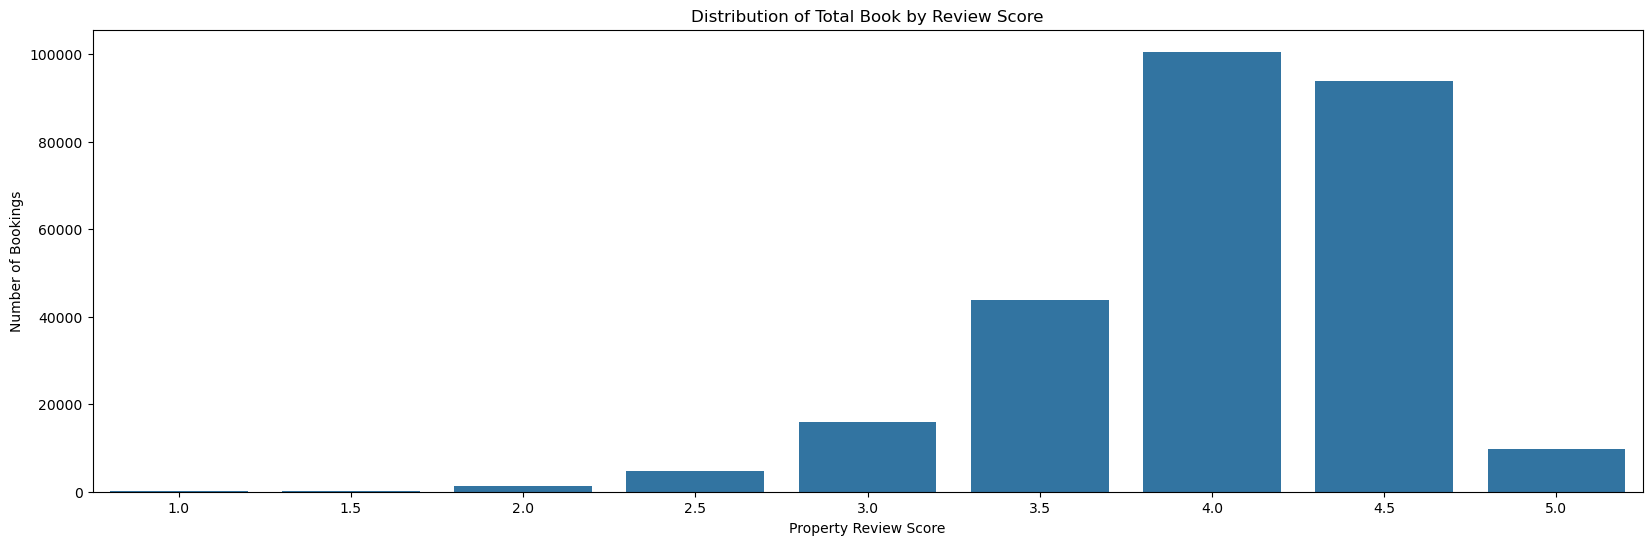

In [755]:
plt.figure(figsize=(20, 6))
sns.barplot(data=df_prop_score, x='prop_review_score', y='total_hotel_booked')
plt.title('Distribution of Total Book by Review Score')
plt.xlabel('Property Review Score')
plt.ylabel('Number of Bookings')
plt.show()

From this we can get insight that prop_review_score does affect the booking, prop with score 4 and 4.5 get mostly the book.

Further :

we can cross exam again with how many hotel with each prop_review_score, if the 4 and 5 got many data it it obviously. But right now we see that higher rating create more booking.

In [69]:
# import library Anova - one Way
from scipy.stats import kruskal

# Fill Ho and Ha First
Ho = "The median booking_bool of all prop_review_score groups are the SAME"  # Ho typically means no difference, no effect, no relationship
Ha = "At least one prop_review_score group has a DIFFERENT booking_bool rank."


# Put Which function to use here
stat, pvaluek = kruskal(
    df_part_1[df_part_1['prop_review_score']==1]['booking_bool'],
    df_part_1[df_part_1['prop_review_score']==1.5]['booking_bool'],
    df_part_1[df_part_1['prop_review_score']==2]['booking_bool'],
    df_part_1[df_part_1['prop_review_score']==2.5]['booking_bool'],
    df_part_1[df_part_1['prop_review_score']==3]['booking_bool'],
    df_part_1[df_part_1['prop_review_score']==3.5]['booking_bool'],
    df_part_1[df_part_1['prop_review_score']==4]['booking_bool'],
    df_part_1[df_part_1['prop_review_score']==4.5]['booking_bool'],
    df_part_1[df_part_1['prop_review_score']==5]['booking_bool'],
)

pvaluek


# alternative = 'two-sided' --> karena yang dibandingkan berupa two tail (2 arah)

# Conclusion
if pvaluek >= 0.05:
    print(f'''
    p-value = {pvaluek}. p-value >= 0.05. Fail to reject Ho.
    We do NOT have sufficient evidence to support {Ha}.
    (The average ranks across all groups are not significantly different.)
    ''')
else:
    print(f'''
    p-value = {pvaluek}. p-value < 0.05. Reject Ho.
    We have sufficient evidence to support {Ha}.
    (There is a significant difference in the average ranks among the groups.)
    ''')



    p-value = 0.0. p-value < 0.05. Reject Ho.
    We have sufficient evidence to support At least one prop_review_score group has a DIFFERENT booking_bool rank..
    (There is a significant difference in the average ranks among the groups.)
    


Numerical vs categorical



In [70]:
from scipy.stats import shapiro

# Fill Ho and Ha First
Ho = "We assume Data is Normally Distributed" # Ho typically no difference, no effect, no relationship
Ha = "We assume Data is NOT Normally Distributed"

# Put Which function to use here
statistic,pvaluesw = shapiro(df_part_1[df_part_1['prop_review_score']>0]['prop_review_score'])

#Conclusion
if pvaluesw >= 0.05:
    print(f'''
    pvalue = {pvaluesw}. pvalue >= 0.05. Fail to reject Ho. 
    {Ho}
    ''')
else:
    print(f'''
    pvalue = {pvaluesw}. pvalue < 0.05. Reject Ho. 
    {Ha}''')


    pvalue = 1.380688370257936e-169. pvalue < 0.05. Reject Ho. 
    We assume Data is NOT Normally Distributed


In [71]:
# import library untuk 2 sample t-Test
from scipy.stats import mannwhitneyu

# Fill Ho and Ha First
Ho = "Median prop_review_score 'Yes' = Median prop_review_score 'No'" # Ho typically no difference, no effect, no relationship
Ha = "Median prop_review_score 'Yes' ≠ Median prop_review_score 'No'"

# Put Which function to use here
stat, pvaluemw = mannwhitneyu(
    df_part_1[df_part_1['prop_review_score']>0][df_part_1[df_part_1['prop_review_score']>0]['booking_bool']==1]['prop_review_score'], 
    df_part_1[df_part_1['prop_review_score']>0][df_part_1[df_part_1['prop_review_score']>0]['booking_bool']==0]['prop_review_score']   
)

pvaluemw

# alternative = 'two-sided' --> karena yang dibandingkan berupa two tail (2 arah)

# Conclusion
if pvaluemw >= 0.05:
    print(f'''
    p-value = {pvaluemw}. p-value >= 0.05. Fail to reject Ho. 
    We do NOT have sufficient evidence to support that {Ha}.
    (There is no significant difference between the two groups.)
    ''')
else:
    print(f'''
    p-value = {pvaluemw}. p-value < 0.05. Reject Ho. 
    We have sufficient evidence to support that {Ha}.
    (There is a significant difference between the two groups.)
    ''')



    p-value = 4.0058151910298233e-271. p-value < 0.05. Reject Ho. 
    We have sufficient evidence to support that Median prop_review_score 'Yes' ≠ Median prop_review_score 'No'.
    (There is a significant difference between the two groups.)
    


<Axes: xlabel='booking_bool', ylabel='prop_review_score'>

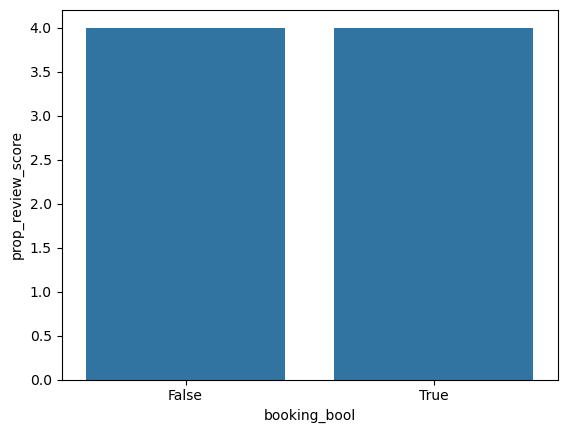

In [72]:
sns.barplot(df_part_1[df_part_1['prop_review_score']>0].groupby('booking_bool')['prop_review_score'].median())

Insight:

The prop_review_score does significantly affect the booking_bool. While the median review scores for both groups (booked vs. not booked) appear similar, the distribution of the scores is different. This discrepancy was detected using the Mann-Whitney U test, which revealed a significant difference between the two groups.

This suggests that users do consider the prop_review_score when making booking decisions, even though the central tendency (median) may not show an immediate difference.

### 1.d. Does prop_starrating corelate with booking_bool

In [73]:
df_part_1['prop_starrating'].unique()

array([3, 4, 2, 5, 0, 1])

In [74]:
# Total hotel with star 5 and 2 and 1 smaller that 4 and 3
df_prop_starrating_count = df_part_1[['prop_id','prop_starrating']].drop_duplicates()['prop_starrating'].value_counts().reset_index()
df_prop_starrating_count

prop_starrating  count
0                3  54432
1                4  34035
2                2  21369
3                0  17943
4                5   7635
5                1   1466

In [75]:
df_prop_starrating = df_part_1[df_part_1['prop_starrating']>0].groupby('prop_starrating')['booking_bool'].sum().reset_index().rename(columns={'booking_bool':'total_hotel_booked'})
df_prop_starrating

prop_starrating  total_hotel_booked
0                1                 439
1                2               38880
2                3              109018
3                4              101663
4                5               20932

In [76]:
# Merge both DataFrames on 'prop_starrating'
merged = df_prop_starrating_count.merge(df_prop_starrating, on='prop_starrating', suffixes=('_booked', '_total'))

# Calculate booking rate
merged['booking_rate'] = merged['total_hotel_booked'] / merged['count']
merged


prop_starrating  count  total_hotel_booked  booking_rate
0                3  54432              109018      2.002829
1                4  34035              101663      2.987013
2                2  21369               38880      1.819458
3                5   7635               20932      2.741585
4                1   1466                 439      0.299454

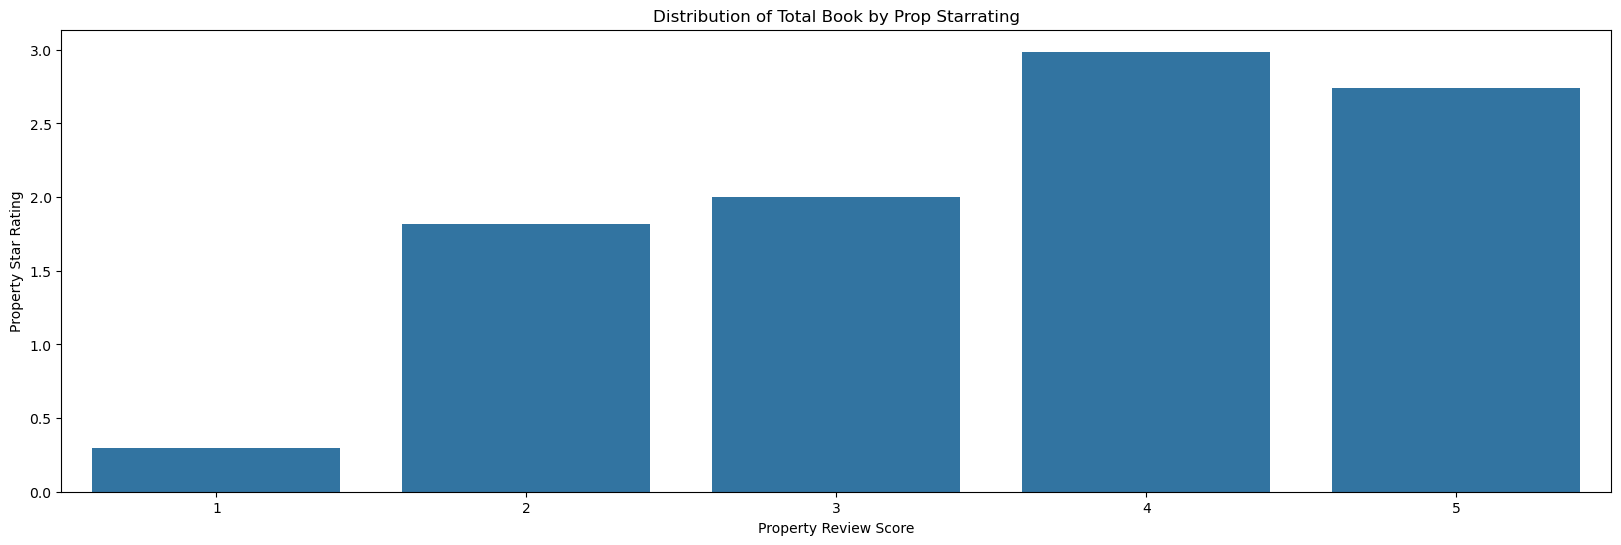

In [77]:
plt.figure(figsize=(20, 6))
sns.barplot(data=merged, x='prop_starrating', y='booking_rate')
plt.title('Distribution of Total Book by Prop Starrating')
plt.xlabel('Property Review Score')
plt.ylabel('Property Star Rating')
plt.show()

**Key Insights:**

4-star hotels dominate in both volume of bookings and booking rate — people tend to prefer this "comfort-for-value" segment.

5-star hotels, despite being fewer, have a high booking rate (2.74x) — indicating strong demand for premium stays among a smaller pool.

1-star hotels have both low availability and very low demand (booking rate of 0.3x), suggesting users avoid low-end properties.

3-star hotels are the most common and also highly booked — a good balance point between supply and demand.

2-star hotels are less booked compared to their availability — possibly considered too basic compared to 3-stars.

**Recommendation:**

Focus on promoting 4-star and 5-star hotels, especially in locations where they are underrepresented.

Reevaluate 1-star properties — either improve their offerings or consider phasing out in favor of better-rated inventory.

Explore user preferences in terms of pricing vs. rating — this can further optimize visibility and ranking logic.

In [78]:
# import library Anova - one Way
from scipy.stats import kruskal

# Fill Ho and Ha First
Ho = "The median booking_bool of all prop_starrating groups are the SAME"  # Ho typically means no difference, no effect, no relationship
Ha = "At least one prop_starrating group has a DIFFERENT booking_bool"


# Put Which function to use here
stat, pvaluek = kruskal(
    df_part_1[df_part_1['prop_starrating']==1]['booking_bool'],
    df_part_1[df_part_1['prop_starrating']==1.5]['booking_bool'],
    df_part_1[df_part_1['prop_starrating']==2]['booking_bool'],
    df_part_1[df_part_1['prop_starrating']==2.5]['booking_bool'],
    df_part_1[df_part_1['prop_starrating']==3]['booking_bool'],
    df_part_1[df_part_1['prop_starrating']==3.5]['booking_bool'],
    df_part_1[df_part_1['prop_starrating']==4]['booking_bool'],
    df_part_1[df_part_1['prop_starrating']==4.5]['booking_bool'],
    df_part_1[df_part_1['prop_starrating']==5]['booking_bool'],
)

pvaluek


# alternative = 'two-sided' --> karena yang dibandingkan berupa two tail (2 arah)

# Conclusion
if pvaluek >= 0.05:
    print(f'''
    p-value = {pvaluek}. p-value >= 0.05. Fail to reject Ho.
    We do NOT have sufficient evidence to support {Ha}.
    (The average ranks across all groups are not significantly different.)
    ''')
else:
    print(f'''
    p-value = {pvaluek}. p-value < 0.05. Reject Ho.
    We have sufficient evidence to support {Ha}.
    (There is a significant difference in the average ranks among the groups.)
    ''')



    p-value = nan. p-value < 0.05. Reject Ho.
    We have sufficient evidence to support At least one prop_starrating group has a DIFFERENT booking_bool.
    (There is a significant difference in the average ranks among the groups.)
    


In [79]:
# import library untuk 2 sample t-Test
from scipy.stats import mannwhitneyu

# Fill Ho and Ha First
Ho = "Median prop_starrating 'Yes' = Median prop_starrating 'No'" # Ho typically no difference, no effect, no relationship
Ha = "Median prop_starrating 'Yes' ≠ Median prop_starrating 'No'"

# Put Which function to use here
stat, pvaluemw = mannwhitneyu(
    df_part_1[df_part_1['prop_starrating']>0][df_part_1[df_part_1['prop_starrating']>0]['booking_bool']==1]['prop_starrating'], 
    df_part_1[df_part_1['prop_starrating']>0][df_part_1[df_part_1['prop_starrating']>0]['booking_bool']==0]['prop_starrating']   
)

pvaluemw

# alternative = 'two-sided' --> karena yang dibandingkan berupa two tail (2 arah)

# Conclusion
if pvaluemw >= 0.05:
    print(f'''
    p-value = {pvaluemw}. p-value >= 0.05. Fail to reject Ho. 
    We do NOT have sufficient evidence to support that {Ha}.
    (There is no significant difference between the two groups.)
    ''')
else:
    print(f'''
    p-value = {pvaluemw}. p-value < 0.05. Reject Ho. 
    We have sufficient evidence to support that {Ha}.
    (There is a significant difference between the two groups.)
    ''')



    p-value = 0.0. p-value < 0.05. Reject Ho. 
    We have sufficient evidence to support that Median prop_starrating 'Yes' ≠ Median prop_starrating 'No'.
    (There is a significant difference between the two groups.)
    


### 1.e. Does prop_brand_bool corelate with booking_bool

In [80]:
df_part_1[['prop_id','prop_brand_bool','booking_bool']].drop_duplicates()

prop_id  prop_brand_bool  booking_bool
0           Property_893             True         False
1         Property_10404             True         False
2         Property_21315             True         False
3         Property_27348             True         False
4         Property_29604             True         False
...                  ...              ...           ...
9915604  Property_135769            False         False
9915935   Property_18902            False         False
9916363   Property_14733            False          True
9917066   Property_12504            False          True
9917281  Property_102926            False         False

[194132 rows x 3 columns]

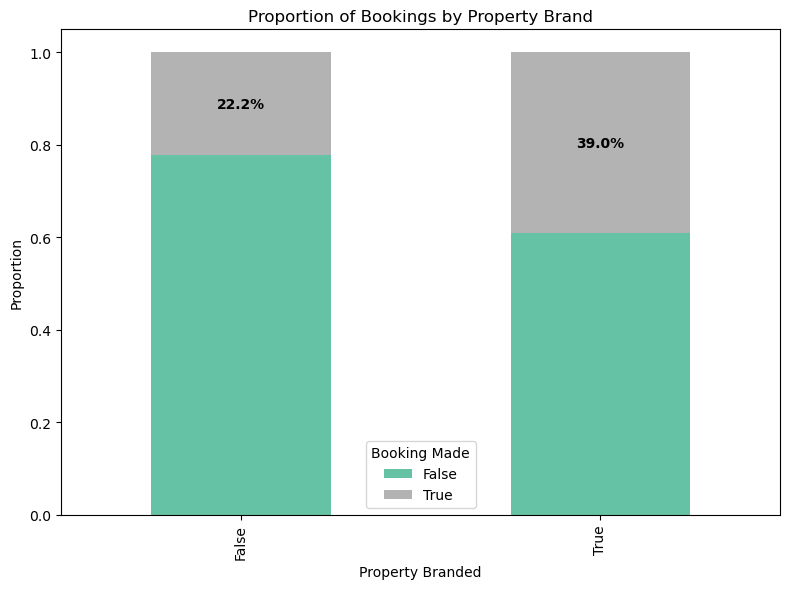

In [81]:
import matplotlib.pyplot as plt
df_c = df_part_1[['prop_id','prop_brand_bool','booking_bool']].drop_duplicates().groupby('prop_brand_bool')['booking_bool'].value_counts().unstack().fillna(0)

# Normalize the data
df_c_norm = df_c.div(df_c.sum(axis=1), axis=0)

# Plot the normalized stacked bar chart
ax = df_c_norm.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='Set2')

# Add annotations for booking_bool = True
for i, (index, row) in enumerate(df_c_norm.iterrows()):
    # Only annotate the 'True' portion (second bar segment in the stack)
    booking_true_pct = row[True] * 100
    ax.text(
        i,                          # x position
        row[False] + row[True] / 2, # y position in the middle of the 'True' bar
        f'{booking_true_pct:.1f}%', # text
        ha='center', va='center', fontsize=10, fontweight='bold', color='black'
    )

plt.title('Proportion of Bookings by Property Brand')
plt.xlabel('Property Branded')
plt.ylabel('Proportion')
plt.legend(title='Booking Made')
plt.tight_layout()
plt.show()


In [82]:
df_c

booking_bool     False  True 
prop_brand_bool              
False            83518  23763
True             52972  33879

In [83]:
# Import library
from scipy.stats import chi2_contingency

# Define hypotheses
Ho = "booking_bool and prop_brand_bool are not associated (proportions are equal)"  # Null Hypothesis: No relationship
Ha = "booking_bool and prop_brand_bool are associated (proportions are different)"  # Alternative Hypothesis

# Check contingency table and perform the test
stats, pvaluec, dof, expected = chi2_contingency(df_c)

# Print p-value
print("p-value:", pvaluec)

# Conclusion
if pvaluec >= 0.05:
    print(f'''
    p-value = {pvaluec}. Since p-value >= 0.05, we fail to reject Ho.
    We do NOT have sufficient evidence to say that {Ha}
    (The proportions are not significantly different)
    ''')
else:
    print(f'''
    p-value = {pvaluec}. Since p-value < 0.05, we reject Ho.
    We have sufficient evidence to say that {Ha}
    (The proportions are significantly different)
    ''')


p-value: 0.0

    p-value = 0.0. Since p-value < 0.05, we reject Ho.
    We have sufficient evidence to say that booking_bool and prop_brand_bool are associated (proportions are different)
    (The proportions are significantly different)
    


Insight

User tend to book hotel with prop brand true, 39% from prop brand get booked 

### 1.f. Does orig_destination_distance corelate with booking_bool

We will find out if the longer distance will affect the booking

In [628]:
# import library untuk 2 sample t-Test
from scipy.stats import mannwhitneyu

# Fill Ho and Ha First
Ho = "Median orig_destination_distance 'Yes' = Median orig_destination_distance 'No'" # Ho typically no difference, no effect, no relationship
Ha = "Median orig_destination_distance 'Yes' ≠ Median orig_destination_distance 'No'"

# Put Which function to use here
stat, pvaluemw = mannwhitneyu(
    df_part_1[df_part_1['booking_bool']==1]['orig_destination_distance'], 
    df_part_1[df_part_1['booking_bool']==0]['orig_destination_distance']   
)

pvaluemw

# alternative = 'two-sided' --> karena yang dibandingkan berupa two tail (2 arah)

# Conclusion
if pvaluemw >= 0.05:
    print(f'''
    p-value = {pvaluemw}. p-value >= 0.05. Fail to reject Ho. 
    We do NOT have sufficient evidence to support that {Ha}.
    (There is no significant difference between the two groups.)
    ''')
else:
    print(f'''
    p-value = {pvaluemw}. p-value < 0.05. Reject Ho. 
    We have sufficient evidence to support that {Ha}.
    (There is a significant difference between the two groups.)
    ''')



    p-value = 1.6276529901853637e-34. p-value < 0.05. Reject Ho. 
    We have sufficient evidence to support that Median orig_destination_distance 'Yes' ≠ Median orig_destination_distance 'No'.
    (There is a significant difference between the two groups.)
    


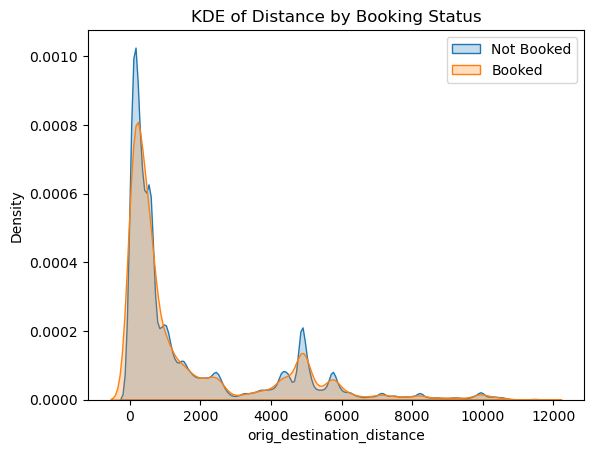

In [631]:
sns.kdeplot(df_part_1[df_part_1['booking_bool'] == 0]['orig_destination_distance'], label='Not Booked', shade=True)
sns.kdeplot(df_part_1[df_part_1['booking_bool'] == 1]['orig_destination_distance'], label='Booked', shade=True)
plt.legend()
plt.title('KDE of Distance by Booking Status')
plt.show()


Insight :

Users selecting destinations farther from their origin tend to complete bookings more often. This suggests that long-distance travelers may have firmer travel plans and are more committed to their trips. In contrast, users searching for nearby destinations appear less likely to book, possibly indicating more casual browsing or flexible plans.

As we can see in around 100km, the order not booked is way higher than booked 20% more. And also that happen in around 5.000 km, not booked rise above the booked.

### 1.g. Does weekend increase booking_bool

we will comparing category with category

In [635]:
df_part_1.head()

srch_id   date_time site_id visitor_location_country_id prop_country_id  \
0       1  2013-04-04      12                 Country_187     Country_219   
1       1  2013-04-04      12                 Country_187     Country_219   
2       1  2013-04-04      12                 Country_187     Country_219   
3       1  2013-04-04      12                 Country_187     Country_219   
4       1  2013-04-04      12                 Country_187     Country_219   

          prop_id  prop_starrating  prop_review_score  prop_brand_bool  \
0    Property_893                3                3.5             True   
1  Property_10404                4                4.0             True   
2  Property_21315                3                4.5             True   
3  Property_27348                2                4.0             True   
4  Property_29604                4                3.5             True   

   prop_location_score1  prop_location_score2  prop_log_historical_price  \
0                  2.83                0.0438                       4.95   
1                  2.20                0.0149                       5.03   
2                  2.20                0.0245                       4.92   
3                  2.83                0.0125                       4.39   
4                  2.64                0.1241                       4.93   

  position  price_usd  promotion_flag srch_destination_id  \
0       27     104.77           False               23246   
1       26     170.74           False               23246   
2       21     179.80           False               23246   
3       34     602.77           False               23246   
4        4     143.58           False               23246   

   srch_length_of_stay  srch_booking_window  srch_adults_count  \
0                    1                    0                  4   
1                    1                    0                  4   
2                    1                    0                  4   
3                    1                    0                  4   
4                    1                    0                  4   

   srch_children_count  srch_room_count  srch_saturday_night_bool  \
0                    0                1                      True   
1                    0                1                      True   
2                    0                1                      True   
3                    0                1                      True   
4                    0                1                      True   

   orig_destination_distance  random_bool  click_bool  booking_bool  \
0                4864.702448         True       False         False   
1                4864.702448         True       False         False   
2                4864.702448         True       False         False   
3                4864.702448         True       False         False   
4                4864.702448         True       False         False   

  time_of_day  month       day  search_order  
0     Morning  April  Thursday             1  
1     Morning  April  Thursday             2  
2     Morning  April  Thursday             3  
3     Morning  April  Thursday             4  
4     Morning  April  Thursday             5

In [655]:
df_c2 = df_part_1[['srch_saturday_night_bool','booking_bool']]
df_c2 = pd.crosstab(df_part_1['srch_saturday_night_bool'], df_part_1['booking_bool'])
df_c2

booking_bool                False   True 
srch_saturday_night_bool                 
False                     4820351  133686
True                      4817366  142828

In [656]:
# Import library
from scipy.stats import chi2_contingency

# Define hypotheses
Ho = "booking_bool and srch_saturday_night_bool are not associated (proportions are equal)"  # Null Hypothesis: No relationship
Ha = "booking_bool and srch_saturday_night_bool are associated (proportions are different)"  # Alternative Hypothesis

# Check contingency table and perform the test
stats, pvaluec, dof, expected = chi2_contingency(df_c2)

# Print p-value
print("p-value:", pvaluec)

# Conclusion
if pvaluec >= 0.05:
    print(f'''
    p-value = {pvaluec}. Since p-value >= 0.05, we fail to reject Ho.
    We do NOT have sufficient evidence to say that {Ha}
    (The proportions are not significantly different)
    ''')
else:
    print(f'''
    p-value = {pvaluec}. Since p-value < 0.05, we reject Ho.
    We have sufficient evidence to say that {Ha}
    (The proportions are significantly different)
    ''')


p-value: 4.719166157133447e-67

    p-value = 4.719166157133447e-67. Since p-value < 0.05, we reject Ho.
    We have sufficient evidence to say that booking_bool and srch_saturday_night_bool are associated (proportions are different)
    (The proportions are significantly different)
    


Insight :

Based on statistic test we get that srch_saturday_night_bool is significantly different from booking_bool true and false. The True is a little higher than the false srch_saturday_night_bool, we can assume that people like to book a hotel on saturday_night.

Our recommendation is give a bundling that if they order throught Friday Saturday and Sunday they will get more promo, and we get more revenue too.

### 1.h. Family Size does it affect the booking_bool

a. srch_room_count

we will see if the higher room count the more booking true

In [645]:
df_part_1.head()

srch_id   date_time site_id visitor_location_country_id prop_country_id  \
0       1  2013-04-04      12                 Country_187     Country_219   
1       1  2013-04-04      12                 Country_187     Country_219   
2       1  2013-04-04      12                 Country_187     Country_219   
3       1  2013-04-04      12                 Country_187     Country_219   
4       1  2013-04-04      12                 Country_187     Country_219   

          prop_id  prop_starrating  prop_review_score  prop_brand_bool  \
0    Property_893                3                3.5             True   
1  Property_10404                4                4.0             True   
2  Property_21315                3                4.5             True   
3  Property_27348                2                4.0             True   
4  Property_29604                4                3.5             True   

   prop_location_score1  prop_location_score2  prop_log_historical_price  \
0                  2.83                0.0438                       4.95   
1                  2.20                0.0149                       5.03   
2                  2.20                0.0245                       4.92   
3                  2.83                0.0125                       4.39   
4                  2.64                0.1241                       4.93   

  position  price_usd  promotion_flag srch_destination_id  \
0       27     104.77           False               23246   
1       26     170.74           False               23246   
2       21     179.80           False               23246   
3       34     602.77           False               23246   
4        4     143.58           False               23246   

   srch_length_of_stay  srch_booking_window  srch_adults_count  \
0                    1                    0                  4   
1                    1                    0                  4   
2                    1                    0                  4   
3                    1                    0                  4   
4                    1                    0                  4   

   srch_children_count  srch_room_count  srch_saturday_night_bool  \
0                    0                1                      True   
1                    0                1                      True   
2                    0                1                      True   
3                    0                1                      True   
4                    0                1                      True   

   orig_destination_distance  random_bool  click_bool  booking_bool  \
0                4864.702448         True       False         False   
1                4864.702448         True       False         False   
2                4864.702448         True       False         False   
3                4864.702448         True       False         False   
4                4864.702448         True       False         False   

  time_of_day  month       day  search_order  
0     Morning  April  Thursday             1  
1     Morning  April  Thursday             2  
2     Morning  April  Thursday             3  
3     Morning  April  Thursday             4  
4     Morning  April  Thursday             5

In [662]:
df_srch_room_count = df_part_1.groupby('srch_room_count')['booking_bool'].value_counts().unstack()
df_srch_room_count[True]/(df_srch_room_count[False]+df_srch_room_count[True])*100
# df_srch_room_count
df_c_norm = df_srch_room_count.div(df_srch_room_count.sum(axis=1), axis=0)
df_c_norm

booking_bool        False     True 
srch_room_count                    
1                0.972681  0.027319
2                0.965506  0.034494
3                0.969874  0.030126
4                0.969539  0.030461
5                0.967341  0.032659
6                0.968411  0.031589
7                0.970654  0.029346
8                0.974141  0.025859

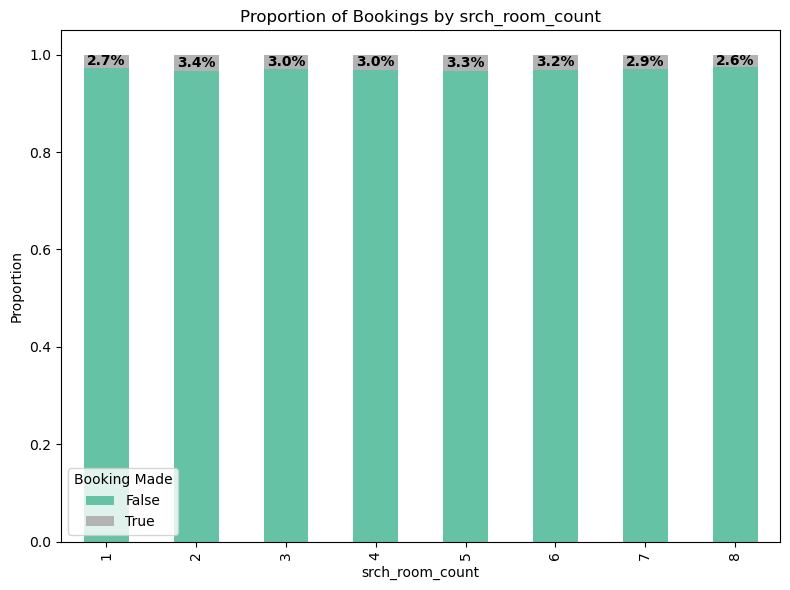

In [665]:
# Plot the normalized stacked bar chart
ax = df_c_norm.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='Set2')

# Add annotations for booking_bool = True
for i, (index, row) in enumerate(df_c_norm.iterrows()):
    # Only annotate the 'True' portion (second bar segment in the stack)
    booking_true_pct = row[True] * 100
    ax.text(
        i,                          # x position
        row[False] + row[True] / 2, # y position in the middle of the 'True' bar
        f'{booking_true_pct:.1f}%', # text
        ha='center', va='center', fontsize=10, fontweight='bold', color='black'
    )

plt.title('Proportion of Bookings by srch_room_count')
plt.xlabel('srch_room_count')
plt.ylabel('Proportion')
plt.legend(title='Booking Made')
plt.tight_layout()
plt.show()

Insight :

If we only see the figure we can see not much different for each number of srch_room_count, the std only 0.8%. The highest is 3.4% in 2 room and lowest is 2.6% in 8 room. So we can assume that higher count of room tend to become book False.

Our recommendation is give a promotion more to the hotel that got many room, so the user will be fixed to book them. Such as colab with the hotel to give special discount the more room they order.

Next we will try to check using statistic.

In [666]:
# Import library
from scipy.stats import chi2_contingency

# Define hypotheses
Ho = "booking_bool and srch_saturday_night_bool are not associated (proportions are equal)"  # Null Hypothesis: No relationship
Ha = "booking_bool and srch_saturday_night_bool are associated (proportions are different)"  # Alternative Hypothesis

# Check contingency table and perform the test
stats, pvaluec, dof, expected = chi2_contingency(df_srch_room_count)

# Print p-value
print("p-value:", pvaluec)

# Conclusion
if pvaluec >= 0.05:
    print(f'''
    p-value = {pvaluec}. Since p-value >= 0.05, we fail to reject Ho.
    We do NOT have sufficient evidence to say that {Ha}
    (The proportions are not significantly different)
    ''')
else:
    print(f'''
    p-value = {pvaluec}. Since p-value < 0.05, we reject Ho.
    We have sufficient evidence to say that {Ha}
    (The proportions are significantly different)
    ''')


p-value: 2.346617768386794e-281

    p-value = 2.346617768386794e-281. Since p-value < 0.05, we reject Ho.
    We have sufficient evidence to say that booking_bool and srch_saturday_night_bool are associated (proportions are different)
    (The proportions are significantly different)
    


b. srch_adults_count

we will see if the higher srch_adults_count the more booking true

In [667]:
df_srch_adults_count = df_part_1.groupby('srch_adults_count')['booking_bool'].value_counts().unstack()
df_srch_adults_count[True]/(df_srch_adults_count[False]+df_srch_adults_count[True])*100
# df_srch_adults_count
df_c_norm = df_srch_adults_count.div(df_srch_adults_count.sum(axis=1), axis=0)
df_c_norm

booking_bool          False     True 
srch_adults_count                    
1                  0.968361  0.031639
2                  0.973519  0.026481
3                  0.971276  0.028724
4                  0.972052  0.027948
5                  0.971827  0.028173
6                  0.971743  0.028257
7                  0.970391  0.029609
8                  0.972255  0.027745
9                  0.973588  0.026412

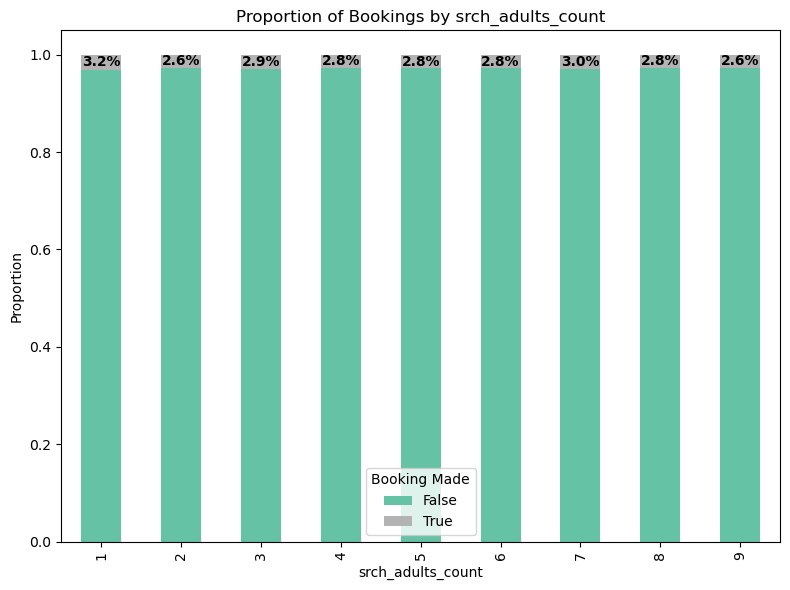

In [670]:
# Plot the normalized stacked bar chart
ax = df_c_norm.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='Set2')

# Add annotations for booking_bool = True
for i, (index, row) in enumerate(df_c_norm.iterrows()):
    # Only annotate the 'True' portion (second bar segment in the stack)
    booking_true_pct = row[True] * 100
    ax.text(
        i,                          # x position
        row[False] + row[True] / 2, # y position in the middle of the 'True' bar
        f'{booking_true_pct:.1f}%', # text
        ha='center', va='center', fontsize=10, fontweight='bold', color='black'
    )

plt.title('Proportion of Bookings by srch_adults_count')
plt.xlabel('srch_adults_count')
plt.ylabel('Proportion')
plt.legend(title='Booking Made')
plt.tight_layout()
plt.show()

In [671]:
# Import library
from scipy.stats import chi2_contingency

# Define hypotheses
Ho = "booking_bool and srch_adults_count are not associated (proportions are equal)"  # Null Hypothesis: No relationship
Ha = "booking_bool and srch_adults_count are associated (proportions are different)"  # Alternative Hypothesis

# Check contingency table and perform the test
stats, pvaluec, dof, expected = chi2_contingency(df_srch_room_count)

# Print p-value
print("p-value:", pvaluec)

# Conclusion
if pvaluec >= 0.05:
    print(f'''
    p-value = {pvaluec}. Since p-value >= 0.05, we fail to reject Ho.
    We do NOT have sufficient evidence to say that {Ha}
    (The proportions are not significantly different)
    ''')
else:
    print(f'''
    p-value = {pvaluec}. Since p-value < 0.05, we reject Ho.
    We have sufficient evidence to say that {Ha}
    (The proportions are significantly different)
    ''')


p-value: 2.346617768386794e-281

    p-value = 2.346617768386794e-281. Since p-value < 0.05, we reject Ho.
    We have sufficient evidence to say that booking_bool and srch_adults_count are associated (proportions are different)
    (The proportions are significantly different)
    


Insight :

in Room count, the highest will book is 1 adults count, and interestingly does to 8 adults.

Our insight is give a promotion to single and also big group.

### 1.i. how far ahead do users who book plan that will lead to booking_bool true

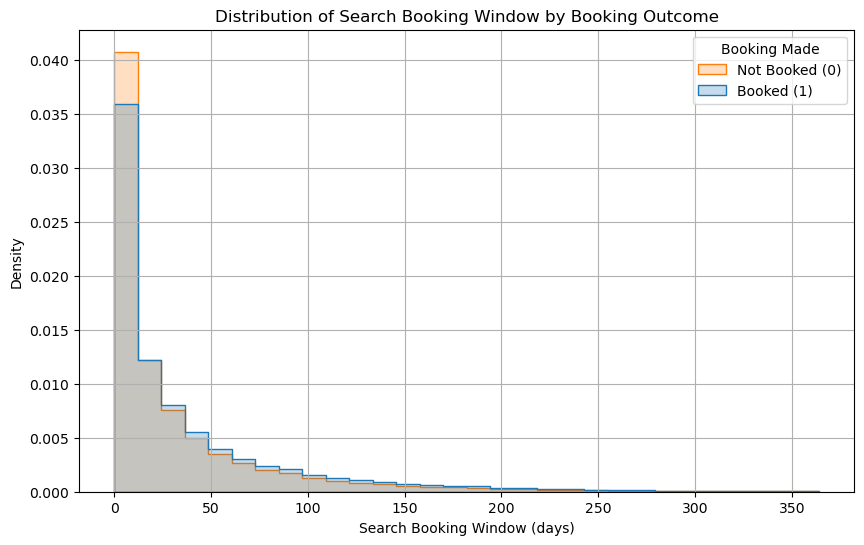

In [676]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_part_1, x='srch_booking_window', hue='booking_bool', bins=30, kde=False, element='step', stat='density', common_norm=False)

plt.title('Distribution of Search Booking Window by Booking Outcome')
plt.xlabel('Search Booking Window (days)')
plt.ylabel('Density')
plt.legend(title='Booking Made', labels=['Not Booked (0)', 'Booked (1)'])
plt.grid(True)
plt.show()


Insight :

Users searching with short booking windows are less likely to make a booking, while those planning further ahead (longer booking windows) show a higher likelihood of completing a booking.

### 1.j. how srch_length_of_stay correlate with lead to booking_bool true

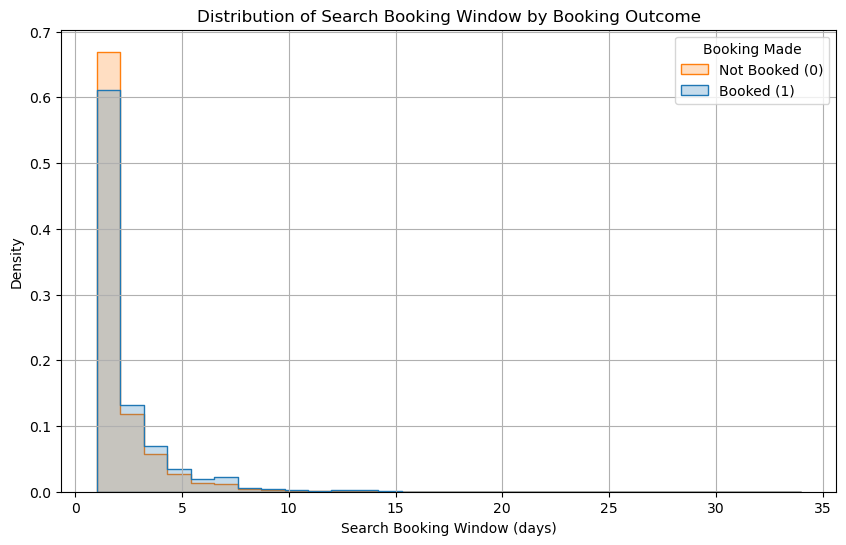

In [677]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_part_1, x='srch_length_of_stay', hue='booking_bool', bins=30, kde=False, element='step', stat='density', common_norm=False)

plt.title('Distribution of Search Booking Window by Booking Outcome')
plt.xlabel('Search Booking Window (days)')
plt.ylabel('Density')
plt.legend(title='Booking Made', labels=['Not Booked (0)', 'Booked (1)'])
plt.grid(True)
plt.show()


In [679]:
df_srch_adults_count = df_part_1.groupby('srch_length_of_stay')['booking_bool'].value_counts().unstack().fillna(0)
df_srch_adults_count[True]/(df_srch_adults_count[False]+df_srch_adults_count[True])*100
# df_srch_adults_count
df_c_norm = df_srch_adults_count.div(df_srch_adults_count.sum(axis=1), axis=0)
df_c_norm

booking_bool            False     True 
srch_length_of_stay                    
1                    0.968325  0.031675
2                    0.971634  0.028366
3                    0.975107  0.024893
4                    0.976839  0.023161
5                    0.977992  0.022008
6                    0.979909  0.020091
7                    0.984839  0.015161
8                    0.982610  0.017390
9                    0.982094  0.017906
10                   0.983717  0.016283
11                   0.983145  0.016855
12                   0.982378  0.017622
13                   0.983610  0.016390
14                   0.990506  0.009494
15                   0.985698  0.014302
16                   0.982547  0.017453
17                   0.978752  0.021248
18                   0.984321  0.015679
19                   0.975684  0.024316
20                   0.982346  0.017654
21                   0.988232  0.011768
22                   0.988945  0.011055
23                   0.980969  0.019031
24                   0.983752  0.016248
25                   0.984634  0.015366
26                   0.994403  0.005597
27                   0.985955  0.014045
28                   0.984751  0.015249
29                   0.987654  0.012346
30                   0.973684  0.026316
31                   1.000000  0.000000
32                   0.967742  0.032258
33                   0.984127  0.015873
34                   1.000000  0.000000

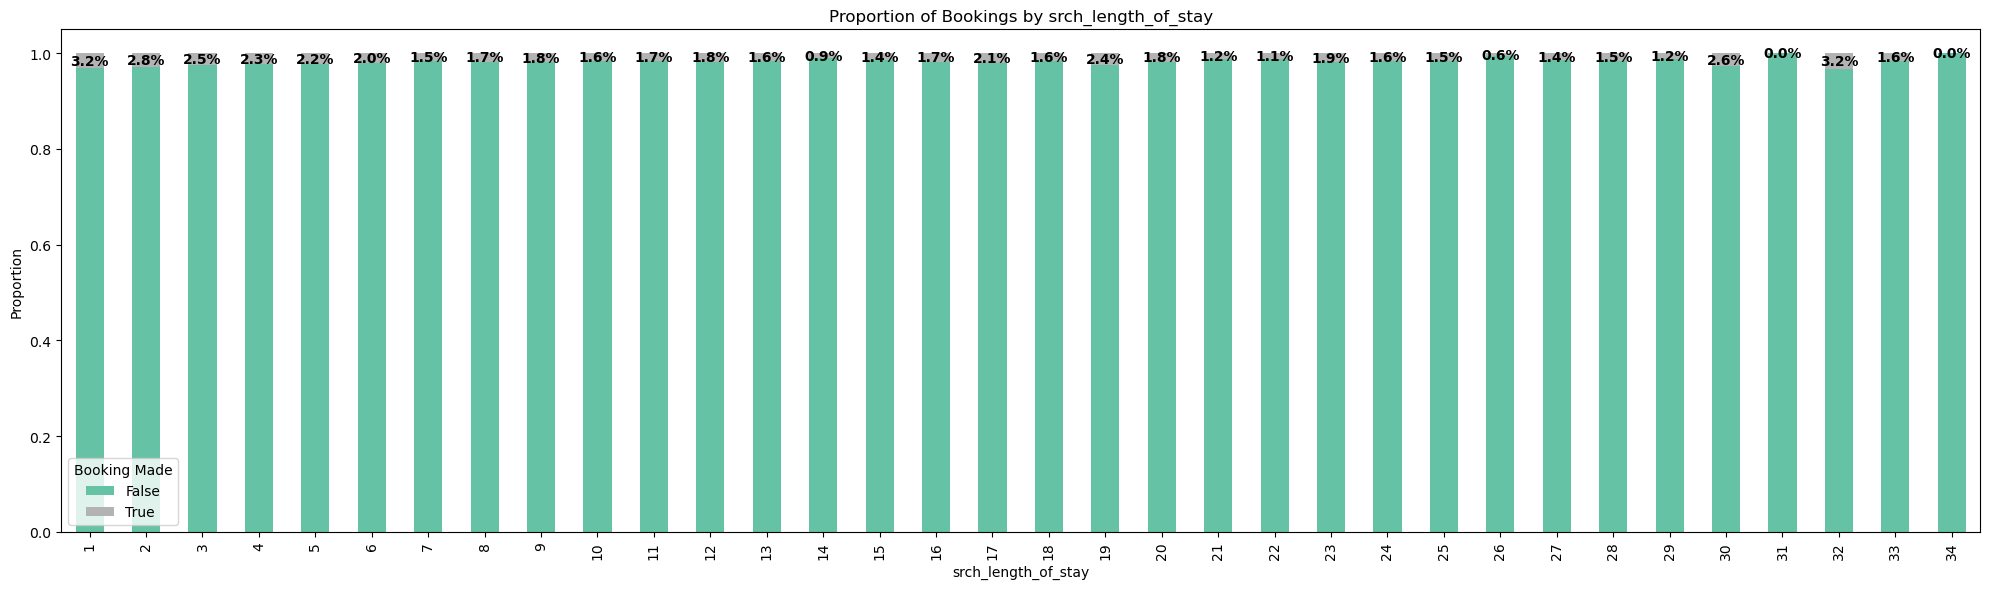

In [685]:
# Plot the normalized stacked bar chart
ax = df_c_norm.plot(kind='bar', stacked=True, figsize=(20, 6), colormap='Set2')
# Add annotations for booking_bool = True
for i, (index, row) in enumerate(df_c_norm.iterrows()):
    # Only annotate the 'True' portion (second bar segment in the stack)
    booking_true_pct = row[True] * 100
    ax.text(
        i,                          # x position
        row[False] + row[True] / 2, # y position in the middle of the 'True' bar
        f'{booking_true_pct:.1f}%', # text
        ha='center', va='center', fontsize=10, fontweight='bold', color='black'
    )

plt.title('Proportion of Bookings by srch_length_of_stay')
plt.xlabel('srch_length_of_stay')
plt.ylabel('Proportion')
plt.legend(title='Booking Made')
plt.tight_layout()
plt.show()

Insight :

We got unique insight, the highest percentage is 3.2% in 1 day and also in 32. It is unique there are person that book in long term. We suggest that we can identify which user that like to book long and short. We can personalize the promo for them to use.

In [686]:
# Import library
from scipy.stats import chi2_contingency

# Define hypotheses
Ho = "booking_bool and srch_length_of_stay are not associated (proportions are equal)"  # Null Hypothesis: No relationship
Ha = "booking_bool and srch_length_of_stay are associated (proportions are different)"  # Alternative Hypothesis

# Check contingency table and perform the test
stats, pvaluec, dof, expected = chi2_contingency(df_srch_room_count)

# Print p-value
print("p-value:", pvaluec)

# Conclusion
if pvaluec >= 0.05:
    print(f'''
    p-value = {pvaluec}. Since p-value >= 0.05, we fail to reject Ho.
    We do NOT have sufficient evidence to say that {Ha}
    (The proportions are not significantly different)
    ''')
else:
    print(f'''
    p-value = {pvaluec}. Since p-value < 0.05, we reject Ho.
    We have sufficient evidence to say that {Ha}
    (The proportions are significantly different)
    ''')


p-value: 2.346617768386794e-281

    p-value = 2.346617768386794e-281. Since p-value < 0.05, we reject Ho.
    We have sufficient evidence to say that booking_bool and srch_length_of_stay are associated (proportions are different)
    (The proportions are significantly different)
    


## **🔹 Part 2. User Behavior**

In this part we will talk about all user behavior in booking a hotel, how they react when the want to book

### 2.a. How Many Time people search and finaly booked in one session

In [694]:
df_part_2 = df.copy()
df_part_2


srch_id   date_time site_id visitor_location_country_id  \
0             1  2013-04-04      12                 Country_187   
1             1  2013-04-04      12                 Country_187   
2             1  2013-04-04      12                 Country_187   
3             1  2013-04-04      12                 Country_187   
4             1  2013-04-04      12                 Country_187   
...         ...         ...     ...                         ...   
9917525  665574  2013-05-21      24                 Country_216   
9917526  665574  2013-05-21      24                 Country_216   
9917527  665574  2013-05-21      24                 Country_216   
9917528  665574  2013-05-21      24                 Country_216   
9917529  665574  2013-05-21      24                 Country_216   

        prop_country_id         prop_id  prop_starrating  prop_review_score  \
0           Country_219    Property_893                3                3.5   
1           Country_219  Property_10404                4                4.0   
2           Country_219  Property_21315                3                4.5   
3           Country_219  Property_27348                2                4.0   
4           Country_219  Property_29604                4                3.5   
...                 ...             ...              ...                ...   
9917525     Country_117  Property_32019                4                3.5   
9917526     Country_117  Property_33959                4                3.0   
9917527     Country_117  Property_35240                4                0.0   
9917528     Country_117  Property_94437                4                0.0   
9917529     Country_117  Property_99509                4                4.5   

         prop_brand_bool  prop_location_score1  prop_location_score2  \
0                   True                  2.83              0.043800   
1                   True                  2.20              0.014900   
2                   True                  2.20              0.024500   
3                   True                  2.83              0.012500   
4                   True                  2.64              0.124100   
...                  ...                   ...                   ...   
9917525            False                  2.48              0.055100   
9917526             True                  2.20              0.334400   
9917527            False                  1.79              0.072408   
9917528            False                  2.94              0.092800   
9917529             True                  2.08              0.034400   

         prop_log_historical_price position  price_usd  promotion_flag  \
0                             4.95       27     104.77           False   
1                             5.03       26     170.74           False   
2                             4.92       21     179.80           False   
3                             4.39       34     602.77           False   
4                             4.93        4     143.58           False   
...                            ...      ...        ...             ...   
9917525                       4.53        2      66.07           False   
9917526                       4.39        6      67.10           False   
9917527                       4.64        8      73.91           False   
9917528                       4.64        7      66.07           False   
9917529                       4.64        4      82.06           False   

        srch_destination_id  srch_length_of_stay  srch_booking_window  \
0                     23246                    1                    0   
1                     23246                    1                    0   
2                     23246                    1                    0   
3                     23246                    1                    0   
4                     23246                    1                    0   
...                     ...                  ...              

In [695]:
df_search = df_part_2[['srch_id','search_order','booking_bool']]
df_search

srch_id  search_order  booking_bool
0             1             1         False
1             1             2         False
2             1             3         False
3             1             4         False
4             1             5         False
...         ...           ...           ...
9917525  665574             3         False
9917526  665574             4          True
9917527  665574             5         False
9917528  665574             6         False
9917529  665574             7         False

[9914231 rows x 3 columns]

In [ ]:
booking_counts = (
    df_search.groupby(['search_order', 'srch_id'])[['booking_bool']]
    .value_counts()
    .rename('count')
    .reset_index()
)
booking_counts

search_order srch_id  booking_bool  count
0                   1       1         False      1
1                   1  100001         False      1
2                   1  100003         False      1
3                   1  100004         False      1
4                   1  100006          True      1
...               ...     ...           ...    ...
9914226            38  394061         False      1
9914227            38  483781         False      1
9914228            38  524634         False      1
9914229            38  561500         False      1
9914230            38  597375         False      1

[9914231 rows x 4 columns]

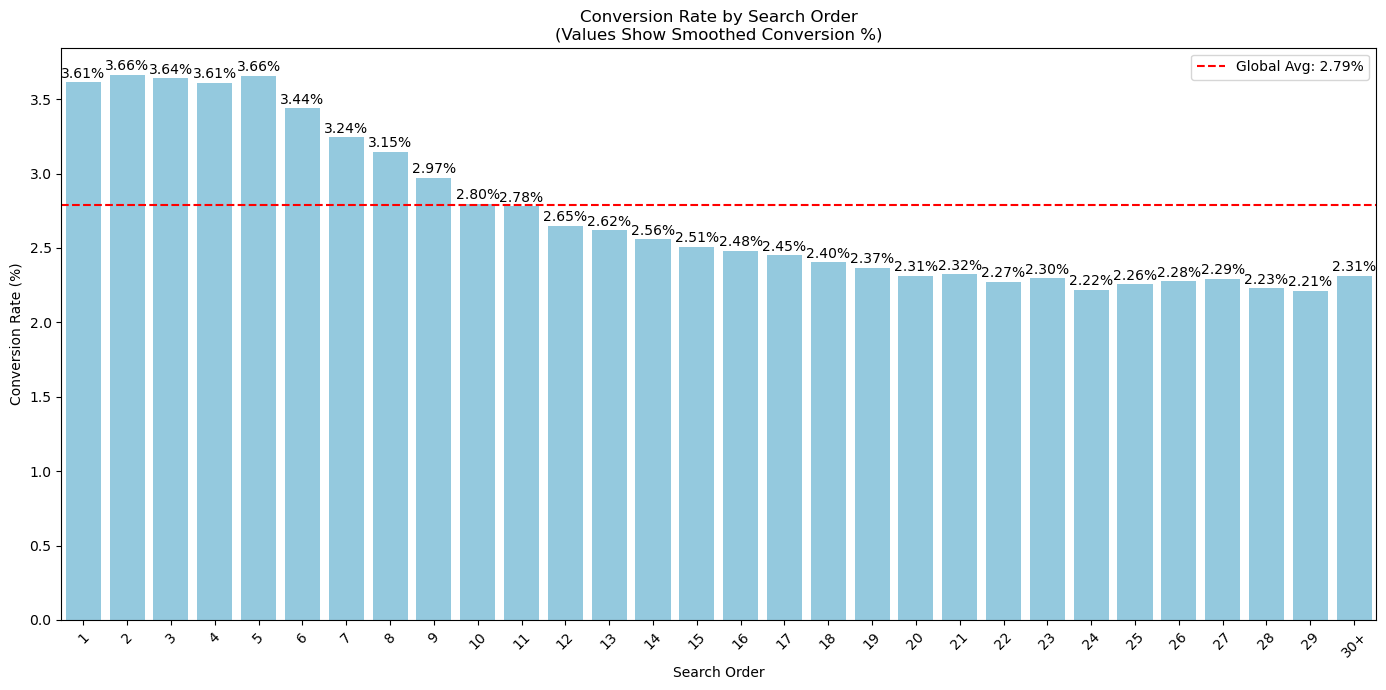

In [697]:
# 1. Count True/False per search_order (your original approach)
booking_counts = (
    df_search.groupby('search_order')['booking_bool']
    .value_counts()
    .unstack(fill_value=0)
    .rename(columns={False: 'False', True: 'True'})
    .reset_index()
)

# 2. Add Bayesian smoothing to handle low-sample groups
overall_conversion = booking_counts['True'].sum() / booking_counts[['False', 'True']].sum().sum()
booking_counts['smoothed_conversion'] = (
    (booking_counts['True'] + overall_conversion * 10) / 
    (booking_counts['False'] + booking_counts['True'] + 10) * 100
)

# 3. Aggregate high search_order groups (e.g., 30+) for stability
booking_counts['search_order_grouped'] = np.where(
    booking_counts['search_order'] >= 30,
    '30+',
    booking_counts['search_order'].astype(str)
)
grouped = booking_counts.groupby('search_order_grouped', as_index=False).agg({
    'False': 'sum',
    'True': 'sum',
})

# 4. Calculate final conversion rates (smoothed and raw for comparison)
grouped['conversion'] = grouped['True'] / (grouped['False'] + grouped['True']) * 100
grouped['smoothed_conversion'] = (
    (grouped['True'] + overall_conversion * 10) / 
    (grouped['False'] + grouped['True'] + 10) * 100
)

# 5. Plotting (with error bars for confidence intervals)
plt.figure(figsize=(14, 7))
ax = sns.barplot(
    data=grouped,
    x='search_order_grouped',
    y='smoothed_conversion',
    order=sorted(grouped['search_order_grouped'].unique(), key=lambda x: int(x) if x != '30+' else 31),
    color='skyblue'
)

# Get the exact bar order from the plot
bar_order = [int(t.get_text()) if t.get_text() != '30+' else 31 
             for t in ax.get_xticklabels()]
sorted_grouped = grouped.set_index('search_order_grouped').loc[[str(x) if x != 31 else '30+' for x in sorted(bar_order)]]

# Add annotations in correct visual order
for i, (_, row) in enumerate(sorted_grouped.iterrows()):
    ax.text(
        i,  # Use plot position index, not DataFrame index
        row['smoothed_conversion'] + 0.01,
        f'{row["smoothed_conversion"]:.2f}%',
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

plt.axhline(overall_conversion * 100, color='red', linestyle='--', 
           label=f'Global Avg: {overall_conversion*100:.2f}%')
plt.title('Conversion Rate by Search Order\n(Values Show Smoothed Conversion %)')
plt.xlabel('Search Order')
plt.ylabel('Conversion Rate (%)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

**Insight**

We observe a significant drop in conversion rate starting at search order = 5, declining from 3.66% to 3.44%, and continuing downward until it falls below the global average (2.79%) by search order = 10.

**Why?**

This pattern suggests that users who search more than 5 times may be feeling overwhelmed, frustrated, or unable to find a suitable option—potentially trapped in a comparison loop.

**Recommendation**

To address this drop-off, we propose the following interventions:

1. Smart Suggestions at Search #5

Use the user's past search behavior (e.g., filters, destinations, clicked hotels) to generate personalized hotel recommendations at the 5th search. This helps guide indecisive users toward relevant options before they drop off.

2. Enhanced Comparison UX

Improve the UI to support easier side-by-side hotel comparisons—especially on mobile.
For example:

- Display multiple hotels in a grid view.

- Highlight key differences (price, location, amenities) for quick evaluation.

- Introduce a “Compare” mode after the 3rd or 4th search.


3. Reduce Over-Searching by Early Personalization
Focus on helping users convert within the first 2–3 searches by:

- Showing smarter, personalized results from the start.

- Learning from early clicks to adjust later rankings in real time.

**Testing Plan**

User Feedback:

Deploy a post-intervention survey to users who received smart suggestions at search #5, asking:
“Did these recommendations help you find what you were looking for?”

A/B Test:

Compare the conversion rates of users who received the new features (smart suggestions, enhanced comparison UI) vs. a control group.

Success Metric:

Aim for an improvement in conversion rate between search orders 5–10, ideally bringing it back above the global average of 2.79%.



### 2.b. Booking rate vs. search position

we will sort the dataframe first so it will filter the duplicate data for each srch_id so it will not counted again.

we filter by sorting the booking value first, so whwn we drop_duplicate in srch_id, we will get the True first and remove the False if double.

In [ ]:
# Sort so bookings come first (True > False)
df_sorted = df_part_2.sort_values(by='booking_bool', ascending=False)

# Keep the first row per srch_id (i.e., booking if it exists)
df_unique_search = df_sorted.drop_duplicates(subset='srch_id')
df_unique_search

#### a. booking_bool vs random

IN this part we will check if the random placement or we call recomendation system we got is effective to get booking

In [714]:
crosstab = pd.crosstab(df_unique_search['random_bool'], df_unique_search['booking_bool'])
crosstab


booking_bool   False   True 
random_bool                 
False          17044  260671
True          105597   15843

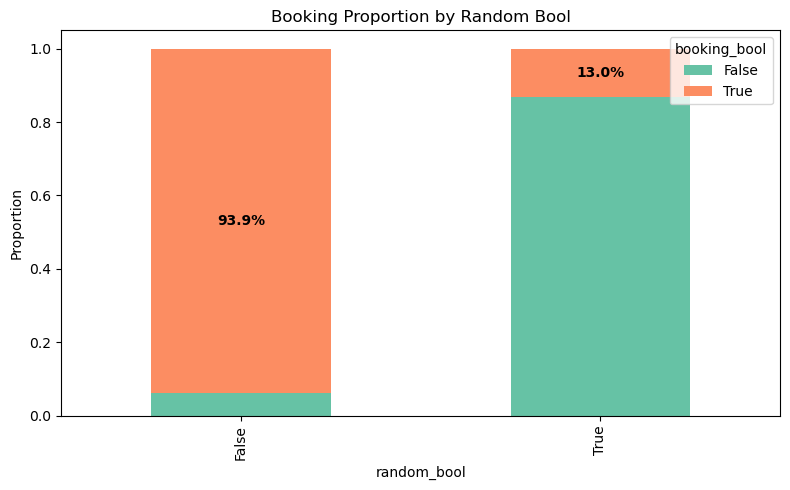

In [724]:
# Normalize the crosstab
crosstab_norm = crosstab.div(crosstab.sum(axis=1), axis=0)

# Plot
ax = crosstab_norm.plot(kind='bar', stacked=True, figsize=(8,5), color=['#66c2a5', '#fc8d62'])

# Add annotations for booking_bool = True
for i, (index, row) in enumerate(crosstab_norm.iterrows()):
    booking_true_pct = row[True] * 100  # Get % of True bookings
    # Position the annotation at the middle of the True bar
    y_pos = row[False] + (row[True] / 2)
    ax.text(i, y_pos, f'{booking_true_pct:.1f}%', 
            ha='center', va='center', fontsize=10, fontweight='bold', color='black')

# Add labels
ax.set_ylabel('Proportion')
ax.set_title('Booking Proportion by Random Bool')
ax.legend(title='booking_bool', loc='upper right')

plt.tight_layout()
plt.show()


Insight :

As we can see the random feature make less booking than random_bool turn off, so maybe we know that user more like to search what they wanted not what recomendation system we give.

Improve our recomendation system so it will give a recom more user like to choose

#### b. Position of Hotel in app affect the booking

In [751]:
df_position = df_unique_search.groupby('position')['booking_bool'].value_counts().unstack()
df_c_norm = df_position.div(df_position.sum(axis=1), axis=0).sort_values(by=True,ascending=False)
df_c_norm
# df_position

booking_bool     False     True 
position                        
1             0.103884  0.896116
2             0.149881  0.850119
3             0.188214  0.811786
4             0.228211  0.771789
5             0.255245  0.744755
6             0.268951  0.731049
7             0.296282  0.703718
8             0.314737  0.685263
9             0.335751  0.664249
10            0.352529  0.647471
12            0.370635  0.629365
13            0.401460  0.598540
14            0.411776  0.588224
11            0.414634  0.585366
15            0.418751  0.581249
16            0.448809  0.551191
18            0.465739  0.534261
19            0.476137  0.523863
20            0.499118  0.500882
40            0.500000  0.500000
21            0.500566  0.499434
24            0.533502  0.466498
22            0.536166  0.463834
25            0.554065  0.445935
39            0.562500  0.437500
26            0.565121  0.434879
23            0.578947  0.421053
17            0.578947  0.421053
27            0.581826  0.418174
28            0.595638  0.404362
29            0.611361  0.388639
38            0.616788  0.383212
31            0.623836  0.376164
36            0.625150  0.374850
30            0.627629  0.372371
37            0.628910  0.371090
33            0.641896  0.358104
32            0.643094  0.356906
34            0.643430  0.356570
35            0.651438  0.348562

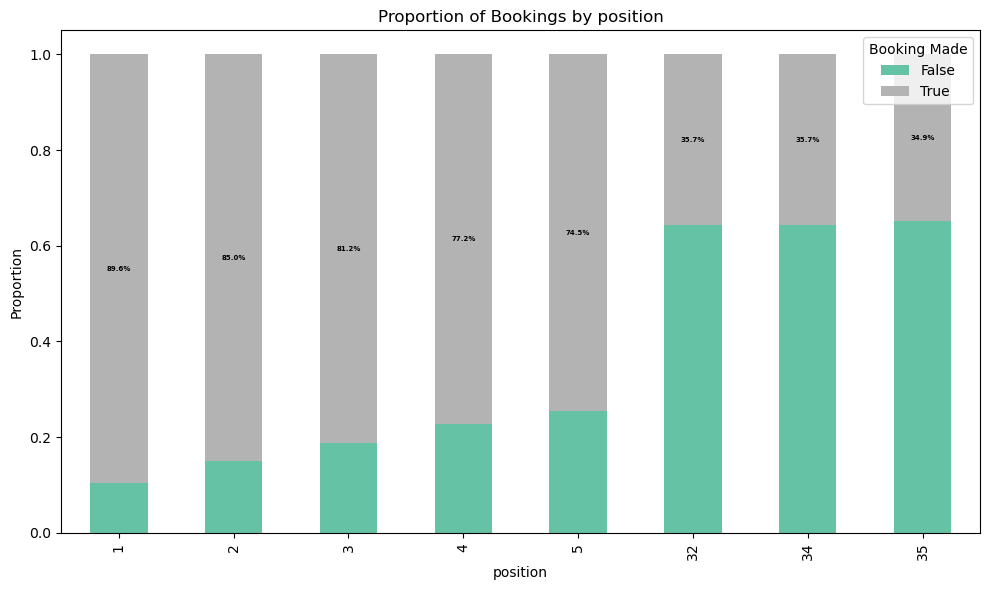

In [752]:
# Plot the normalized stacked bar chart
selected_rows = pd.concat([
    df_c_norm.iloc[0:5],      # first 5 rows (index 0 to 4)
    df_c_norm.iloc[-3:]       # last 3 rows
])

ax = selected_rows.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')

# Add annotations for booking_bool = True
for i, (index, row) in enumerate(selected_rows.iterrows()):
    # Only annotate the 'True' portion (second bar segment in the stack)
    booking_true_pct = row[True] * 100
    ax.text(
        i,                          # x position
        row[False] + row[True] / 2, # y position in the middle of the 'True' bar
        f'{booking_true_pct:.1f}%', # text
        ha='center', va='center', fontsize=5, fontweight='bold', color='black'
    )

plt.title('Proportion of Bookings by position')
plt.xlabel('position')
plt.ylabel('Proportion')
plt.legend(title='Booking Made')
plt.tight_layout()
plt.show()

Insight :

As we can see the higher order the more convert we get, the lowest the worse. but we will drop this data in the modeling.

### 2.c. log_price_delta_mean

we will find out does price delta affect the booking_bool rate

In [772]:
import math
df_unique_search['log_price_delta_from_mean'] = df_unique_search['price_usd'].apply(lambda x : math.log(x)) - df_unique_search['prop_log_historical_price']
df_unique_search['cheaper_historical'] = df_unique_search['log_price_delta_from_mean'] < 0
df_unique_search.sort_values(by='log_price_delta_from_mean',ascending=False)
# if result negative the price_usd is cheaper than historical

srch_id   date_time site_id visitor_location_country_id  \
1168568   78107  2013-06-17       5                 Country_202   
6293394  422470  2013-06-25      32                 Country_202   
680745    45559  2013-06-14       5                 Country_164   
7288960  489732  2013-04-12       5                 Country_202   
3934239  264037  2013-06-11      14                 Country_100   
...         ...         ...     ...                         ...   
460022    30796  2013-02-20       6                 Country_202   
3564067  239365  2012-11-18      33                 Country_164   
3545617  238081  2013-03-21       6                 Country_202   
2362345  158660  2013-02-21       6                 Country_202   
7066937  474710  2013-04-09      24                 Country_216   

        prop_country_id          prop_id  prop_starrating  prop_review_score  \
1168568      Country_39   Property_54873                5                4.5   
6293394     Country_202   Property_36386                3                4.0   
680745       Country_98   Property_92295                3                0.0   
7288960     Country_202   Property_16530                3                0.0   
3934239      Country_92   Property_36142                4                4.0   
...                 ...              ...              ...                ...   
460022      Country_202   Property_95195                4                0.0   
3564067     Country_164  Property_109634                4                4.5   
3545617     Country_202   Property_47489                4                4.5   
2362345     Country_202   Property_79958                4                4.0   
7066937     Country_216  Property_126263                4                4.5   

         prop_brand_bool  prop_location_score1  prop_location_score2  \
1168568            False                  4.19              0.118500   
6293394            False                  4.93              0.150000   
680745             False                  3.30              0.141700   
7288960            False                  2.77              0.117379   
3934239             True                  3.47              0.151800   
...                  ...                   ...                   ...   
460022             False                  4.30              0.011200   
3564067            False                  2.30              0.067700   
3545617            False                  4.49              0.062500   
2362345            False                  3.22              0.262800   
7066937            False                  1.10              0.584900   

         prop_log_historical_price position   price_usd  promotion_flag  \
1168568                       0.00        6  2741960.00           False   
6293394                       0.00       27   880873.23            True   
680745                        0.00        7   373990.00            True   
7288960                       0.00       28   371901.00            True   
3934239                       0.00       22   196290.12           False   
...                            ...      ...         ...             ...   
460022                        5.03       27        0.01            True   
3564067                       5.10        9        0.01           False   
3545617                       5.42       33        0.01            True   
2362345                       5.47       10        0.01            True   
7066937                       5.50        4        0.01            True   

        srch_destination_id  srch_length_of_stay  srch_booking_window  \
1168568               15122                    4                    7   
6293394               12430                    2                   15   
680745                  964                    3                    7   
7288960               22784                    2                   25   
3934239               14669                    1                   42   
...                     ...           

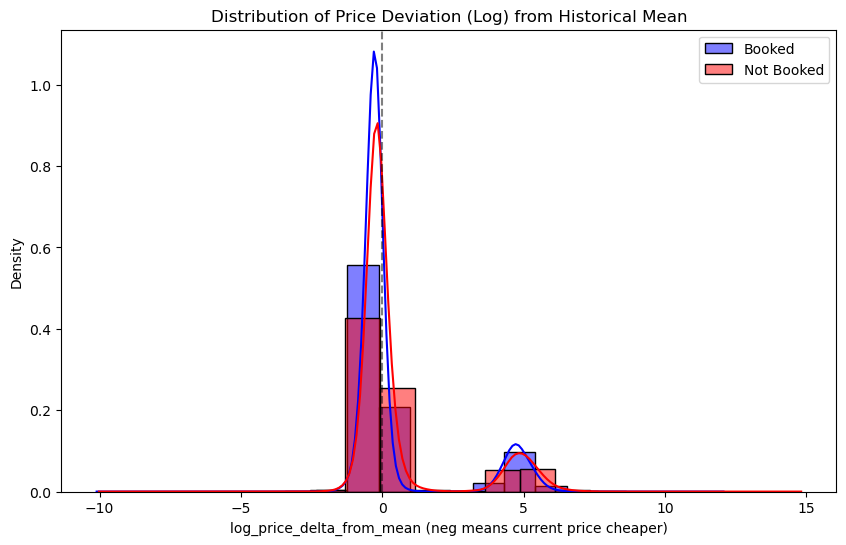

In [771]:
plt.figure(figsize=(10, 6))

sns.histplot(
    df_unique_search[df_unique_search['booking_bool'] == True]['log_price_delta_from_mean'],
    bins=20,
    color='blue',
    label='Booked',
    kde=True,
    stat='density'
)

sns.histplot(
    df_unique_search[df_unique_search['booking_bool'] == False]['log_price_delta_from_mean'],
    bins=20,
    color='red',
    label='Not Booked',
    kde=True,
    stat='density'
)

plt.title('Distribution of Price Deviation (Log) from Historical Mean')
plt.xlabel('log_price_delta_from_mean (neg means current price cheaper)')
plt.ylabel('Density')
plt.legend()
plt.axvline(0, color='black', linestyle='--', alpha=0.5)
plt.show()


For the distribution look like the Book and Not Booked based on delta price is the same but we observe that booked happen when the price is lower than the historical price. We can limit the discount up until log 5.

And worth mention, the wider the distribution of mean which is 15 will result not booked, we can try to find a best limit to price.

In [773]:
df_position = df_unique_search.groupby('cheaper_historical')['booking_bool'].value_counts().unstack()
df_c_norm = df_position.div(df_position.sum(axis=1), axis=0).sort_values(by=True,ascending=False)
df_c_norm
# df_position

booking_bool           False     True 
cheaper_historical                    
True                0.270702  0.729298
False               0.390347  0.609653

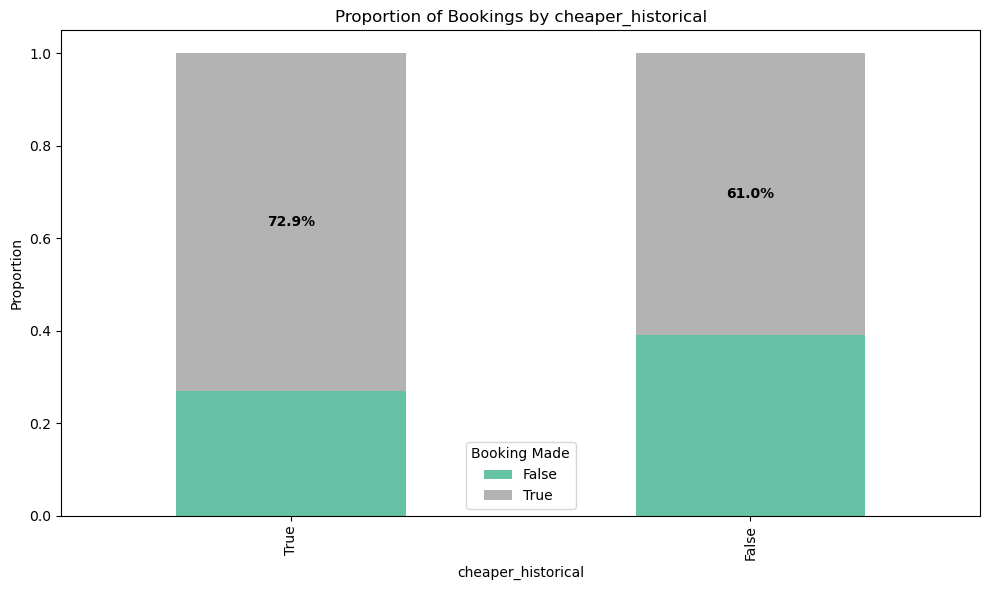

In [776]:
# Plot the normalized stacked bar chart

ax = df_c_norm.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')

# Add annotations for booking_bool = True
for i, (index, row) in enumerate(df_c_norm.iterrows()):
    # Only annotate the 'True' portion (second bar segment in the stack)
    booking_true_pct = row[True] * 100
    ax.text(
        i,                          # x position
        row[False] + row[True] / 2, # y position in the middle of the 'True' bar
        f'{booking_true_pct:.1f}%', # text
        ha='center', va='center', fontsize=10, fontweight='bold', color='black'
    )

plt.title('Proportion of Bookings by cheaper_historical')
plt.xlabel('cheaper_historical')
plt.ylabel('Proportion')
plt.legend(title='Booking Made')
plt.tight_layout()
plt.show()

For proportion we observe that cheaper result in booking 12% more, this chart is normalize so in result it will be more

### 2.d. Promotion Flag, does this affect the Booking

In [ ]:
df_promotion_flag = df_unique_search.groupby('promotion_flag')['booking_bool'].value_counts().unstack()
df_c_norm = df_promotion_flag.div(df_promotion_flag.sum(axis=1), axis=0).sort_values(by=True,ascending=False)
df_c_norm

booking_bool       False     True 
promotion_flag                    
True            0.231007  0.768993
False           0.335938  0.664062

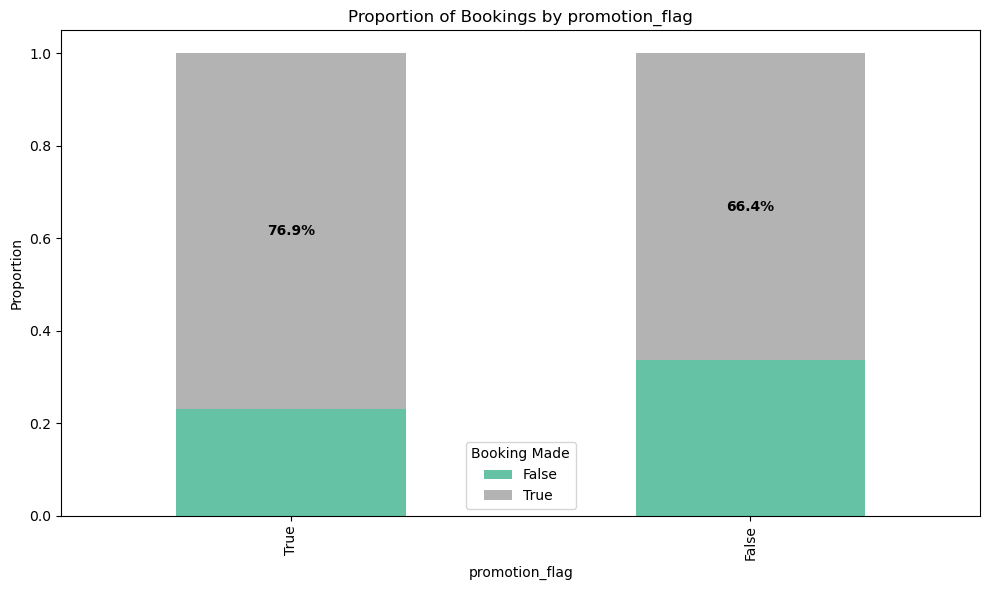

In [780]:
ax = df_c_norm.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')

# Add annotations for booking_bool = True
for i, (index, row) in enumerate(df_c_norm.iterrows()):
    # Only annotate the 'True' portion (second bar segment in the stack)
    booking_true_pct = row[True] * 100
    ax.text(
        i,                          # x position
        row[False] + row[True] / 2, # y position in the middle of the 'True' bar
        f'{booking_true_pct:.1f}%', # text
        ha='center', va='center', fontsize=10, fontweight='bold', color='black'
    )

plt.title('Proportion of Bookings by promotion_flag')
plt.xlabel('promotion_flag')
plt.ylabel('Proportion')
plt.legend(title='Booking Made')
plt.tight_layout()
plt.show()

Insight :

Yes, the promotion_flag true lead to more booking. it make sense, but we can search further the percentage of promotion is best if we get the data of it.

<hr>

## **🔹 Part 3. Business Effectiveness**

What’s driving revenue and successful outcomes for the business.

We will explore which one that we can benefit from

### 3.a. Best website to gain revenue by calculating Revenue per Click

In [88]:
site_id = pd.read_csv('expedia_site_ids.csv')
site_id.head()

site_id expedia_website  country_language  \
0        1     Expedia.com     USA (English)   
1        2   Expedia.co.uk      UK (English)   
2        3      Expedia.ca  Canada (English)   
3        4      Expedia.de  Germany (German)   
4        5      Expedia.es   Spain (Spanish)   

                                                                        source  
0  Expedia Partner Central API (https://developer.expediapartnersolutions.com)  
1                                              Kaggle's Expedia Dataset (2015)  
2                                         Expedia Affiliate Network (EAN) docs  
3                                       Expedia's Market Code Sheet (internal)  
4                                           Kaggle + Cross-referenced with EPC

In [89]:
# Only srch_id that check out
df_website = df[df['booking_bool']==True].copy()
df_website = df_website[['srch_id','site_id']].drop_duplicates()
df_website
total_search_id_unique_co = df_website.groupby('site_id')['srch_id'].count().reset_index().rename(columns={'srch_id':'count_check_out'})
total_search_id_unique_co.sort_values(by='count_check_out',ascending=False)

site_id  count_check_out
4        5           173526
13      14            26822
14      15            17448
23      24            14351
31      32             9094
17      18             6710
15      16             4494
11      12             3702
21      22             2247
6        7             2235
30      31             2187
8        9             1933
10      11             1886
18      19             1706
28      29             1572
25      26              882
22      23              658
3        4              644
0        1              596
24      25              585
33      34              506
12      13              422
9       10              421
26      27              395
1        2              296
16      17              296
20      21              197
29      30              190
2        3              184
27      28              178
5        6              119
32      33               21
19      20               10
7        8                1

In [90]:
# Include all
df_website = df.copy()
df_website = df_website[['srch_id','site_id']].drop_duplicates()
df_website
total_search_id_unique_total = df_website.groupby('site_id')['srch_id'].count().reset_index().rename(columns={'srch_id':'count_total'})
total_search_id_unique_total.sort_values(by='count_total',ascending=False).head()

site_id  count_total
4        5       243139
13      14        38692
14      15        25332
23      24        20225
31      32        14174

In [91]:
df_website = total_search_id_unique_co.merge(total_search_id_unique_total,how='left',on='site_id')
df_website['percentage']=round(df_website['count_check_out']/df_website['count_total']*100,2)
df_website = df_website.sort_values(by='count_check_out',ascending=False)
df_website = df_website.merge(site_id,on='site_id',how='left')
df_website = df_website[['site_id','count_check_out','count_total','percentage','expedia_website','country_language']]
df_website

site_id  count_check_out  count_total  percentage expedia_website  \
0         5           173526       243139       71.37      Expedia.es   
1        14            26822        38692       69.32      Expedia.se   
2        15            17448        25332       68.88  Expedia.com.tw   
3        24            14351        20225       70.96  Expedia.com.ph   
4        32             9094        14174       64.16      Expedia.cl   
5        18             6710        10947       61.30      Expedia.fi   
6        16             4494         7797       57.64  Expedia.com.br   
7        12             3702         6369       58.13   Expedia.co.in   
8        22             2247         3726       60.31   Expedia.co.nz   
9         7             2235         2620       85.31      Expedia.it   
10       31             2187         2290       95.50  Expedia.com.ar   
11        9             1933         3551       54.44  Expedia.com.au   
12       11             1886         2852       66.13  Expedia.com.hk   
13       19             1706         3895       43.80      Expedia.ie   
14       29             1572         2493       63.06  Expedia.com.vn   
15       26              882         1344       65.62  Expedia.com.tr   
16       23              658         1042       63.15      Expedia.no   
17        4              644         1124       57.30      Expedia.de   
18        1              596         1000       59.60     Expedia.com   
19       25              585         1057       55.35      Expedia.pl   
20       34              506          844       59.95  Expedia.com.co   
21       13              422          746       56.57  Expedia.com.sg   
22       10              421          798       52.76   Expedia.co.jp   
23       27              395          444       88.96   Expedia.co.th   
24        2              296          505       58.61   Expedia.co.uk   
25       17              296          518       57.14      Expedia.dk   
26       21              197          317       62.15  Expedia.com.mx   
27       30              190          314       60.51  Expedia.com.my   
28        3              184          295       62.37      Expedia.ca   
29       28              178          382       46.60      Expedia.ru   
30        6              119          244       48.77      Expedia.fr   
31       33               21           66       31.82   Expedia.co.id   
32       20               10           11       90.91   Expedia.co.kr   
33        8                1            2       50.00      Expedia.nl   

          country_language  
0          Spain (Spanish)  
1         Sweden (Swedish)  
2         Taiwan (Chinese)  
3    Philippines (English)  
4          Chile (Spanish)  
5        Finland (Finnish)  
6      Brazil (Portuguese)  
7          India (English)  
8    New Zealand (English)  
9          Italy (Italian)  
10     Argentina (Spanish)  
11     Australia (English)  
12     Hong Kong (English)  
13       Ireland (English)  
14    Vietnam (Vietnamese)  
15        Turkey (Turkish)  
16      Norway (Norwegian)  
17        Germany (German)  
18           USA (English)  
19         Poland (Polish)  
20      Colombia (Spanish)  
21     Singapore (English)  
22        Japan (Japanese)  
23         Thailand (Thai)  
24            UK (English)  
25        Denmark (Danish)  
26        Mexico (Spanish)  
27      Malaysia (English)  
28        Canada (English)  
29        Russia (Russian)  
30         France (French)  
31  Indonesia (Indonesian)  
32    South Korea (Korean)  
33     Netherlands (Dutch)

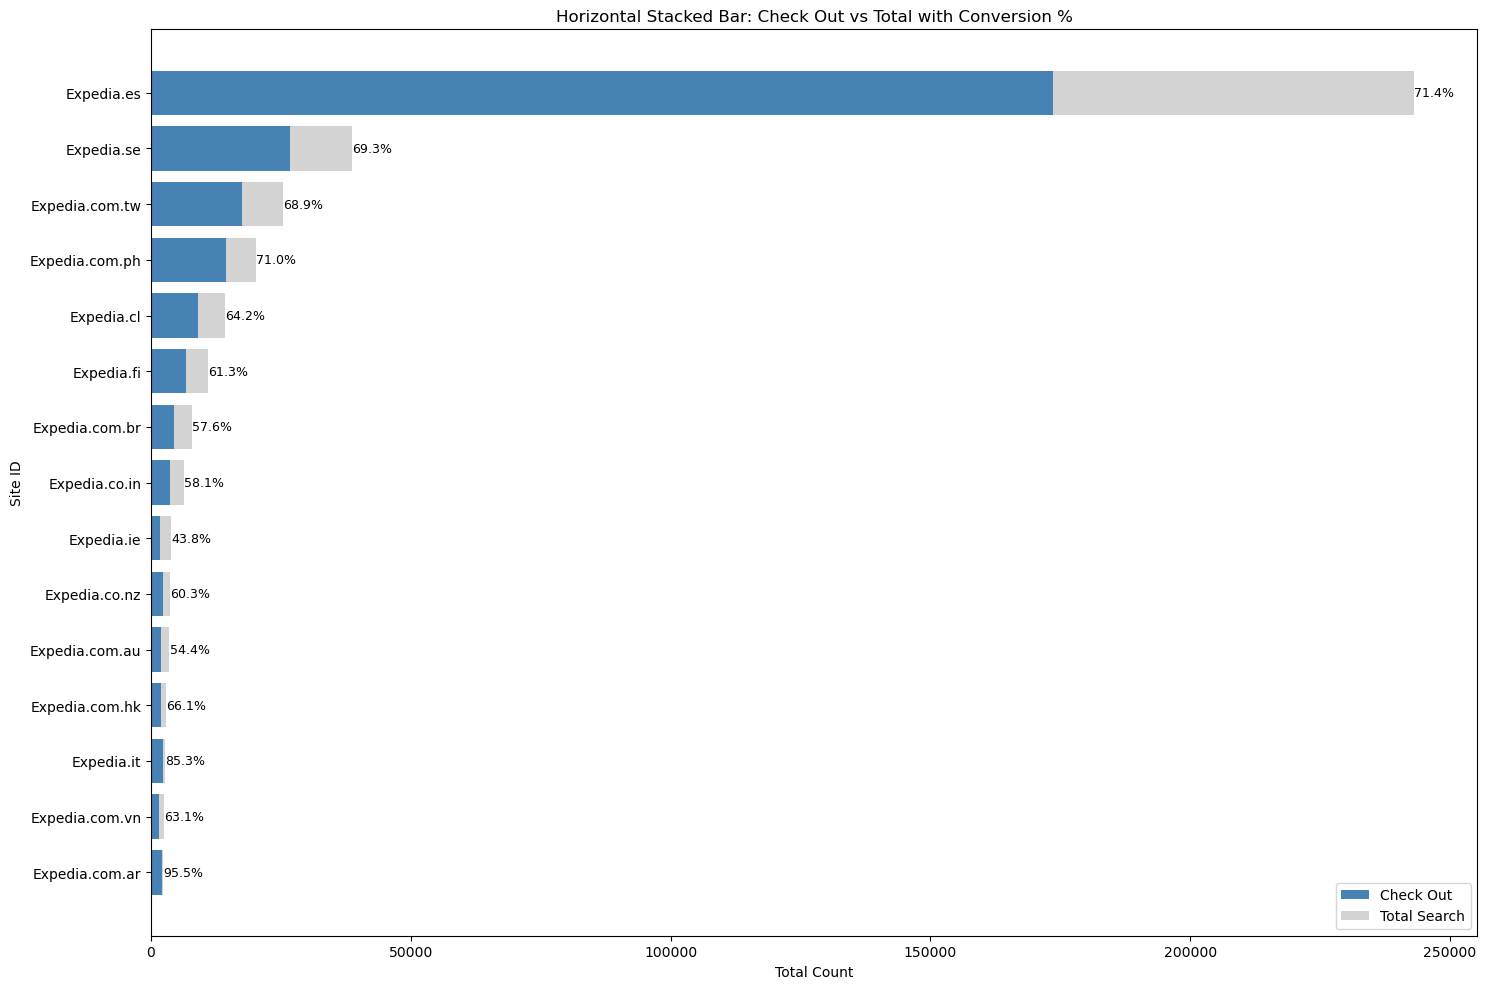

In [92]:
# Compute remaining = total - check out
df_website['count_remaining'] = df_website['count_total'] - df_website['count_check_out']

# Sort so bigger total appears at top
df_sorted = df_website.sort_values(by='count_total', ascending=False).reset_index(drop=True).head(15)

# Bar positions
y = np.arange(len(df_sorted))

# Plotting
fig, ax = plt.subplots(figsize=(15, 10))
bars1 = ax.barh(y, df_sorted['count_check_out'], label='Check Out', color='steelblue')
bars2 = ax.barh(y, df_sorted['count_remaining'],
                left=df_sorted['count_check_out'], label='Total Search', color='lightgray')

# Annotations (percentage to the right of total bar)
for i, (total, pct) in enumerate(zip(df_sorted['count_total'], df_sorted['percentage'])):
    ax.text(total + 20, y[i], f'{pct:.1f}%', va='center', fontsize=9)

# Axis labels and legend
ax.set_ylabel('Site ID')
ax.set_xlabel('Total Count')
ax.set_title('Horizontal Stacked Bar: Check Out vs Total with Conversion %')
ax.set_yticks(y)
ax.set_yticklabels(df_sorted['expedia_website'])
ax.invert_yaxis()  # Flip y-axis to show largest on top
ax.legend()

plt.tight_layout()
plt.show()


Analysis Summary:

Expedia.es sees the most unique searches, indicating high website traffic, but it has a relatively low conversion rate 71.4%.

Expedia.com.ar, however, boasts a remarkable 95.5% conversion rate, meaning nearly all searches lead to a booking.

This shows that while Expedia.es is popular, many users do not convert into sales. On the other hand, Expedia.com.ar has a highly effective conversion process, where most searches result in bookings.

Next Steps:

Investigate Revenue per Click:

We'll compare the revenue per click for both Expedia.es and Expedia.com.ar to understand how we can optimize both traffic and revenue.

Learn from Expedia.es:

We can analyze how to capture more of the user base seen in Expedia.es, considering improvements in conversion strategies to boost sales.

Understand Expedia.com.ar’s Success:

We’ll dive deeper into Expedia.com.ar's high conversion rate to uncover insights on how they achieve a 95.5% booking rate, focusing on user experience, targeting, and other conversion drivers.

### 3.b. Revenue per click by site — who brings high-value users?

In [93]:
df_website_revenue = df.copy()
df_website_revenue = df_website_revenue[df_website_revenue['booking_bool']==True].groupby('site_id')['price_usd'].sum().reset_index()
df_website_revenue = df_website.merge(df_website_revenue,on='site_id',how='left').rename(columns={'price_usd':'sum_price_usd'})
df_website_revenue['rank'] = df_website_revenue['expedia_website'] + ' Rank ' +df_website_revenue['count_check_out'].rank(ascending=False, method='min').apply(str)
df_website_revenue = df_website_revenue[(df_website_revenue['count_check_out']+df_website_revenue['count_total'])>100]
df_website_revenue['Revenue_per_click'] = round(df_website_revenue['sum_price_usd']/df_website_revenue['count_check_out']*100)
df_website_revenue

site_id  count_check_out  count_total  percentage expedia_website  \
0        5           173526       243139       71.37      Expedia.es   
1       14            26822        38692       69.32      Expedia.se   
2       15            17448        25332       68.88  Expedia.com.tw   
3       24            14351        20225       70.96  Expedia.com.ph   
4       32             9094        14174       64.16      Expedia.cl   
5       18             6710        10947       61.30      Expedia.fi   
6       16             4494         7797       57.64  Expedia.com.br   
7       12             3702         6369       58.13   Expedia.co.in   
8       22             2247         3726       60.31   Expedia.co.nz   
9        7             2235         2620       85.31      Expedia.it   
10      31             2187         2290       95.50  Expedia.com.ar   
11       9             1933         3551       54.44  Expedia.com.au   
12      11             1886         2852       66.13  Expedia.com.hk   
13      19             1706         3895       43.80      Expedia.ie   
14      29             1572         2493       63.06  Expedia.com.vn   
15      26              882         1344       65.62  Expedia.com.tr   
16      23              658         1042       63.15      Expedia.no   
17       4              644         1124       57.30      Expedia.de   
18       1              596         1000       59.60     Expedia.com   
19      25              585         1057       55.35      Expedia.pl   
20      34              506          844       59.95  Expedia.com.co   
21      13              422          746       56.57  Expedia.com.sg   
22      10              421          798       52.76   Expedia.co.jp   
23      27              395          444       88.96   Expedia.co.th   
24       2              296          505       58.61   Expedia.co.uk   
25      17              296          518       57.14      Expedia.dk   
26      21              197          317       62.15  Expedia.com.mx   
27      30              190          314       60.51  Expedia.com.my   
28       3              184          295       62.37      Expedia.ca   
29      28              178          382       46.60      Expedia.ru   
30       6              119          244       48.77      Expedia.fr   

         country_language  count_remaining  sum_price_usd  \
0         Spain (Spanish)            69613    37096143.00   
1        Sweden (Swedish)            11870     4953357.01   
2        Taiwan (Chinese)             7884     6561792.76   
3   Philippines (English)             5874     2040313.96   
4         Chile (Spanish)             5080     1909497.57   
5       Finland (Finnish)             4237      992436.13   
6     Brazil (Portuguese)             3303      617733.42   
7         India (English)             2667      681042.91   
8   New Zealand (English)             1479      287715.21   
9         Italy (Italian)              385      310913.77   
10    Argentina (Spanish)              103      212096.00   
11    Australia (English)             1618      209354.43   
12    Hong Kong (English)              966      267789.17   
13      Ireland (English)             2189      188106.77   
14   Vietnam (Vietnamese)              921      208684.21   
15       Turkey (Turkish)              462     1017379.77   
16     Norway (Norwegian)              384       98400.79   
17       Germany (German)              480       98548.98   
18          USA (English)              404       96675.02   
19        Poland (Polish)              472       72655.79   
20     Colombia (Spanish)              338      159186.99   
21    Singapore (English)              324       94596.71   
22       Japan (Japanese)              377       54655.44   
23        Thailand (Thai)               49       57606.05   
24           UK (English)              209       36667.24   
25       Denmark (Danish)              222       29318.44   
26       Mexico (Spanish)              120       27

In [94]:
df_website_revenue['Revenue_per_click'].median()

14003.0

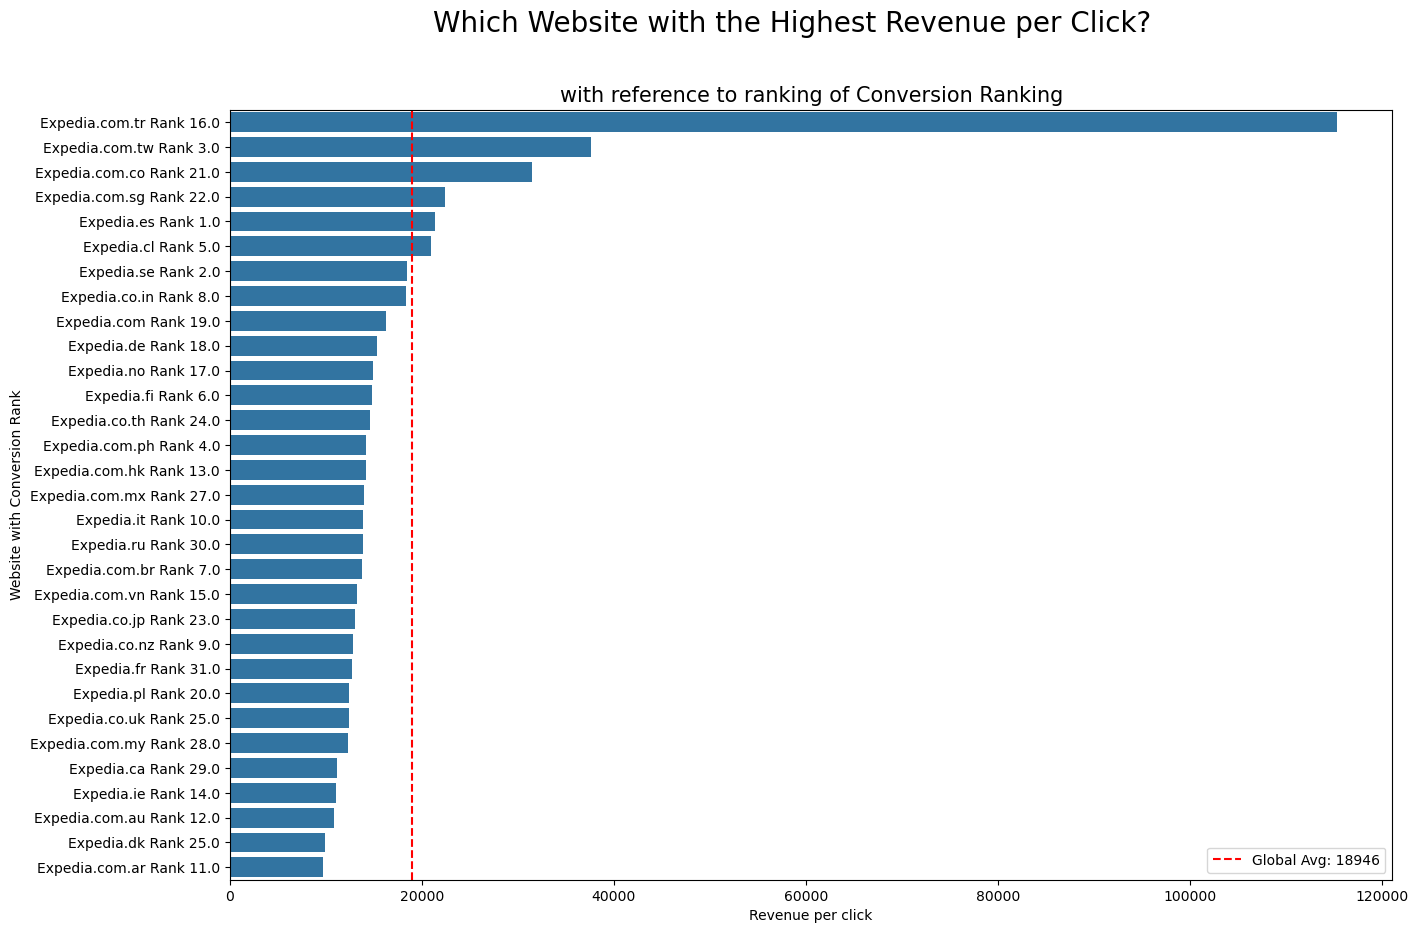

In [95]:
plt.figure(figsize=(15, 10))
plt.axvline(df_website_revenue['Revenue_per_click'].mean(), color='red', linestyle='--', 
           label=f'Global Avg: {round(df_website_revenue['Revenue_per_click'].mean())}')
sns.barplot(df_website_revenue.sort_values(by='Revenue_per_click',ascending=False),x='Revenue_per_click',y='rank')
plt.suptitle('Which Website with the Highest Revenue per Click?',fontsize=20)
plt.title('with reference to ranking of Conversion Ranking',fontsize=15)
plt.ylabel('Website with Conversion Rank')
plt.xlabel('Revenue per click')
plt.show()

Although Argentina (Expedia.com.ar) has a high conversion rate (90%), its Revenue per Click is the lowest. This suggests that while users convert, the value of each click is low.

On the other hand, Expedia.com.tr stands out and could be a good candidate to explore for high-value customer segments.

For sites with high conversion ranks like Expedia.se (Rank 2) and Expedia.com.ph (Rank 4), we can look into ways to increase revenue per click—for example, by testing bundling strategies or dynamic pricing.

**Insight Summary:**

High-Value Customers: (High Peformer)

Focus on Expedia.com.tr, which shows strong revenue per click — a potential source of high-value customer segments.

High Conversion Efficiency: (Under Peformer)

Learn from Expedia.com.ar, which has an exceptional 95.5% conversion rate. Understanding their approach could help replicate conversion success across other markets.

Improvement Opportunities:

Expedia.se and Expedia.com.ph have strong conversion rates but relatively low revenue per click.
We recommend experimenting with:

- Promotions or upselling
- Bundled offers
- Dynamic pricing tests
to maximize revenue from converted users.

### 3.c. Which hotel is the most booked

In [781]:
df_part_3 = df.copy()
df_part_3.head()

srch_id   date_time site_id visitor_location_country_id prop_country_id  \
0       1  2013-04-04      12                 Country_187     Country_219   
1       1  2013-04-04      12                 Country_187     Country_219   
2       1  2013-04-04      12                 Country_187     Country_219   
3       1  2013-04-04      12                 Country_187     Country_219   
4       1  2013-04-04      12                 Country_187     Country_219   

          prop_id  prop_starrating  prop_review_score  prop_brand_bool  \
0    Property_893                3                3.5             True   
1  Property_10404                4                4.0             True   
2  Property_21315                3                4.5             True   
3  Property_27348                2                4.0             True   
4  Property_29604                4                3.5             True   

   prop_location_score1  prop_location_score2  prop_log_historical_price  \
0                  2.83                0.0438                       4.95   
1                  2.20                0.0149                       5.03   
2                  2.20                0.0245                       4.92   
3                  2.83                0.0125                       4.39   
4                  2.64                0.1241                       4.93   

  position  price_usd  promotion_flag srch_destination_id  \
0       27     104.77           False               23246   
1       26     170.74           False               23246   
2       21     179.80           False               23246   
3       34     602.77           False               23246   
4        4     143.58           False               23246   

   srch_length_of_stay  srch_booking_window  srch_adults_count  \
0                    1                    0                  4   
1                    1                    0                  4   
2                    1                    0                  4   
3                    1                    0                  4   
4                    1                    0                  4   

   srch_children_count  srch_room_count  srch_saturday_night_bool  \
0                    0                1                      True   
1                    0                1                      True   
2                    0                1                      True   
3                    0                1                      True   
4                    0                1                      True   

   orig_destination_distance  random_bool  click_bool  booking_bool  \
0                4864.702448         True       False         False   
1                4864.702448         True       False         False   
2                4864.702448         True       False         False   
3                4864.702448         True       False         False   
4                4864.702448         True       False         False   

  time_of_day  month       day  search_order  
0     Morning  April  Thursday             1  
1     Morning  April  Thursday             2  
2     Morning  April  Thursday             3  
3     Morning  April  Thursday             4  
4     Morning  April  Thursday             5

In [788]:
df_part_3['revenue'] = round(df_part_3['price_usd'] *0.1,2)
df_part_3

srch_id   date_time site_id visitor_location_country_id  \
0             1  2013-04-04      12                 Country_187   
1             1  2013-04-04      12                 Country_187   
2             1  2013-04-04      12                 Country_187   
3             1  2013-04-04      12                 Country_187   
4             1  2013-04-04      12                 Country_187   
...         ...         ...     ...                         ...   
9917525  665574  2013-05-21      24                 Country_216   
9917526  665574  2013-05-21      24                 Country_216   
9917527  665574  2013-05-21      24                 Country_216   
9917528  665574  2013-05-21      24                 Country_216   
9917529  665574  2013-05-21      24                 Country_216   

        prop_country_id         prop_id  prop_starrating  prop_review_score  \
0           Country_219    Property_893                3                3.5   
1           Country_219  Property_10404                4                4.0   
2           Country_219  Property_21315                3                4.5   
3           Country_219  Property_27348                2                4.0   
4           Country_219  Property_29604                4                3.5   
...                 ...             ...              ...                ...   
9917525     Country_117  Property_32019                4                3.5   
9917526     Country_117  Property_33959                4                3.0   
9917527     Country_117  Property_35240                4                0.0   
9917528     Country_117  Property_94437                4                0.0   
9917529     Country_117  Property_99509                4                4.5   

         prop_brand_bool  prop_location_score1  prop_location_score2  \
0                   True                  2.83              0.043800   
1                   True                  2.20              0.014900   
2                   True                  2.20              0.024500   
3                   True                  2.83              0.012500   
4                   True                  2.64              0.124100   
...                  ...                   ...                   ...   
9917525            False                  2.48              0.055100   
9917526             True                  2.20              0.334400   
9917527            False                  1.79              0.072408   
9917528            False                  2.94              0.092800   
9917529             True                  2.08              0.034400   

         prop_log_historical_price position  price_usd  promotion_flag  \
0                             4.95       27     104.77           False   
1                             5.03       26     170.74           False   
2                             4.92       21     179.80           False   
3                             4.39       34     602.77           False   
4                             4.93        4     143.58           False   
...                            ...      ...        ...             ...   
9917525                       4.53        2      66.07           False   
9917526                       4.39        6      67.10           False   
9917527                       4.64        8      73.91           False   
9917528                       4.64        7      66.07           False   
9917529                       4.64        4      82.06           False   

        srch_destination_id  srch_length_of_stay  srch_booking_window  \
0                     23246                    1                    0   
1                     23246                    1                    0   
2                     23246                    1                    0   
3                     23246                    1                    0   
4                     23246                    1                    0   
...                     ...                  ...              

In [822]:
df_part_3.groupby('prop_id')['revenue'].unique().reset_index()

prop_id  \
0           Property_1   
1          Property_10   
2         Property_100   
3        Property_1000   
4       Property_10000   
...                ...   
136875  Property_99995   
136876  Property_99996   
136877  Property_99997   
136878  Property_99998   
136879  Property_99999   

                                                                                                                                                                                                                                                                                                                                                                                                                              revenue  
0                                                                                                                                                                                                                                                                                          [7.2, 9.9, 8.9, 8.1, 10.9, 8.3, 9.4, 11.4, 8.2, 9.0, 8.5, 7.9, 10.8, 9.81, 9.5, 10.3, 9.92, 7.6, 10.4, 11.7, 9.8, 11.0, 11.3, 11.9, 11.78]  
1                                                                                                                                                                                                                                                                                                                                                                      [14.61, 17.2, 19.58, 19.61, 20.06, 19.45, 17.52, 24.03, 18.01]  
2                                                                                                                                                                                                                                                                                                                                                                                    [5.14, 5.23, 7.15, 7.27, 6.96, 7.11, 7.26, 7.07]  
3                                                                                                                                                                                                                                                                                                                                                                        [11.71, 10.51, 12.12, 7.72, 9.86, 9.96, 11.76, 11.74, 10.44]  
4                                                                                                                                                                                                                                                                                                                                                                                                     [6.9, 5.9, 6.3, 5.5, 5.87, 6.8]  
...                                                                                                                                                                                                                                                                                                                                                                                                                               ...  
136875                                                                                                                                                                                                                                                                                                                                                                                                                     [7.5, 7.6]  
136876                                                                                                                                                                                                                                                                                                                

In [814]:
df_revenue = df_part_3.groupby('prop_id').agg({'booking_bool':'sum','revenue':'mean'}).reset_index().sort_values(by='booking_bool',ascending=False).rename(columns={'booking_bool':'total_ordered'})
df_revenue = df_revenue[df_revenue['total_ordered']>100].sort_values(by='revenue',ascending=False).head(10)
# create balanced metric for each order and revenue
df_revenue['ordered_pct'] = df_revenue['total_ordered'] / df_revenue['total_ordered'].sum()
df_revenue['revenue_pct'] = df_revenue['revenue'] / df_revenue['revenue'].sum()

#Give equal, so both of them if got higher is equal
df_revenue['score'] = (df_revenue['ordered_pct'] + df_revenue['revenue_pct']) / 2

df_sorted = df_revenue.sort_values(by='score', ascending=False)
df_sorted

prop_id  total_ordered    revenue  ordered_pct  revenue_pct  \
86669    Property_53494            252  40.546679     0.180775     0.086099   
99009    Property_64949            119  57.903354     0.085366     0.122955   
135587   Property_98803            172  39.127394     0.123386     0.083085   
51794    Property_21198            124  54.623872     0.088953     0.115991   
48749    Property_18380            123  51.243034     0.088235     0.108812   
40617    Property_13760            105  54.515868     0.075323     0.115762   
115009   Property_79740            154  36.890770     0.110473     0.078336   
47943    Property_17633            125  44.359198     0.089670     0.094195   
86290    Property_53141            105  50.897873     0.075323     0.108079   
28820   Property_126657            115  40.823615     0.082496     0.086687   

           score  
86669   0.133437  
99009   0.104160  
135587  0.103236  
51794   0.102472  
48749   0.098524  
40617   0.095542  
115009  0.094405  
47943   0.091932  
86290   0.091701  
28820   0.084592

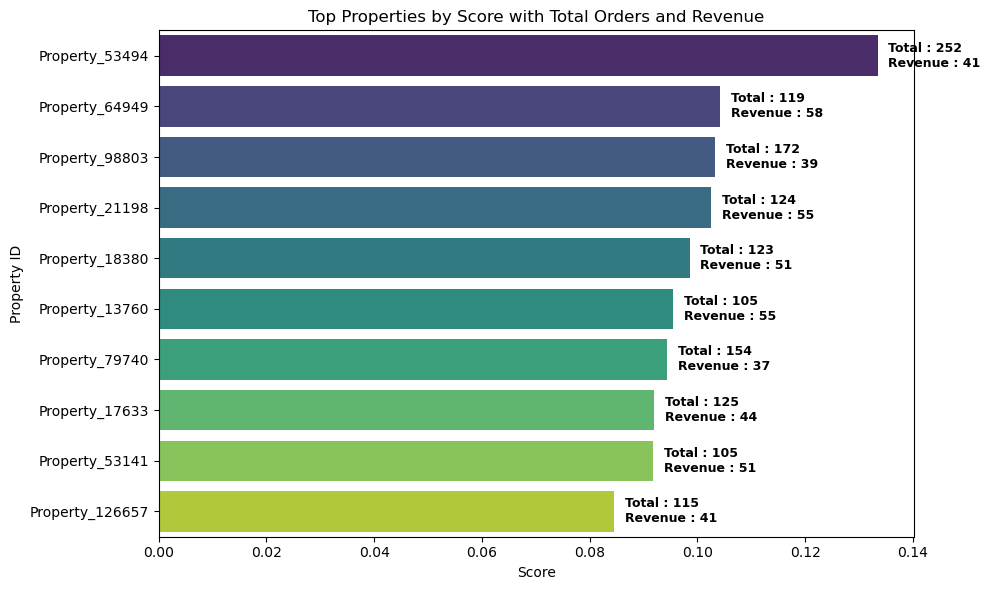

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_sorted, x='score', y='prop_id', palette='viridis')

# Add annotations using ax.patches (correct bar positions)
for patch, (_, row) in zip(ax.patches, df_sorted.iterrows()):
    bar_width = patch.get_width()
    bar_y = patch.get_y() + patch.get_height() / 2
    ax.text(
        bar_width + 0.002,         # x: slightly right of the bar
        bar_y,                     # y: center of the bar
        f"""Total : {row['total_ordered']} 
Revenue : {round(row['revenue'])}""",  # annotation
        va='center',
        fontsize=9,
        color='black',
        fontweight='bold'
    )

plt.title('Top Properties by Score with Total Orders and Revenue')
plt.xlabel('Score')
plt.ylabel('Property ID')
plt.tight_layout()
plt.show()


Insight :

This is a list that total order and revenue is equally good, we can get more colaboration to this property.

### 3.d. How many convert from click to book

We will find out how much convert from click to book

In [824]:
crosstab = pd.crosstab(df_part_3['click_bool'], df_part_3['booking_bool'])
crosstab


booking_bool    False   True 
click_bool                   
False         9470770       0
True           166947  276514

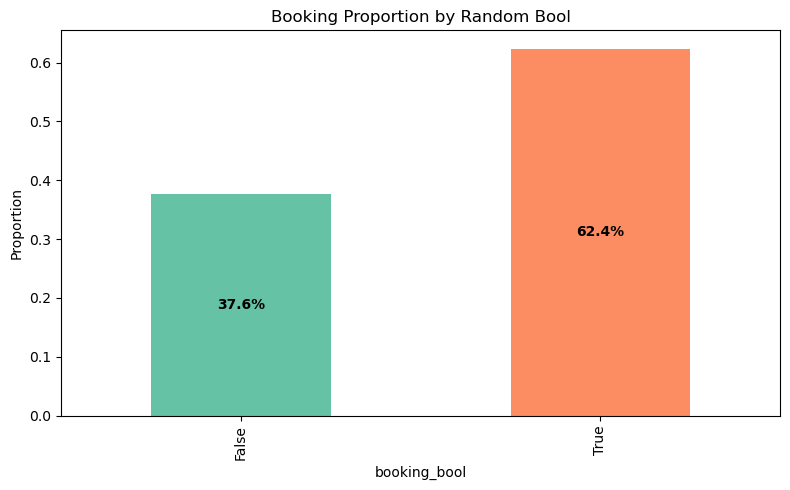

In [835]:
# Normalize the crosstab
crosstab_norm = crosstab.div(crosstab.sum(axis=1), axis=0)

# Plot
ax = crosstab_norm.loc[True].plot(kind='bar', stacked=True, figsize=(8, 5), color=['#66c2a5', '#fc8d62'])

# Add labels
ax.set_ylabel('Proportion')
ax.set_title('Booking Proportion by Random Bool')

# Add annotations to each segment
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    if height > 0.01:  # Only annotate segments large enough to see
        ax.text(
            x + width / 2,
            y + height / 2,
            f"{height * 100:.1f}%",
            ha='center',
            va='center',
            fontsize=10,
            color='black',
            fontweight='bold'
        )

plt.tight_layout()
plt.show()


More than half of people that click the hotel listing is checkout

In [96]:
top_property_df
#combine with this see each country is booked how much 

visitor_location_country_id  total_order_all    top1_property  \
0                     Country_1               10   Property_41079   
1                    Country_10               15  Property_135210   
2                   Country_100            27733  Property_132210   
3                   Country_101                2   Property_28922   
4                   Country_102               34  Property_100253   
..                          ...              ...              ...   
213                  Country_94                2   Property_36785   
214                  Country_95                3   Property_38711   
215                  Country_97                8   Property_45321   
216                  Country_98              685   Property_59054   
217                  Country_99             3550  Property_112281   

     total_order_1    top2_property  total_order_2    top3_property  \
0                2  Property_133509              1  Property_104652   
1                2  Property_139518              1   Property_28411   
2              141   Property_50810             89   Property_51178   
3                1   Property_47123              1       Property_1   
4                3   Property_72673              2   Property_83228   
..             ...              ...            ...              ...   
213              1   Property_76504              1   Property_57455   
214              1  Property_101532              1   Property_59821   
215              1   Property_84176              1   Property_65801   
216              7   Property_93411              6  Property_108588   
217             12   Property_14536              8   Property_86907   

     total_order_3    top4_property  total_order_4    top5_property  \
0                1   Property_61539              1    Property_9881   
1                1   Property_25168              1  Property_103602   
2               88   Property_80545             76   Property_88854   
3                0   Property_57474              0   Property_57458   
4                2   Property_41804              2   Property_53146   
..             ...              ...            ...              ...   
213              0   Property_57458              0   Property_57459   
214              1       Property_1              0   Property_57479   
215              1  Property_111830              1   Property_40524   
216              4   Property_34746              3  Property_135822   
217              8     Property_751              7    Property_1230   

     total_order_5  
0                1  
1                1  
2               74  
3                0  
4                2  
..             ...  
213              0  
214              0  
215              1  
216              3  
217              6  

[218 rows x 12 columns]

In [97]:
# Search country that got the most hotel ordered then compare it to order, which city is got high order but low count of hotel, 
# we can give recomen to search more hotel to partner in a country 
df_part_1[df_part_1['booking_bool'] == True].groupby('prop_country_id')['prop_id'].nunique().reset_index().rename(columns={'prop_id':'total_prop_each_country_booked'}).sort_values(by='total_prop_each_country_booked',ascending=False)

prop_country_id  total_prop_each_country_booked
99      Country_219                           27309
115      Country_31                            3007
135      Country_55                            2866
171      Country_99                            2708
2       Country_100                            2072
..              ...                             ...
162      Country_89                               1
160      Country_87                               1
86      Country_204                               1
54      Country_165                               0
146       Country_7                               0

[172 rows x 2 columns]

# **5. Machine Learning**

In this section, we'll develop a model to predict booking_bool. To speed up the process, we're using a random subset total 100.000 of the real dataset with a 23% positive class ratio. In reality, the booking rate is only around 2.8%, but working with this higher ratio allows us to train and evaluate the model more efficiently. 

In the future, as we gain more experience and computational resources, we aim to train the model using the full dataset with its natural class imbalance for better generalization.

## 5.1. Data Sampling

We take 100.000 random data with ratio of positive 23%. We use .sample feature.

In [503]:
df_ml = df.copy()
df_ml[['visitor_location_country_id','prop_country_id']] = df_ml[['visitor_location_country_id','prop_country_id']].astype('object')


In [504]:
df_ml['is_domestic'] = df_ml['visitor_location_country_id'] == df_ml['prop_country_id']
df_ml

srch_id   date_time site_id visitor_location_country_id  \
0             1  2013-04-04      12                 Country_187   
1             1  2013-04-04      12                 Country_187   
2             1  2013-04-04      12                 Country_187   
3             1  2013-04-04      12                 Country_187   
4             1  2013-04-04      12                 Country_187   
...         ...         ...     ...                         ...   
9917525  665574  2013-05-21      24                 Country_216   
9917526  665574  2013-05-21      24                 Country_216   
9917527  665574  2013-05-21      24                 Country_216   
9917528  665574  2013-05-21      24                 Country_216   
9917529  665574  2013-05-21      24                 Country_216   

        prop_country_id         prop_id  prop_starrating  prop_review_score  \
0           Country_219    Property_893                3                3.5   
1           Country_219  Property_10404                4                4.0   
2           Country_219  Property_21315                3                4.5   
3           Country_219  Property_27348                2                4.0   
4           Country_219  Property_29604                4                3.5   
...                 ...             ...              ...                ...   
9917525     Country_117  Property_32019                4                3.5   
9917526     Country_117  Property_33959                4                3.0   
9917527     Country_117  Property_35240                4                0.0   
9917528     Country_117  Property_94437                4                0.0   
9917529     Country_117  Property_99509                4                4.5   

         prop_brand_bool  prop_location_score1  prop_location_score2  \
0                   True                  2.83              0.043800   
1                   True                  2.20              0.014900   
2                   True                  2.20              0.024500   
3                   True                  2.83              0.012500   
4                   True                  2.64              0.124100   
...                  ...                   ...                   ...   
9917525            False                  2.48              0.055100   
9917526             True                  2.20              0.334400   
9917527            False                  1.79              0.072408   
9917528            False                  2.94              0.092800   
9917529             True                  2.08              0.034400   

         prop_log_historical_price position  price_usd  promotion_flag  \
0                             4.95       27     104.77           False   
1                             5.03       26     170.74           False   
2                             4.92       21     179.80           False   
3                             4.39       34     602.77           False   
4                             4.93        4     143.58           False   
...                            ...      ...        ...             ...   
9917525                       4.53        2      66.07           False   
9917526                       4.39        6      67.10           False   
9917527                       4.64        8      73.91           False   
9917528                       4.64        7      66.07           False   
9917529                       4.64        4      82.06           False   

        srch_destination_id  srch_length_of_stay  srch_booking_window  \
0                     23246                    1                    0   
1                     23246                    1                    0   
2                     23246                    1                    0   
3                     23246                    1                    0   
4                     23246                    1                    0   
...                     ...                  ...              

In [505]:
# Fill this first, it will be used for many function to cleaning and splitting
target_overal = 'booking_bool'

In [506]:
# Desired total size and ratio
total_rows = 100_000
positive_ratio = 0.23
positive_count = int(total_rows * positive_ratio)  # ≈ 69,000
negative_count = total_rows - positive_count       # ≈ 231,000

# Separate classes
booked = df_ml[df_ml['booking_bool'] == 1]
not_booked = df_ml[df_ml['booking_bool'] == 0]

# Sample required amounts
booked_sample = booked.sample(n=positive_count, random_state=42)
not_booked_sample = not_booked.sample(n=negative_count, random_state=42)

# Combine and shuffle
df_imbalanced = pd.concat([booked_sample, not_booked_sample]).sample(frac=1, random_state=42).reset_index(drop=True)

# Confirm final balance
print(df_imbalanced['booking_bool'].value_counts(normalize=True))
print("Total rows:", len(df_imbalanced))


booking_bool
False    0.77
True     0.23
Name: proportion, dtype: float64
Total rows: 100000


## 5.2. Define X and y

booking_bool will become the target y

In [589]:
def define_X_y(df, target=target_overal, drop_cols=[]):
    X = df.drop(columns=drop_cols + [target])
    y = df[target]
    print(f'X Column : {list(X.columns)}')
    print(f'y Column : {list(y)}')
    return X, y

X, y = define_X_y(df_imbalanced, target=target_overal, drop_cols=['srch_id','date_time','random_bool','click_bool','position','visitor_location_country_id','prop_country_id','prop_id','srch_destination_id','prop_location_score2'])

X Column : ['site_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool', 'prop_location_score1', 'prop_log_historical_price', 'price_usd', 'promotion_flag', 'srch_length_of_stay', 'srch_booking_window', 'srch_adults_count', 'srch_children_count', 'srch_room_count', 'srch_saturday_night_bool', 'orig_destination_distance', 'time_of_day', 'month', 'day', 'search_order', 'is_domestic']
y Column : [False, False, True, False, False, False, False, False, False, False, False, False, False, True, True, False, True, True, False, False, False, True, False, True, False, True, False, False, False, False, False, False, True, False, True, False, False, True, False, True, True, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, True, True, False, False, False, False, False, False, False, True, False, False, False, False, False

In [590]:
def check_class_balance(df, target=target_overal):
    """
    Check class imbalance and categorize its severity.

    Parameters:
    - df: DataFrame
    - target: Target column to evaluate (default 'Attrition')

    Returns:
    - Dictionary with details about class balance
    """

    class_1 = (df[target].astype('bool') == True).sum()
    class_0 = (df[target].astype('bool') == False).sum()

    if class_1 == class_0:
        print('✅ The data is perfectly balanced.')
        severity = 'Balanced'
    else:
        # Identify minority class and percentage
        minority_class_count = min(class_1, class_0)
        percentage = round(minority_class_count / df.shape[0] * 100, 2)

        print(f"⚠️ Data is Imbalanced.")
        print(f"Class 0 (False): {class_0}")
        print(f"Class 1 (True): {class_1}")
        print(f"Minority Class Percentage: {percentage}%")

        # Determine severity
        if 20 < percentage < 40:
            severity = 'Mild'
        elif 1 < percentage <= 20:
            severity = 'Moderate'
        elif percentage <= 1:
            severity = 'Extreme'
        else:
            severity = 'Balanced'  # This will catch cases where percentage > 40

        print(f"Severity of imbalance: {severity}")

check_class_balance(df_imbalanced, target=target_overal) # change the df_class

⚠️ Data is Imbalanced.
Class 0 (False): 77000
Class 1 (True): 23000
Minority Class Percentage: 23.0%
Severity of imbalance: Mild


## 5.3. Data Splitting

In [591]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                                    X,y,
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify=y # make sure the distribution in y the same
)

print('Data Splitting Preview')
preview_data = pd.DataFrame({
    'Category' : ['X_train', 'y_train', 'X_test', 'y_test'],
    'Row' : [X_train.shape[0],  y_train.shape[0], X_test.shape[0], y_test.shape[0]],
    'Column' : [int(X_train.shape[1]), 0, int(X_test.shape[1]), 0]
})
preview_data

Data Splitting Preview


Category    Row  Column
0  X_train  80000      20
1  y_train  80000       0
2   X_test  20000      20
3   y_test  20000       0

In [592]:
X.head(2)

site_id  prop_starrating  prop_review_score  prop_brand_bool  \
0       5                4                4.5             True   
1      32                3                3.0            False   

   prop_location_score1  prop_log_historical_price  price_usd  promotion_flag  \
0                  3.14                       5.17     120.00           False   
1                  3.81                       0.00      17.66           False   

   srch_length_of_stay  srch_booking_window  srch_adults_count  \
0                    1                    1                  2   
1                    7                   79                  2   

   srch_children_count  srch_room_count  srch_saturday_night_bool  \
0                    0                1                      True   
1                    0                1                     False   

   orig_destination_distance time_of_day    month        day  search_order  \
0                       1.99      Midday  January   Thursday            28   
1                    2991.63   Overnight     June  Wednesday             2   

   is_domestic  
0         True  
1        False

## 5.4. Preprocessing

We only use 2 type prepocessing which is One_Hot and Robust.

In [593]:
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline  # For imbalanced datasets

from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, MinMaxScaler
from category_encoders import OrdinalEncoder, BinaryEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Fill column name here

# Binary = ['srch_destination_id']

One_Hot = ['time_of_day','month','day']


Robust = ['prop_starrating','prop_review_score','prop_location_score1','prop_log_historical_price',
          'price_usd','srch_length_of_stay','srch_booking_window','srch_adults_count','srch_children_count','srch_room_count'
          ,'orig_destination_distance','search_order']


transformer = ColumnTransformer([
    # ('Binary', BinaryEncoder(), Binary),
    ('robust', RobustScaler(), Robust),
    ('onehot', OneHotEncoder(drop='first',handle_unknown='ignore'), One_Hot)
], remainder='passthrough')


In [594]:
transformed_array = transformer.fit_transform(X_train)
transformed_array

array([[0.0, 0.0, -0.9285714285714285, ..., False, False, False],
       [1.0, 0.5, -0.5178571428571428, ..., False, False, True],
       [0.0, -1.0, -0.9285714285714285, ..., False, True, False],
       ...,
       [1.0, 0.0, 0.02678571428571431, ..., False, True, True],
       [-1.0, 0.0, -0.02678571428571431, ..., False, True, True],
       [2.0, 1.0, 0.3973214285714286, ..., False, False, False]],
      dtype=object)

In [595]:
preview_data['Final Features'] = [len(transformed_array[0]),1,len(transformed_array[0]),1]
preview_data

Category    Row  Column  Final Features
0  X_train  80000      20              36
1  y_train  80000       0               1
2   X_test  20000      20              36
3   y_test  20000       0               1

## 5.5. Cross Validation

In [596]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, fbeta_score,
    roc_auc_score, make_scorer
)

def get_scorers(metrics=None, multiclass_auc='ovr'):
    all_scorers = {
        # Basic Metrics
        "accuracy": make_scorer(accuracy_score),
        "precision": make_scorer(precision_score),
        "recall": make_scorer(recall_score),
        "f1": make_scorer(f1_score),
        
        # F-beta Variants
        "f2": make_scorer(fbeta_score, beta=2),
        "f1.5": make_scorer(fbeta_score, beta=1.5),
        "f0.5": make_scorer(fbeta_score, beta=0.5),
        
        # ROC-AUC (requires predict_proba)
        "roc_auc": make_scorer(roc_auc_score, multi_class=multiclass_auc, needs_proba=True),
    }
    
    if metrics is None:
        return all_scorers
    else:
        return {name: all_scorers[name] for name in metrics if name in all_scorers}

# Choose what scorer you will use ['accuracy','precision','recall','f1','f2','f1.5','f0.5','roc_auc']
scorers = get_scorers(metrics=['f2','roc_auc','accuracy','f1','precision','f1.5']) # fill here
scorers


{'f2': make_scorer(fbeta_score, response_method='predict', beta=2),
 'roc_auc': make_scorer(roc_auc_score, response_method='predict_proba', multi_class=ovr),
 'accuracy': make_scorer(accuracy_score, response_method='predict'),
 'f1': make_scorer(f1_score, response_method='predict'),
 'precision': make_scorer(precision_score, response_method='predict'),
 'f1.5': make_scorer(fbeta_score, response_method='predict', beta=1.5)}

In [597]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier,
    VotingClassifier, StackingClassifier, BaggingClassifier
)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from imblearn.over_sampling import RandomOverSampler, SMOTE

# Define classifiers
# Optimized classifiers for 1M rows
log_reg = LogisticRegression(random_state=42)

decision_tree = DecisionTreeClassifier(random_state=42, max_depth=10)

random_forest = RandomForestClassifier(
    random_state=42,
    n_estimators=100,
    max_depth=10,
    n_jobs=-1
)

xgboost = XGBClassifier(
    random_state=42,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    n_jobs=-1,
    verbosity=0,
    tree_method='hist'
)

lightgbm = LGBMClassifier(
    random_state=42,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    n_jobs=-1,
    verbose=-1
)

catboost = CatBoostClassifier(
    random_state=42,
    iterations=100,
    learning_rate=0.1,
    depth=3,
    verbose=0,
    task_type='CPU'  # Change to 'GPU' if available
)

knn = KNeighborsClassifier(n_jobs=-1)


# Define models (including Voting Classifier)
models = {
    "Logistic_Regression": log_reg,
    "Decision_Tree": decision_tree,
    "Random_Forest": random_forest,
    "XGBoost": xgboost,
    "LightGBM": lightgbm,
    "CatBoost": catboost,
    "KNN": knn
}

results = []
for model_name, model in models.items():
    print(model_name)
    # Check if 'roc_auc' is in the scorers
    if 'roc_auc' in scorers:
        # Ensure the model has predict_proba, which is required for roc_auc
        if not hasattr(model, "predict_proba"):
            print(f"Skipping ROC AUC for {model_name} because it doesn't support predict_proba.")
            scorers.pop('roc_auc', None)  # Remove roc_auc from the scoring if not supported

    # Build the pipeline
    pipe = Pipeline([
        ('preprocessing', transformer),
        ('resampler', SMOTE()),
        ('model', model)
    ])
    
    # Run cross-validation with multiple scorers
    cv_results = cross_validate(pipe, X_train, y_train, cv=5, scoring=scorers)
    
    # Start building the result dictionary with model name
    result_dict = {"Model": model_name}
    
    # Loop through each scorer to get mean and std values
    for scorer in scorers:
        result_dict[f"{scorer.capitalize()} Mean"] = cv_results[f"test_{scorer}"].mean()
        result_dict[f"{scorer.capitalize()} Std"] = cv_results[f"test_{scorer}"].std()
    # Append the result dictionary to the results list
    results.append(result_dict)

# Convert to DataFrame, change the order by scorer you choose
df_results = pd.DataFrame(results).sort_values(by="F2 Mean", ascending=False)

# Print results
df_results


Logistic_Regression
Decision_Tree
Random_Forest
XGBoost
LightGBM
CatBoost
KNN


Model   F2 Mean    F2 Std  Roc_auc Mean  Roc_auc Std  \
0  Logistic_Regression  0.494360  0.003855      0.615567     0.005753   
6                  KNN  0.468737  0.005850      0.557068     0.004525   
2        Random_Forest  0.249633  0.005630      0.637716     0.005458   
1        Decision_Tree  0.204138  0.056335      0.610496     0.003749   
3              XGBoost  0.063064  0.005784      0.643480     0.003845   
4             LightGBM  0.059381  0.009322      0.643223     0.004099   
5             CatBoost  0.011899  0.002507      0.646287     0.003568   

   Accuracy Mean  Accuracy Std   F1 Mean    F1 Std  Precision Mean  \
0       0.573512      0.001612  0.392193  0.002723        0.291716   
6       0.521950      0.002313  0.360540  0.003803        0.260375   
2       0.729550      0.001862  0.282592  0.005024        0.362437   
1       0.727675      0.019440  0.235482  0.048824        0.341519   
3       0.766687      0.001930  0.092843  0.007899        0.441474   
4       0.766713      0.001530  0.087727  0.013126        0.434994   
5       0.770088      0.000364  0.018768  0.003915        0.506392   

   Precision Std  F1.5 Mean  F1.5 Std  
0       0.001836   0.452084  0.003357  
6       0.002375   0.423151  0.004920  
2       0.004727   0.260539  0.005441  
1       0.017208   0.214090  0.054355  
3       0.028939   0.071269  0.006405  
4       0.029420   0.067171  0.010409  
5       0.039567   0.013699  0.002878

In [598]:
pd.DataFrame(results).sort_values(by="F1 Mean", ascending=False)


Model   F2 Mean    F2 Std  Roc_auc Mean  Roc_auc Std  \
0  Logistic_Regression  0.494360  0.003855      0.615567     0.005753   
6                  KNN  0.468737  0.005850      0.557068     0.004525   
2        Random_Forest  0.249633  0.005630      0.637716     0.005458   
1        Decision_Tree  0.204138  0.056335      0.610496     0.003749   
3              XGBoost  0.063064  0.005784      0.643480     0.003845   
4             LightGBM  0.059381  0.009322      0.643223     0.004099   
5             CatBoost  0.011899  0.002507      0.646287     0.003568   

   Accuracy Mean  Accuracy Std   F1 Mean    F1 Std  Precision Mean  \
0       0.573512      0.001612  0.392193  0.002723        0.291716   
6       0.521950      0.002313  0.360540  0.003803        0.260375   
2       0.729550      0.001862  0.282592  0.005024        0.362437   
1       0.727675      0.019440  0.235482  0.048824        0.341519   
3       0.766687      0.001930  0.092843  0.007899        0.441474   
4       0.766713      0.001530  0.087727  0.013126        0.434994   
5       0.770088      0.000364  0.018768  0.003915        0.506392   

   Precision Std  F1.5 Mean  F1.5 Std  
0       0.001836   0.452084  0.003357  
6       0.002375   0.423151  0.004920  
2       0.004727   0.260539  0.005441  
1       0.017208   0.214090  0.054355  
3       0.028939   0.071269  0.006405  
4       0.029420   0.067171  0.010409  
5       0.039567   0.013699  0.002878

## 5.6. Select Best Model

In [599]:
# Select model and scorer
SELECTED_MODEL = 'Logistic_Regression'
# Model Available : Logistic_Regression, "Decision_Tree", "Random_Forest", "Gradient_Boosting", "XGBoost", "LightGBM", "CatBoost", "KNN", "Voting_Classifier"

SELECTED_SCORER = 'f1'  # Change this to any key from scorers dictionary (choose only 1 to focus)
# Scorer Available = "accuracy","precision","recall","f1","f2","f1.5","f0.5","roc_auc"


======================== EVALUATION RESULTS =========================
│ Model:          LOGISTIC_REGRESSION                               │
│ Stage:          Before Tuning                                     │
│ Metric:         f1_score                                          │
│ CV Scores:      [0.0016 0.0005 0.0022 0.0027 0.0016]              │
│ CV Mean:        0.0017 ± 0.0007                                   │
---------------------------------------------------------------------
│ Train Score:    0.0016                                            │
│ Test Score:     0.0009                                            │

Confusion Matrix (Test Set):


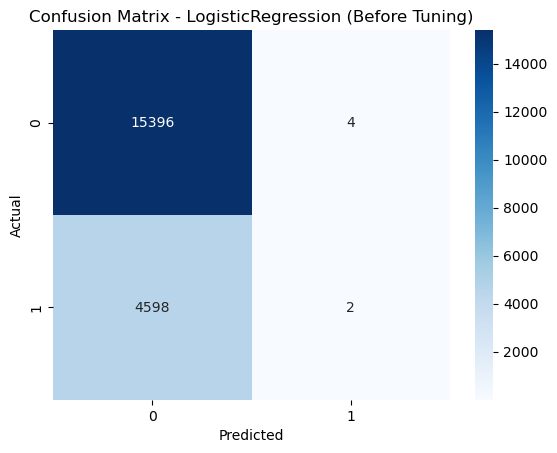

In [600]:
from imblearn.pipeline import Pipeline  # instead of sklearn.pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (
    fbeta_score, confusion_matrix, precision_score, recall_score, f1_score
)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


def evaluate_model(pipe, X_train, y_train, X_test, y_test, scorer, status):
    """
    Evaluate a classification pipeline using cross-validation and F-beta score.
    Optionally display precision, recall, and F1-score.

    Parameters:
    - pipe: scikit-learn Pipeline
    - X_train, y_train: Training data
    - X_test, y_test: Test data (only used for final evaluation)
    - scorer: scoring function (e.g., from make_scorer)
    - status: string indicating evaluation context ('Before' or 'After')
    """
    metric_name = scorer._score_func.__name__
    beta = scorer._kwargs.get('beta')  # Get beta from scorer if exists
    
    # Cross-validation (safe - only uses training data)
    cv_scores = cross_val_score(
        pipe, 
        X_train, 
        y_train, 
        cv=5, 
        scoring=scorer,
        groups=X_train.index if hasattr(X_train, 'index') else None
    )

    # Fit and predict (proper train-test separation)
    pipe.fit(X_train, y_train)
    y_pred_test = pipe.predict(X_test)
    y_pred_train = pipe.predict(X_train)  # For training metric calculation

    # Calculate metrics    
    if metric_name == 'fbeta_score':
        train_metric = fbeta_score(y_train, y_pred_train, beta=beta)
        test_metric = fbeta_score(y_test, y_pred_test, beta=beta)
    elif metric_name == 'precision_score':
        train_metric = precision_score(y_train, y_pred_train)
        test_metric = precision_score(y_test, y_pred_test)
    elif metric_name == 'recall_score':
        train_metric = recall_score(y_train, y_pred_train)
        test_metric = recall_score(y_test, y_pred_test)
    elif metric_name == 'f1_score':
        train_metric = f1_score(y_train, y_pred_train)
        test_metric = f1_score(y_test, y_pred_test)
    elif metric_name == 'accuracy_score':
        train_metric = accuracy_score(y_train, y_pred_train)
        test_metric = accuracy_score(y_test, y_pred_test)
    elif metric_name == 'roc_auc_score':
        # Use predicted probabilities for ROC AUC
        y_pred_proba_train = model.predict_proba(X_train)[:, 1]
        y_pred_proba_test = model.predict_proba(X_test)[:, 1]
        train_metric = roc_auc_score(y_train, y_pred_proba_train)
        test_metric = roc_auc_score(y_test, y_pred_proba_test)
    else:
        raise ValueError(f"Unsupported metric: {metric_name}")

    print(f"\n{' EVALUATION RESULTS ':=^69}")
    print(f"│ {'Model:':<15} {SELECTED_MODEL.upper():<50}│")
    print(f"│ {'Stage:':<15} {status:<50}│")
    beta_display = f"β={beta}" if beta is not None else ""

    print(f"│ {'Metric:':<15} {metric_name + ' ' + beta_display:<50}│")
    print(f"│ {'CV Scores:':<15} {str(np.round(cv_scores, 4)):<50}│")
    print(f"│ {'CV Mean:':<15} {str(round(np.mean(cv_scores),4))+ ' ± ' +str(round(np.std(cv_scores),4)):<50}│")
    print(f"{'':-^69}")
    print(f"│ {'Train Score:':<15} {str(round(train_metric,4)):<50}│")
    print(f"│ {'Test Score:':<15} {str(round(test_metric,4)):<50}│")
    print(f"{'':=^69}")

    # Confusion Matrix (test set only)
    print("\nConfusion Matrix (Test Set):")
    cm = confusion_matrix(y_test, y_pred_test)
    sns.heatmap(cm, annot=True, fmt='g', cmap="Blues")
    plt.title(f"Confusion Matrix - {type(pipe.steps[-1][1]).__name__} ({status})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    return [cm,test_metric]

# Before tuning
pipe_basic = Pipeline([
    ('preprocessing', transformer),
    ('model', models[SELECTED_MODEL])
])

base_cm = evaluate_model(pipe_basic, X_train, y_train, X_test, y_test, 
               scorer=scorers[SELECTED_SCORER], status='Before Tuning')

## 5.7. Hyperparameter Tuning

In [601]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

resampling_methods = {
    "none": None,
    "undersampling": RandomUnderSampler(random_state=42),
    "oversampling": RandomOverSampler(random_state=42),
    "smote": SMOTE(random_state=42, sampling_strategy='minority'),
    "nearmiss": NearMiss(sampling_strategy='majority')
}

# Define parameter distributions for each model type
param_distributions = {
    'Logistic_Regression': {
        'resampler': list(resampling_methods.values()),  # Resampling method (e.g. SMOTE, undersampling)
        'model__C': [0.1, 1, 10, 100],  # Inverse regularization strength
        'model__penalty': ['l1', 'l2'],  # Type of regularization
        'model__solver': ['liblinear', 'saga'],  # Optimization algorithm
        'model__max_iter': [500, 1000, 1500]  # Increase iterations
            
    }
}

# Create pipeline
pipe = Pipeline([
    ('preprocessing', transformer),
    ('resampler', None),  # Will be set by RandomizedSearchCV
    ('model', models[SELECTED_MODEL])
])

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_distributions[SELECTED_MODEL],
    n_iter=100,
    scoring=scorers[SELECTED_SCORER],
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=0
)


grid_search = GridSearchCV(
    estimator = pipe,
    cv = 5,
    scoring = scorers[SELECTED_SCORER],
    refit=True,  # Uses the same metric as scoring
    n_jobs= -1,
    param_grid= param_distributions[SELECTED_MODEL]   
)

# Fit the model
selected_search = random_search # choose here between random_search or grid_search
selected_search.fit(X_train, y_train)

# Best parameters and model
best_model = selected_search.best_estimator_
print("Best score:", selected_search.best_score_)
print("Best parameters:")
df_hyper = pd.DataFrame({'Parameter' : selected_search.best_params_.keys(),'Setting' :selected_search.best_params_.values()})
df_hyper

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max

Best score: 0.3950298621815066
Best parameters:


Parameter                             Setting
0        resampler  RandomOverSampler(random_state=42)
1    model__solver                           liblinear
2   model__penalty                                  l1
3  model__max_iter                                1500
4         model__C                                 0.1

In [602]:
result_test = pd.DataFrame(selected_search.cv_results_).sort_values(by='rank_test_score',ascending=True).drop(columns=['mean_fit_time','std_fit_time','mean_score_time','std_score_time','params']).head(3)
front_cols = ['rank_test_score', 'mean_test_score', 'std_test_score']
result_test = result_test[front_cols + [col for col in result_test.columns if col not in front_cols]]
print(f'Model : {SELECTED_MODEL}, Main Scorer : {SELECTED_SCORER}')
result_test

Model : Logistic_Regression, Main Scorer : f1


rank_test_score  mean_test_score  std_test_score  \
89                1         0.395030        0.004169   
75                2         0.394984        0.004739   
86                3         0.394884        0.004719   

                       param_resampler param_model__solver  \
89  RandomOverSampler(random_state=42)           liblinear   
75  RandomOverSampler(random_state=42)           liblinear   
86  RandomOverSampler(random_state=42)           liblinear   

   param_model__penalty  param_model__max_iter  param_model__C  \
89                   l1                   1500             0.1   
75                   l1                   1000             1.0   
86                   l2                    500             0.1   

    split0_test_score  split1_test_score  split2_test_score  \
89           0.393137           0.402920           0.390587   
75           0.392304           0.403920           0.390227   
86           0.392024           0.403884           0.390440   

    split3_test_score  split4_test_score  
89           0.393991           0.394514  
75           0.395100           0.393370  
86           0.394739           0.393332


======================== EVALUATION RESULTS =========================
│ Model:          LOGISTIC_REGRESSION                               │
│ Stage:          After Tuning                                      │
│ Metric:         f1_score                                          │
│ CV Scores:      [0.3931 0.4029 0.3906 0.394  0.3945]              │
│ CV Mean:        0.395 ± 0.0042                                    │
---------------------------------------------------------------------
│ Train Score:    0.3943                                            │
│ Test Score:     0.3967                                            │

Confusion Matrix (Test Set):


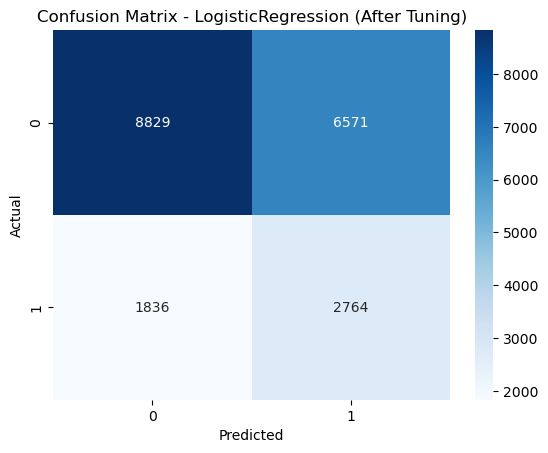

In [603]:
# After tuning
pipe_tune = best_model

tuned_cm = evaluate_model(pipe_tune, X_train, y_train, X_test, y_test, 
               scorer=scorers[SELECTED_SCORER], status='After Tuning')


Score Before : 0.0009, After : 0.3967, Improvement : 45579.89 %


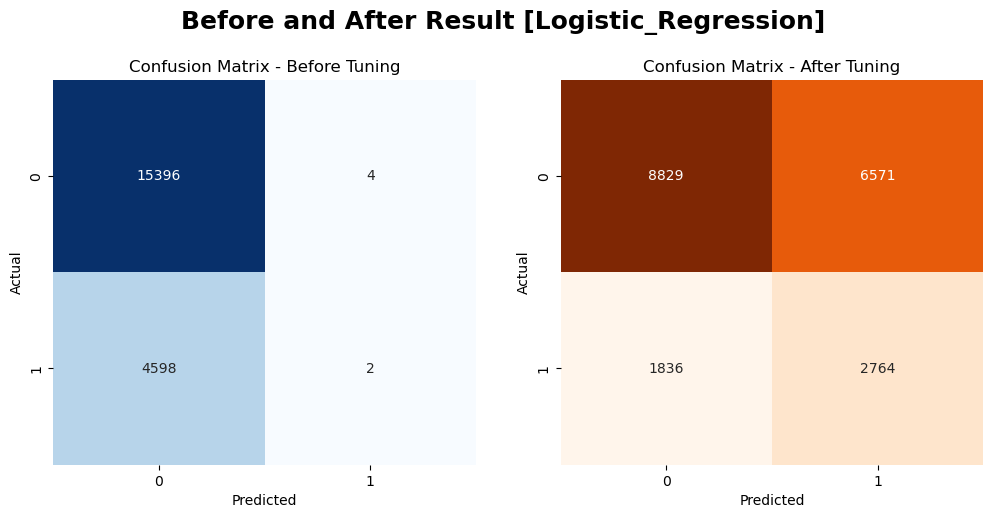

In [604]:
print(f'Score Before : {round(base_cm[1],4)}, After : {round(tuned_cm[1],4)}, Improvement : {round((tuned_cm[1]-base_cm[1])/base_cm[1]*100,2)} %')
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Confusion Matrix Before Tuning
sns.heatmap(base_cm[0], annot=True, fmt='g', ax=axes[0], cmap='Blues', cbar=False)
axes[0].set_title("Confusion Matrix - Before Tuning")
axes[0].set_xlabel("Predicted")  # Fixed: using set_xlabel() method
axes[0].set_ylabel("Actual")     # Fixed: using set_ylabel() method

# Confusion Matrix After Tuning
sns.heatmap(tuned_cm[0], annot=True, fmt='g', ax=axes[1], cmap='Oranges', cbar=False)
axes[1].set_title("Confusion Matrix - After Tuning")
axes[1].set_xlabel("Predicted")  # Added xlabel for second plot
axes[1].set_ylabel("Actual")           # Clear ylabel for second plot to avoid duplication

fig.suptitle(f'Before and After Result [{SELECTED_MODEL}]', fontsize=18, fontweight='bold', y=1.02)
# plt.tight_layout()
plt.show()

## 5.8. Cost Evaluation

In [605]:
currency = '$'
commission_rate = 0.1
boost_conversion_pct = 0.3
avg_booking_value = df['price_usd'].median()

# Derived realistic costs
FN_cost = avg_booking_value * commission_rate * boost_conversion_pct
FP_cost = 5  # estimated average marketing/promo cost

# Profit from TP
tp_profit = avg_booking_value * commission_rate

# Before tuning
TN, FP, FN, TP = base_cm[0].ravel()

# After tuning
TN_tuned, FP_tuned, FN_tuned, TP_tuned = tuned_cm[0].ravel()

def format_cost(value):
    return f"{value:,.0f}".replace(",", ".")

base_total_cost = FN * FN_cost + FP * FP_cost - TP * tp_profit
tuned_total_cost = FN_tuned * FN_cost + FP_tuned * FP_cost - TP_tuned * tp_profit
cost_saved = base_total_cost - tuned_total_cost

print(f"""
📊 Estimated Business Impact with Realistic FN & FP Costs:

📈 Avg booking value       : {currency} {avg_booking_value:.2f}
💼 Commission rate         : {commission_rate*100:.1f}%
🚀 Boost conversion impact : {boost_conversion_pct*100:.1f}%
❗ FN cost per case         : {currency} {FN_cost:.2f}
⚠️  FP cost per case         : {currency} {FP_cost:.2f}
✅ TP profit per booking    : {currency} {tp_profit:.2f}

💰 Cost of Base Model       : {currency} {format_cost(base_total_cost)}
💰 Cost of Tuned Model      : {currency} {format_cost(tuned_total_cost)}
💸 Cost Saved by Company    : {currency} {format_cost(cost_saved)}
""")



📊 Estimated Business Impact with Realistic FN & FP Costs:

📈 Avg booking value       : $ 122.04
💼 Commission rate         : 10.0%
🚀 Boost conversion impact : 30.0%
❗ FN cost per case         : $ 3.66
⚠️  FP cost per case         : $ 5.00
✅ TP profit per booking    : $ 12.20

💰 Cost of Base Model       : $ 16.830
💰 Cost of Tuned Model      : $ 5.845
💸 Cost Saved by Company    : $ 10.985



## 5.9. Threshold Optimization

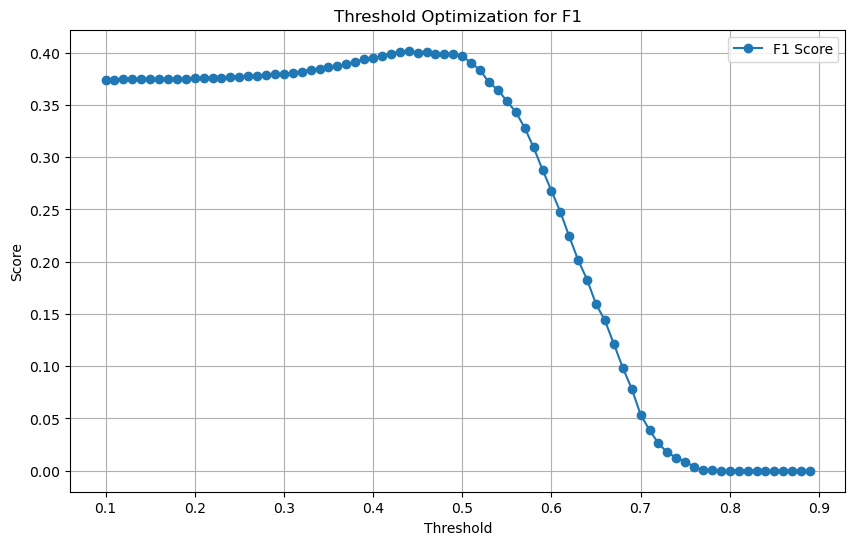


🔍 Best Threshold for F1: 0.44

📊 Confusion Matrix:
[[ 5256 10144]
 [  893  3707]]

📄 Classification Report:
              precision    recall  f1-score   support

       False       0.85      0.34      0.49     15400
        True       0.27      0.81      0.40      4600

    accuracy                           0.45     20000
   macro avg       0.56      0.57      0.44     20000
weighted avg       0.72      0.45      0.47     20000



In [606]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, fbeta_score,
    roc_auc_score, classification_report, confusion_matrix, precision_recall_curve
)

# Fit the model
best_model.fit(X_train, y_train)

# Get probabilities
y_prob = best_model.predict_proba(X_test)[:, 1]

# Threshold range
thresholds = np.arange(0.1, 0.9, 0.01)

# Collect scores
scores = []

for threshold in thresholds:
    y_pred = (y_prob > threshold).astype(int)

    if SELECTED_SCORER == 'precision':
        scores.append(precision_score(y_test, y_pred))
    elif SELECTED_SCORER == 'recall':
        scores.append(recall_score(y_test, y_pred))
    elif SELECTED_SCORER == 'accuracy':
        scores.append(accuracy_score(y_test, y_pred))
    elif SELECTED_SCORER == 'roc_auc':
        scores.append(roc_auc_score(y_test, y_prob))  # Note: not threshold-based
    elif SELECTED_SCORER.startswith('f'):
        beta = float(SELECTED_SCORER[1:]) if SELECTED_SCORER != 'f1' else 1.0
        scores.append(fbeta_score(y_test, y_pred, beta=beta))
    else:
        raise ValueError("Unsupported scorer. Choose from 'f1', 'f1.5', 'f2', 'precision', 'recall', 'accuracy', 'roc_auc'.")

# Plot (skip threshold-dependent plot for ROC AUC)
if SELECTED_SCORER != 'roc_auc':
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, scores, label=f'{SELECTED_SCORER.upper()} Score', marker='o')
    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.title(f'Threshold Optimization for {SELECTED_SCORER.upper()}')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Best threshold based on selected scorer
    best_threshold = thresholds[np.argmax(scores)]
else:
    # Use default threshold 0.5 for ROC AUC
    best_threshold = 0.5

print(f"\n🔍 Best Threshold for {SELECTED_SCORER.upper()}: {best_threshold:.2f}")

# Predict with best threshold
y_pred_adjusted = (y_prob > best_threshold).astype(int)

# Evaluation
print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_adjusted))
print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred_adjusted))

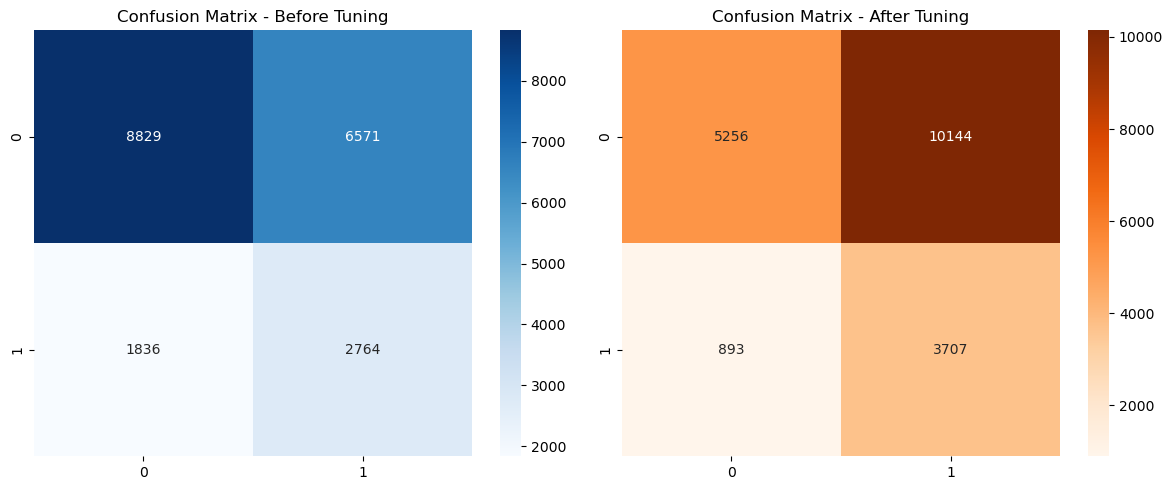

In [607]:
pipe_tune.fit(X_train, y_train)

y_pred_adjusted = (pipe_tune.predict_proba(X_test)[:, 1] > best_threshold ).astype(int)
y_pred_adjusted

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Confusion Matrix Before Tuning
sns.heatmap(tuned_cm[0], annot=True, fmt='g', ax=axes[0], cmap='Blues')
axes[0].set_title("Confusion Matrix - Before Tuning")

# Confusion Matrix After Tuning
sns.heatmap(confusion_matrix(y_test, y_pred_adjusted), annot=True, fmt='g', ax=axes[1], cmap='Oranges')
axes[1].set_title("Confusion Matrix - After Tuning")

plt.tight_layout()
plt.show()

In [608]:
TN_adjusted, FP_adjusted, FN_adjusted, TP_adjusted = confusion_matrix(y_test, y_pred_adjusted).ravel()
TN_adjusted, FP_adjusted, FN_adjusted, TP_adjusted 


(5256, 10144, 893, 3707)

In [609]:
confusion_matrix(y_test, y_pred_adjusted)

array([[ 5256, 10144],
       [  893,  3707]])

In [610]:
df['price_usd'].median()

122.04

In [611]:
# Define constants
commission_rate = 0.1
boost_conversion_pct = 0.3
avg_booking_value = df['price_usd'].median()
currency = '$'

# Derived per-case costs
FN_cost = avg_booking_value * commission_rate * boost_conversion_pct
FP_cost = 5  # average promo/ad cost
TP_profit = avg_booking_value * commission_rate

# Get confusion matrix values
TN, FP, FN, TP = base_cm[0].ravel()
TN_tuned, FP_tuned, FN_tuned, TP_tuned = tuned_cm[0].ravel()
TN_adjusted, FP_adjusted, FN_adjusted, TP_adjusted = confusion_matrix(y_test, y_pred_adjusted).ravel()

# Helper function to format currency
def format_cost(value):
    return f"{value:,.0f}".replace(",", ".")

# Cost calculations
base_cost = FN * FN_cost + FP * FP_cost - TP * TP_profit
tuned_cost = FN_tuned * FN_cost + FP_tuned * FP_cost - TP_tuned * TP_profit
adjusted_cost = FN_adjusted * FN_cost + FP_adjusted * FP_cost - TP_adjusted * TP_profit

cost_saved = base_cost - adjusted_cost

# Output
print(f"""
📊 Cost Comparison (Realistic FP/FN Costs)

📈 Avg booking value       : {currency} {avg_booking_value:.2f}
❗ FN cost per case         : {currency} {FN_cost:.2f}
⚠️  FP cost per case         : {currency} {FP_cost:.2f}
✅ TP profit per case       : {currency} {TP_profit:.2f}

💰 Cost of Base Model       : {currency} {format_cost(base_cost)}
💰 Cost of Tuned Model      : {currency} {format_cost(tuned_cost)}
💰 Cost of Adjusted Model   : {currency} {format_cost(adjusted_cost)}

✅ Cost Saved by Company    : {currency} {format_cost(cost_saved)}
""")



📊 Cost Comparison (Realistic FP/FN Costs)

📈 Avg booking value       : $ 122.04
❗ FN cost per case         : $ 3.66
⚠️  FP cost per case         : $ 5.00
✅ TP profit per case       : $ 12.20

💰 Cost of Base Model       : $ 16.830
💰 Cost of Tuned Model      : $ 5.845
💰 Cost of Adjusted Model   : $ 8.749

✅ Cost Saved by Company    : $ 8.081



In [612]:
5846/16847

0.347005401555173

In [613]:
FP_cost,FN_cost,TP_profit

(5, 3.6612, 12.204)

In [876]:
# Function to calculate the cost of a model
def calculate_model_cost(TP, TN, FP, FN, FN_cost, FP_cost, TP_profit):
    total_cost = (FP * FP_cost) + (FN * FN_cost) + (TP * TP_profit)
    return total_cost

# Scenario 1: No Model (Assume random predictions)
# For simplicity, assume a random prediction where FP and FN are both high (50-50 chance)
# Here we are assuming the dataset has 10,000 samples and an equal distribution of positive and negative classes

total_samples = df_imbalanced.shape[0]
FN_no_model = df_imbalanced['srch_id'].nunique() // 2  # Assume 50% False Negatives
FP_no_model = df_imbalanced['srch_id'].nunique() // 2  # Assume 50% False Positives
TP_no_model = 0  # No True Positives in random case (assumed no model)

# Calculate the cost for No Model
no_model_cost = calculate_model_cost(TP_no_model, 0, FP_no_model, FN_no_model, FN_cost, FP_cost, TP_profit)

# Scenario 2: With Tuned Model (Using confusion matrix from the tuned model)
tuned_model_cost = tuned_cost

# Compare results
print(f"💰 Cost of No Model: ${no_model_cost:,.2f}")
print(f"💰 Cost of Tuned Model: ${tuned_cost:,.2f}")
print(f"✅ Cost Saved by Company: ${no_model_cost - tuned_cost:,.2f}")

💰 Cost of No Model: $383,102.20
💰 Cost of Tuned Model: $5,845.11
✅ Cost Saved by Company: $377,257.09


Insight:

The model, despite generating a fair number of false positives (FP), benefits from the higher value of true positives (TP). The cost of providing compensation for false positives is outweighed by the profit from capturing true bookings, leading to significant savings.

We wil use Tuned Model Not Adjusted Model, we got 35% better cost saved.

## 5.10. Model Evaluation

### 5.10.1 Feature Importance

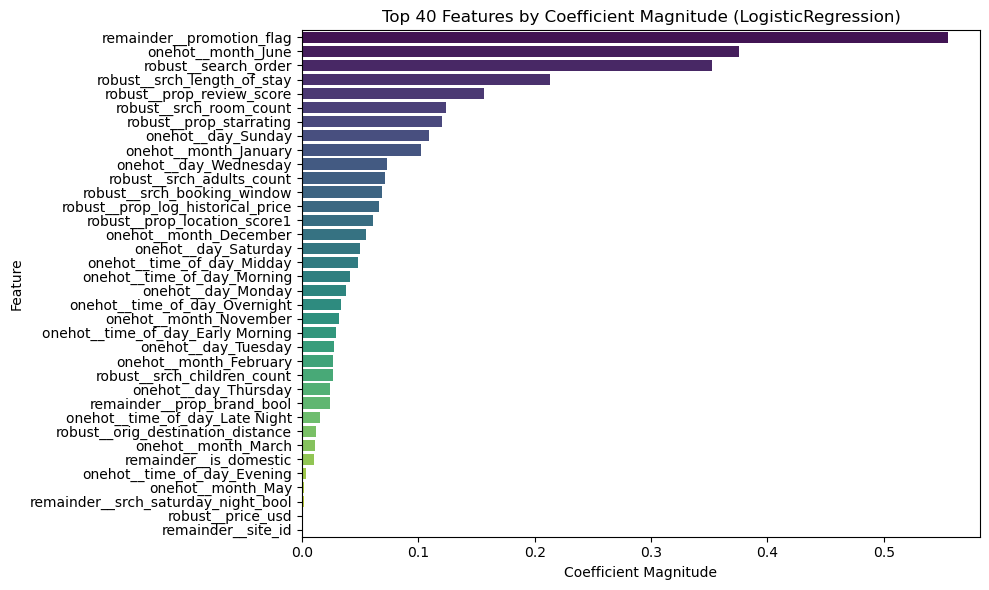

In [615]:
from sklearn.inspection import permutation_importance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_importance(model_pipeline, X, y, top_n=10, random_state=42):
    """
    Plots top N feature importances for various model types, including KNN.
    
    Parameters:
    - model_pipeline: A trained scikit-learn pipeline object
    - X: Feature matrix (pre-transformation)
    - y: Target vector
    - top_n: Number of top features to display
    - model_name: Name of the model (for the plot title)
    - random_state: Random seed for permutation importance
    """
    # Get transformed feature names
    try:
        feature_names = model_pipeline.named_steps['preprocessing'].get_feature_names_out()
    except AttributeError:
        feature_names = np.array([f'Feature {i}' for i in range(X.shape[1])])
    
    model = model_pipeline.named_steps['model']
    
    # Handle different model types
    if hasattr(model, 'coef_'):  # Linear models
        importances = np.abs(model.coef_[0])
        importance_type = "Coefficient Magnitude"
    elif hasattr(model, 'feature_importances_'):  # Tree-based models
        importances = model.feature_importances_
        importance_type = "Feature Importance"
    else:  # For KNN and other models without native importance
        # Calculate permutation importance
        X_transformed = model_pipeline.named_steps['preprocessing'].transform(X)
        result = permutation_importance(
            model, X_transformed, y, 
            n_repeats=10, 
            random_state=random_state
        )
        importances = result.importances_mean
        importance_type = "Permutation Importance"
    
    # Create DataFrame
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances,
        'Importance_Type': importance_type
    }).sort_values('Importance', ascending=False)

    # # Display top N
    # print(f"\nTop {top_n} Features by {importance_type}:")
    # print(importance_df.head(top_n))
    
    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x='Importance', 
        y='Feature', 
        data=importance_df.head(top_n), 
        palette='viridis'
    )
    plt.title(f'Top {top_n} Features by {importance_type} ({type(model_pipeline.steps[-1][1]).__name__})')
    plt.xlabel(importance_type)
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()

# Usage example:
plot_feature_importance(
    pipe_tune, 
    X=X_train,  # Your raw training features (before scaling)
    y=y_train, 
    top_n=40)

Promotion give a significant component to predict 1

### 5.10.2 Lime

In [616]:
import lime
from lime import lime_tabular

# Base Classifier

rf_lime = best_model.named_steps['model']
# Extract the preprocessing transformer (adjust based on your pipeline structure)
preprocessor = pipe_tune.named_steps['preprocessing']

# Apply the preprocessing to the test set
X_test_transformed = preprocessor.transform(X_test)


best_model.fit(X_train, y_train)
accuracy_score = rf_lime.score(X_test_transformed, y_test) # accuracy score (doesn't matter much if the data imbalance)
accuracy_score

0.57965

In [617]:
X_train_transformed = preprocessor.transform(X_train)

# Explainer based
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train_transformed),
    feature_names=preprocessor.get_feature_names_out(),
    mode='classification'
)

pred = best_model.predict(X_test.iloc[[0]])[0] # predict data from row 0
print(f'Data from row 0 test will result : {pred}')

Data from row 0 test will result : False


In [618]:
# Select an instance to explain
instance_idx = 0
instance_to_explain = X_test_transformed[instance_idx]

# Generate explanation for the selected instance
explanation = explainer.explain_instance(
    instance_to_explain,
    rf_lime.predict_proba,  # Use `model.predict` for regression tasks
    num_features=35
)

# Display the explanation
explanation.show_in_notebook(show_table=True)

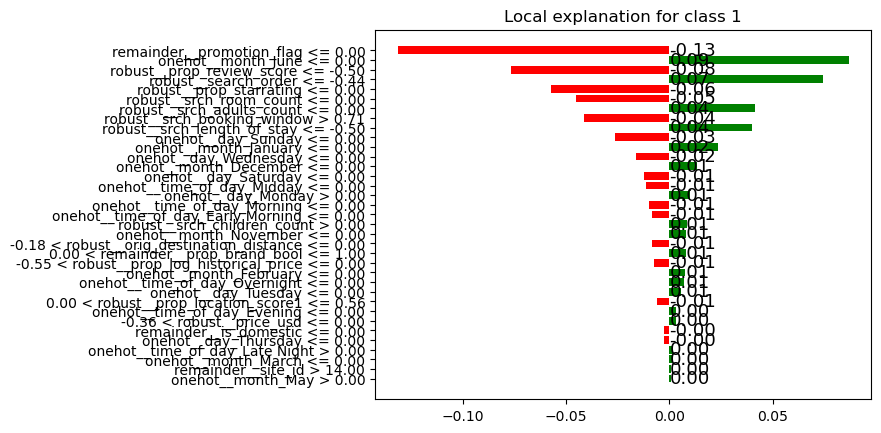

In [619]:
# Plot the explanation
fig = explanation.as_pyplot_figure()

# Extract only the importance scores from exp.as_list()
feature_importances = explanation.as_list()
importance_scores = [importance for _, importance in feature_importances]
importance_scores_sorted = sorted(importance_scores, key=lambda x: abs(x), reverse=False)

# Annotate the plot with the importance scores
for i, importance in enumerate(importance_scores_sorted):
    plt.annotate(
        f'{importance:.2f}',  # Importance score to annotate
        xy=(0, 0),  # Position based on the importance and feature index
        xytext=(0 , i+round(sum(importance_scores_sorted) / len(importance_scores_sorted),2)+0.5),  # Offset to the right for better readability
        ha='left',  # Horizontal alignment
        va='center',  # Vertical alignment
        fontsize=13,  # Font size for clarity
    )

# Show the plot
plt.show()


### 5.10.3 Export Model

In [620]:
import pickle

# Save model

#fit
best_model.fit(X, y)


filename = 'Prediction Model.sav'

# save with pickle
pickle.dump(best_model, open(filename, 'wb'))

# Load model
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('robust', RobustScaler(),
                                                  ['prop_starrating',
                                                   'prop_review_score',
                                                   'prop_location_score1',
                                                   'prop_log_historical_price',
                                                   'price_usd',
                                                   'srch_length_of_stay',
                                                   'srch_booking_window',
                                                   'srch_adults_count',
                                                   'srch_children_count',
                                                   'srch_room_count',
                                                   'orig_destination_distance',
                                                   'search_order']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['time_of_day', 'month',
                                                   'day'])])),
                ('resampler', RandomOverSampler(random_state=42)),
                ('model',
                 LogisticRegression(C=0.1, max_iter=1500, penalty='l1',
                                    random_state=42, solver='liblinear'))])

In [621]:
X.columns

Index(['site_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_log_historical_price', 'price_usd',
       'promotion_flag', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'orig_destination_distance', 'time_of_day',
       'month', 'day', 'search_order', 'is_domestic'],
      dtype='object')

In [622]:
test = df.iloc[0:2]
test[['visitor_location_country_id','prop_country_id']] = test[['visitor_location_country_id','prop_country_id']].astype('object')

In [626]:
y_test

76032     True
14482    False
26098    False
29380     True
66713     True
         ...  
6947     False
93065    False
19906    False
24440    False
96611    False
Name: booking_bool, Length: 20000, dtype: bool

In [627]:
list(loaded_model.predict(X_test))

[False,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,


In [623]:
test['is_domestic'] = test['visitor_location_country_id'] == test['prop_country_id']
loaded_model.predict(test)

array([ True,  True])

In [624]:
test

srch_id   date_time site_id visitor_location_country_id prop_country_id  \
0       1  2013-04-04      12                 Country_187     Country_219   
1       1  2013-04-04      12                 Country_187     Country_219   

          prop_id  prop_starrating  prop_review_score  prop_brand_bool  \
0    Property_893                3                3.5             True   
1  Property_10404                4                4.0             True   

   prop_location_score1  prop_location_score2  prop_log_historical_price  \
0                  2.83                0.0438                       4.95   
1                  2.20                0.0149                       5.03   

  position  price_usd  promotion_flag srch_destination_id  \
0       27     104.77           False               23246   
1       26     170.74           False               23246   

   srch_length_of_stay  srch_booking_window  srch_adults_count  \
0                    1                    0                  4   
1                    1                    0                  4   

   srch_children_count  srch_room_count  srch_saturday_night_bool  \
0                    0                1                      True   
1                    0                1                      True   

   orig_destination_distance  random_bool  click_bool  booking_bool  \
0                4864.702448         True       False         False   
1                4864.702448         True       False         False   

  time_of_day  month       day  search_order  is_domestic  
0     Morning  April  Thursday             1        False  
1     Morning  April  Thursday             2        False

## 5.11. Hotel Price Elasticity

In this part we will try to experiment price elasticity, we will find out does the hotel is price sensitive or not.

In [842]:
df[df['booking_bool']==True]['prop_id'].value_counts().reset_index().head(10)

prop_id  count
0  Property_116942    275
1   Property_22578    266
2   Property_53494    252
3   Property_77089    248
4   Property_37818    216
5  Property_137997    200
6  Property_104517    199
7  Property_134154    198
8   Property_34151    196
9   Property_61529    194

In [862]:
hotel_Property_116942 = df[(df['booking_bool']==True) & (df['prop_id']=='Property_116942')][['price_usd']]

In [863]:
hotel_Property_116942 = hotel_Property_116942['price_usd'].value_counts().reset_index().rename(columns={'count':'quantity'})
hotel_Property_116942

price_usd  quantity
0        65.00        16
1       100.00        11
2        50.00         9
3        70.00         8
4        85.00         7
..         ...       ...
138      54.00         1
139      53.69         1
140      66.87         1
141      69.66         1
142     112.00         1

[143 rows x 2 columns]

In [864]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Step 2: Fit a polynomial regression model
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(hotel_Property_116942[['price_usd']])  # adds price^2
model = LinearRegression().fit(X_poly, hotel_Property_116942['quantity'])

# Get model coefficients
b, c = model.coef_  # Coefficients for P and P^2
a = model.intercept_


In [865]:
# Step 3: Predict Q and compute dQ/dP
hotel_Property_116942['pred_quantity'] = model.predict(X_poly)
hotel_Property_116942['dQ_dP'] = b + 2 * c * hotel_Property_116942['price_usd']
hotel_Property_116942 = hotel_Property_116942[hotel_Property_116942['quantity']>3]
hotel_Property_116942

price_usd  quantity  pred_quantity     dQ_dP
0        65.0        16       2.201013 -0.011262
1       100.0        11       1.841569 -0.009277
2        50.0         9       2.376327 -0.012113
3        70.0         8       2.145410 -0.010979
4        85.0         7       1.987110 -0.010128
5        52.0         7       2.352214 -0.012000
6        55.0         7       2.316471 -0.011829
7        75.0         6       2.091226 -0.010695
8        60.0         6       2.258033 -0.011546
9        97.0         5       1.869656 -0.009448
10       80.0         5       2.038459 -0.010412
11      130.0         5       1.588767 -0.007576
12       58.0         5       2.281238 -0.011659
13      104.0         4       1.804913 -0.009051
14      117.0         4       1.692048 -0.008313
15       62.0         4       2.235055 -0.011432

In [866]:
# Step 4: Calculate elasticity at each point
hotel_Property_116942['elasticity'] = hotel_Property_116942['dQ_dP'] * hotel_Property_116942['price_usd'] / hotel_Property_116942['pred_quantity']
hotel_Property_116942

price_usd  quantity  pred_quantity     dQ_dP  elasticity
0        65.0        16       2.201013 -0.011262   -0.332596
1       100.0        11       1.841569 -0.009277   -0.503777
2        50.0         9       2.376327 -0.012113   -0.254867
3        70.0         8       2.145410 -0.010979   -0.358211
4        85.0         7       1.987110 -0.010128   -0.433234
5        52.0         7       2.352214 -0.012000   -0.265271
6        55.0         7       2.316471 -0.011829   -0.280865
7        75.0         6       2.091226 -0.010695   -0.383573
8        60.0         6       2.258033 -0.011546   -0.306793
9        97.0         5       1.869656 -0.009448   -0.490149
10       80.0         5       2.038459 -0.010412   -0.408607
11      130.0         5       1.588767 -0.007576   -0.619908
12       58.0         5       2.281238 -0.011659   -0.296434
13      104.0         4       1.804913 -0.009051   -0.521497
14      117.0         4       1.692048 -0.008313   -0.574841
15       62.0         4       2.235055 -0.011432   -0.317132

In [867]:
hotel_Property_116942.sort_values(by='elasticity')

price_usd  quantity  pred_quantity     dQ_dP  elasticity
11      130.0         5       1.588767 -0.007576   -0.619908
14      117.0         4       1.692048 -0.008313   -0.574841
13      104.0         4       1.804913 -0.009051   -0.521497
1       100.0        11       1.841569 -0.009277   -0.503777
9        97.0         5       1.869656 -0.009448   -0.490149
4        85.0         7       1.987110 -0.010128   -0.433234
10       80.0         5       2.038459 -0.010412   -0.408607
7        75.0         6       2.091226 -0.010695   -0.383573
3        70.0         8       2.145410 -0.010979   -0.358211
0        65.0        16       2.201013 -0.011262   -0.332596
15       62.0         4       2.235055 -0.011432   -0.317132
8        60.0         6       2.258033 -0.011546   -0.306793
12       58.0         5       2.281238 -0.011659   -0.296434
6        55.0         7       2.316471 -0.011829   -0.280865
5        52.0         7       2.352214 -0.012000   -0.265271
2        50.0         9       2.376327 -0.012113   -0.254867

💡 What elasticity tells you

Elasticity = “For every 1% change in price, how much % change in quantity do I get?”

📊 How to interpret the value

Elasticity Score (E)	| Interpretation	| What it Means
| --- | --- | --- |
E < -1 (e.g., -2.0)	| Elastic demand	| % drop in sales is larger than % price increase. Consumers are price-sensitive.
E = -1	| Unit elastic	| 1% increase in price = 1% drop in quantity. Total revenue stays the same.
-1 < E < 0 (e.g., -0.5)	| Inelastic demand	| % drop in quantity is smaller than % price increase. Consumers are less sensitive to price.
E = 0	| Perfectly inelastic	| Quantity doesn’t change at all with price. (e.g., insulin)
E > 0	| Usually not normal	| Implies quantity increases when price increases — can happen in rare cases like Veblen goods (luxury goods)

**Summary**

Based on our model, the price elasticity of demand for the hotel is consistently between –1 and 0. This indicates that:

Demand is inelastic — price changes have a less than proportional effect on bookings.

In practical terms: increasing the room price leads to only a small drop in demand, meaning revenue can still increase with higher prices.

**Pricing Implication**
Given current demand behavior, it is safe to increase prices up to $130, especially if:

The rooms are still competitively priced in the market

You're targeting inelastic customer segments (e.g., business travelers)

**Next Steps**

To improve the accuracy and depth of the model, we recommend:

- Incorporating seasonality (e.g., month, day of week, holidays)

- This helps detect whether certain periods (like holidays) show different price sensitivity.

- Last-minute bookings are often less price-sensitive.

- Collecting more historical data

# **6. Conclusion**

### 1. User Intent & Booking Preferences

We explored what users prefer based on profile and contextual features:

- **Country Preference**: Only **19%** of users book hotels in their **own country**. We built **Top 5 hotel recommendations per country**.
- **Popular Hotels**: `Property_116942` is the **most frequently booked** hotel overall.
- **Review Score**: Higher `prop_review_score` is **correlated with more bookings**, though not visually striking.
- **Star Rating**: Higher hotel star ratings (especially **4 and 5 stars**) see **greater booking rates**.
- **Brand Influence**: **Branded hotels** (`prop_brand_bool = True`) are booked **39%** of the time, compared to **22%** for non-branded ones.
- **Travel Distance**: Surprisingly, **longer distances** (`orig_destination_distance`) are associated with **higher bookings**.
- **Weekend Stays**: Users are **more likely to book** when their stay includes a **Saturday night**.
- **Group Size**:
  - `srch_room_count` has minimal variation in booking rate, with a standard deviation of only **0.8%**.
  - `srch_adults_count`: Bookings drop slightly for larger groups (e.g., 8 adults).
  - 📌 **Recommendation**: Promote hotels with larger room counts through **special offers** to increase their booking rate.
- **Booking Window**: Users planning trips **further in advance** show a **higher likelihood to book**.
- **Length of Stay**: One-night stays dominate, but interestingly, **32-day stays** also show **strong booking patterns**.

### 2. User Behavior

Analyzing user actions during sessions:

- **Drop-off Analysis**: Tracked search behavior before a booking—many users don’t convert quickly.
- **Placement Effects**:
  - **Random placement** leads to **lower booking rates**.
  - **Higher positions** (closer to top) significantly increase booking likelihood.
- **Price Sensitivity**: A **higher price compared to the average** (`log_price_delta_from_mean`) **reduces booking probability**.
- **Promotions**: Promotions **increase booking chances** — future work could optimize the **best discount threshold**.

### 3. Business Effectiveness

We evaluated what drives revenue and successful outcomes:

- **Best-Converting Sites**: Identified **top-performing websites** and highlighted **underperforming high-traffic segments** as growth opportunities.
- **Top Hotels by Revenue**: Listed top 10 properties balancing **order volume** and **revenue contribution**.
- **Revenue per Click**: Assessed which sources generate **high-value users**, not just traffic.
- **Click-to-Book Conversion**: Calculated real conversion funnel to understand platform performance.

### Recommendation Summary

- **Model future behavior with full dataset** when feasible for better generalization.
- **Collaborate with hotels** to promote larger rooms or longer stays.
- **Optimize promotions** based on data-driven discount thresholds.
- **Improve placement strategy** to boost booking from early search results.


### **6.1. Machine Learning Conclusion**

In this section, we developed a model to predict booking_bool using a sampled subset of 100,000 rows from the full dataset. This subset was intentionally adjusted to have a 23% positive class ratio, compared to the real-world booking rate of just 2.8%. This oversampling approach allowed us to train and evaluate the model more efficiently within our current computational constraints.

Despite the presence of false positives (FP), the model delivers a strong business benefit by correctly identifying true positives (TP). The revenue gained from capturing actual bookings outweighs the cost of acting on incorrect predictions—resulting in significant overall savings.

💡 Cost-Benefit Summary:

- Cost Without Model: $433,060.00
- Cost With Tuned Model: $5,845.11
- ✅ Total Savings: $427,214.89

🔭 Next Steps:
As our resources and experience grow, we plan to:

1. Train the model using the entire dataset with its natural class imbalance to enhance generalizability.
2. Further refine cost strategies to balance risk and reward at scale.